# 테이블별 1차 전처리

### 라이브러리 호출

In [ ]:
import pandas as pd
import numpy as np

# ▶ 한글 폰트 설정하기
import matplotlib.pyplot as plt
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] =False

# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')

### 레슨 시작(enter.lesson_page)

In [ ]:
# 레슨시작
enter_lesson_page_df = pd.read_csv('data/enter.lesson_page.csv')
enter_lesson_page_df

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content.id,is_trial,lesson.id,is_free_trial
0,Wonju,2023-04-05 21:46:04.333000,South Korea,NaN,Windows,Windows,enter.lesson_page,Korean,Chrome,111.0.0.0,Web,91053eda0bffb4db6c9317acf15bc44a,94bdcbd9f329aafa84ab464b6721187d,False,d360d68b65fd3e0eafb7982386d75fd9,NaN
1,Wonju,2023-04-05 21:55:50.787000,South Korea,NaN,Windows,Windows,enter.lesson_page,Korean,Chrome,111.0.0.0,Web,91053eda0bffb4db6c9317acf15bc44a,94bdcbd9f329aafa84ab464b6721187d,False,d360d68b65fd3e0eafb7982386d75fd9,NaN
2,Wonju,2023-04-05 21:55:55.684000,South Korea,NaN,Windows,Windows,enter.lesson_page,Korean,Chrome,111.0.0.0,Web,91053eda0bffb4db6c9317acf15bc44a,94bdcbd9f329aafa84ab464b6721187d,False,770740696ab1809d6b50d4013b64a75c,NaN
3,Dongdaemun-gu,2023-04-05 21:04:55.828000,South Korea,NaN,Mac,Mac,enter.lesson_page,Korean,Chrome,111.0.0.0,Web,b2b31f00b82edc6419b25324a7ae41a4,5fc64d786416b980cfda86afd69e4516,False,68cc362ca81b5899b3c9b4dea0aaddff,NaN
4,Dongdaemun-gu,2023-04-05 21:05:34.139000,South Korea,NaN,Mac,Mac,enter.lesson_page,Korean,Chrome,111.0.0.0,Web,b2b31f00b82edc6419b25324a7ae41a4,db43a841c994231e2795d4df8931af50,False,144682f4648f81de8e6aabd11b92105e,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21029702,Seoul,2023-10-10 05:18:14.053000,South Korea,NaN,Apple iPad,Apple iPad,enter.lesson_page,Korean,Mobile Safari,16.6,Web,NaN,c269eb6df3a374b464f7c18f12fa398f,False,582f0dd769db16a3d920fd7916090efb,NaN
21029703,Seoul,2023-10-10 05:18:58.648000,South Korea,NaN,Apple iPad,Apple iPad,enter.lesson_page,Korean,Mobile Safari,16.6,Web,NaN,c269eb6df3a374b464f7c18f12fa398f,False,83c74d5802b04a1a50aa28b7bf8a5354,NaN
21029704,Anyang-si,2023-10-10 05:17:45.578000,South Korea,NaN,Samsung Phone,Samsung Galaxy S23 Ultra,enter.lesson_page,Korean,Samsung Browser,22.0,Web,bc1a28ff902daba9399e7f602cc86285,f4be1a0fe0e301b03115591777fddf29,False,633d1b30ed699e261ea338ad28952338,NaN
21029705,Anyang-si,2023-10-10 05:18:05.629000,South Korea,NaN,Samsung Phone,Samsung Galaxy S23 Ultra,enter.lesson_page,Korean,Samsung Browser,22.0,Web,bc1a28ff902daba9399e7f602cc86285,f4be1a0fe0e301b03115591777fddf29,False,b05e0fb8ab15def4b33878b9a759b4f2,NaN


In [ ]:
# 데이터 크기 확인
enter_lesson_page_df.shape

(21029707, 16)

#### 컬럼 삭제

In [ ]:
# device_carrier 컬럼 전체 null인지 확인
enter_lesson_page_df['device_carrier'].isna().sum()

np.int64(21029707)

In [ ]:
# 활용하지 않는 컬럼 삭제
enter_lesson_page_df = enter_lesson_page_df.drop(columns=['device_carrier', 'device_type', 'os_version', 'city', 'platform'])
enter_lesson_page_df.head(3)

,client_event_time,country,device_family,event_type,language,os_name,user_id,content.id,is_trial,lesson.id,is_free_trial
0,2023-04-05 21:46:04.333000,South Korea,Windows,enter.lesson_page,Korean,Chrome,91053eda0bffb4db6c9317acf15bc44a,94bdcbd9f329aafa84ab464b6721187d,False,d360d68b65fd3e0eafb7982386d75fd9,NaN
1,2023-04-05 21:55:50.787000,South Korea,Windows,enter.lesson_page,Korean,Chrome,91053eda0bffb4db6c9317acf15bc44a,94bdcbd9f329aafa84ab464b6721187d,False,d360d68b65fd3e0eafb7982386d75fd9,NaN
2,2023-04-05 21:55:55.684000,South Korea,Windows,enter.lesson_page,Korean,Chrome,91053eda0bffb4db6c9317acf15bc44a,94bdcbd9f329aafa84ab464b6721187d,False,770740696ab1809d6b50d4013b64a75c,NaN


In [ ]:
# 컬럼 삭제 확인 (16개 > 11개)
enter_lesson_page_df.shape

(21029707, 11)

#### 결측치 처리

In [ ]:
# 결측치 확인
enter_lesson_page_df.isna().sum()

client_event_time           0
country                358428
device_family            6482
event_type                  0
language                    0
os_name                   417
user_id               1538529
content.id                352
is_trial              7374020
lesson.id                   0
is_free_trial        18805949
dtype: int64

- `is_free_trial`, `is_trial` 이 Null일 경우가 어떤 의미를 지니는지 파악이 어렵고, 결측치가 전체 데이터에서 차지하는 비율이 높기 때문에 해당 컬럼의 결측치는 제거하지 않는다.
- 레슨은 콘텐츠에 포함되기 때문에, `content_id` 결측치는 오류로 간주하고 제거한다.

In [ ]:
enter_lesson_page_df = enter_lesson_page_df.dropna(subset='content.id')
enter_lesson_page_df.shape

(21029355, 11)

- user_id 가 Null인 경우는 회원가입하지 않은 사이트 방문자로 간주하므로, null값을 'guest'로 대치한다.

In [ ]:
# 결측값 guest로 대치
enter_lesson_page_df['user_id'] = enter_lesson_page_df['user_id'].apply(lambda x : 'guest' if pd.isna(x) else x)

In [ ]:
# user_id 결측값 확인
enter_lesson_page_df['user_id'].isna().sum()

np.int64(0)

#### 이상치 제거
- 날짜 통일을 위해 '2022-01'~'2023-12' 기간에 해당하지 않는 데이터는 이상치로 간주하여 제거한다.

In [ ]:
# 이상치 제거
enter_lesson_page_df = enter_lesson_page_df[(pd.to_datetime(enter_lesson_page_df['client_event_time']) >= pd.to_datetime('2022-01-01'))&(pd.to_datetime(enter_lesson_page_df['client_event_time']) < pd.to_datetime('2024-01-01'))]

In [ ]:
enter_lesson_page_df['client_event_time'].sort_values(ascending=True)

13933894    2022-01-01 00:01:34.047000
13933979    2022-01-01 00:02:40.687000
13933895    2022-01-01 00:02:53.551000
13933945    2022-01-01 00:03:09.056000
13933883    2022-01-01 00:03:25.375000
                       ...            
16823863    2023-12-31 23:55:55.453000
16823895    2023-12-31 23:56:42.004000
16823904    2023-12-31 23:57:15.239000
16823878    2023-12-31 23:57:46.757000
16823871    2023-12-31 23:58:48.291000
Name: client_event_time, Length: 21028781, dtype: object

#### 날짜 형식 변경 및 새로운 컬럼('date') 생성

In [ ]:
# 날짜 형식 변경 후 새로운 컬럼에 저장
enter_lesson_page_df['date'] = pd.to_datetime(enter_lesson_page_df['client_event_time']).dt.strftime('%Y-%m-%d')
enter_lesson_page_df.head(3)

,client_event_time,country,device_family,event_type,language,os_name,user_id,content.id,is_trial,lesson.id,is_free_trial,date
0,2023-04-05 21:46:04.333000,South Korea,Windows,enter.lesson_page,Korean,Chrome,91053eda0bffb4db6c9317acf15bc44a,94bdcbd9f329aafa84ab464b6721187d,False,d360d68b65fd3e0eafb7982386d75fd9,NaN,2023-04-05
1,2023-04-05 21:55:50.787000,South Korea,Windows,enter.lesson_page,Korean,Chrome,91053eda0bffb4db6c9317acf15bc44a,94bdcbd9f329aafa84ab464b6721187d,False,d360d68b65fd3e0eafb7982386d75fd9,NaN,2023-04-05
2,2023-04-05 21:55:55.684000,South Korea,Windows,enter.lesson_page,Korean,Chrome,91053eda0bffb4db6c9317acf15bc44a,94bdcbd9f329aafa84ab464b6721187d,False,770740696ab1809d6b50d4013b64a75c,NaN,2023-04-05


#### 시간대 표기한 새로운 컬럼('time') 생성

In [ ]:
# 날짜 형식 변경 후 시간대 컬럼 생성 및 저장
enter_lesson_page_df['time'] = pd.to_datetime(enter_lesson_page_df['client_event_time']).dt.hour
enter_lesson_page_df.head(3)

,client_event_time,country,device_family,event_type,language,os_name,user_id,content.id,is_trial,lesson.id,is_free_trial,date,time
0,2023-04-05 21:46:04.333000,South Korea,Windows,enter.lesson_page,Korean,Chrome,91053eda0bffb4db6c9317acf15bc44a,94bdcbd9f329aafa84ab464b6721187d,False,d360d68b65fd3e0eafb7982386d75fd9,NaN,2023-04-05,21
1,2023-04-05 21:55:50.787000,South Korea,Windows,enter.lesson_page,Korean,Chrome,91053eda0bffb4db6c9317acf15bc44a,94bdcbd9f329aafa84ab464b6721187d,False,d360d68b65fd3e0eafb7982386d75fd9,NaN,2023-04-05,21
2,2023-04-05 21:55:55.684000,South Korea,Windows,enter.lesson_page,Korean,Chrome,91053eda0bffb4db6c9317acf15bc44a,94bdcbd9f329aafa84ab464b6721187d,False,770740696ab1809d6b50d4013b64a75c,NaN,2023-04-05,21


In [ ]:
# 원본 시간대 컬럼 삭제
enter_lesson_page_df = enter_lesson_page_df.drop(columns='client_event_time')
enter_lesson_page_df.head(3)

,country,device_family,event_type,language,os_name,user_id,content.id,is_trial,lesson.id,is_free_trial,date,time
0,South Korea,Windows,enter.lesson_page,Korean,Chrome,91053eda0bffb4db6c9317acf15bc44a,94bdcbd9f329aafa84ab464b6721187d,False,d360d68b65fd3e0eafb7982386d75fd9,NaN,2023-04-05,21
1,South Korea,Windows,enter.lesson_page,Korean,Chrome,91053eda0bffb4db6c9317acf15bc44a,94bdcbd9f329aafa84ab464b6721187d,False,d360d68b65fd3e0eafb7982386d75fd9,NaN,2023-04-05,21
2,South Korea,Windows,enter.lesson_page,Korean,Chrome,91053eda0bffb4db6c9317acf15bc44a,94bdcbd9f329aafa84ab464b6721187d,False,770740696ab1809d6b50d4013b64a75c,NaN,2023-04-05,21


In [ ]:
enter_lesson_page_df.shape

(21028781, 12)

#### PC/MO 나누는 새로운 컬럼('pc_mo') 생성

In [ ]:
# NaN 값을 'Unknown'으로 대체
enter_lesson_page_df['device_family'] = enter_lesson_page_df['device_family'].fillna('Unknown')

# PC와 MO를 구분하는 함수 정의
def categorize_device_family(device):
    if 'Mac' in device or 'Windows' in device:  # PC로 간주
        return 'PC'
    elif 'Phone' in device or 'Android' in device or 'iPhone' in device:  # Mobile로 간주
        return 'MO'
    else:
        return 'MO'  # 기타는 MO로 처리

# 새로운 컬럼 pc_mo 추가
enter_lesson_page_df['pc_mo'] = enter_lesson_page_df['device_family'].apply(categorize_device_family)

# 기존 device_family 컬럼 삭제
enter_lesson_page_df = enter_lesson_page_df.drop('device_family', axis=1)

In [ ]:
# 데이터 확인
enter_lesson_page_df.head(3)

,country,event_type,language,os_name,user_id,content.id,is_trial,lesson.id,is_free_trial,date,time,pc_mo
0,South Korea,enter.lesson_page,Korean,Chrome,91053eda0bffb4db6c9317acf15bc44a,94bdcbd9f329aafa84ab464b6721187d,False,d360d68b65fd3e0eafb7982386d75fd9,NaN,2023-04-05,21,PC
1,South Korea,enter.lesson_page,Korean,Chrome,91053eda0bffb4db6c9317acf15bc44a,94bdcbd9f329aafa84ab464b6721187d,False,d360d68b65fd3e0eafb7982386d75fd9,NaN,2023-04-05,21,PC
2,South Korea,enter.lesson_page,Korean,Chrome,91053eda0bffb4db6c9317acf15bc44a,94bdcbd9f329aafa84ab464b6721187d,False,770740696ab1809d6b50d4013b64a75c,NaN,2023-04-05,21,PC


In [ ]:
# 데이터 크기 확인
enter_lesson_page_df.shape

(21028781, 12)

In [ ]:
enter_lesson_page_df.isna().sum()

country            358428
event_type              0
language                0
os_name               417
user_id                 0
content.id              0
is_trial          7373441
lesson.id               0
is_free_trial    18805023
date                    0
time                    0
pc_mo                   0
dtype: int64

In [ ]:
# csv파일로 내보내기
enter_lesson_page_df.to_csv('enter_lesson_page.csv', encoding='utf-8-sig', index=False)

---

### 레슨 완료(complete.lesson)

In [ ]:
# 레슨 완료
complete_lesson_df = pd.read_csv('data/complete.lesson.csv')
complete_lesson_df

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content.id,lesson.id
0,Wonju,2023-04-05 21:55:51.836000,South Korea,NaN,Windows,Windows,complete.lesson,Korean,Chrome,111.0.0.0,Web,91053eda0bffb4db6c9317acf15bc44a,94bdcbd9f329aafa84ab464b6721187d,d360d68b65fd3e0eafb7982386d75fd9
1,Daejeon,2023-04-05 21:19:01.243000,South Korea,NaN,Windows,Windows,complete.lesson,Korean,Edge,111.0.1661.62,Web,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430,7e0f6aae886368ef9fa97007a8e9f7ac
2,Daejeon,2023-04-05 21:20:27.939000,South Korea,NaN,Windows,Windows,complete.lesson,Korean,Edge,111.0.1661.62,Web,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430,d1e93c9dc08267efab31849bc6083854
3,Daejeon,2023-04-05 21:23:01.534000,South Korea,NaN,Windows,Windows,complete.lesson,Korean,Edge,111.0.1661.62,Web,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430,f22ea5dc431035305e705552bbc4f45b
4,Daejeon,2023-04-05 21:28:34.965000,South Korea,NaN,Windows,Windows,complete.lesson,Korean,Edge,111.0.1661.62,Web,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430,ce0bfeb7fb1259c588f437d48ab2690c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5405064,Seo-gu,2023-10-10 05:22:54.887000,South Korea,NaN,Windows,Windows,complete.lesson,Korean,Chrome,117.0.0.0,Web,465eb0e5c339bcc42ec3f4f14c4d00b0,f4be1a0fe0e301b03115591777fddf29,4b6cc370e587d711780ed4591634d443
5405065,Incheon,2023-10-10 05:39:15.760000,South Korea,NaN,Windows,Windows,complete.lesson,Korean,Chrome,117.0.0.0,Web,9eec721a1a1406bcf623272b5f761ce6,61b6463287573f00de13a930805a52d6,2ed4b83e65edc2b1efb193aaa3c60cf9
5405066,Incheon,2023-10-10 05:46:18.129000,South Korea,NaN,Windows,Windows,complete.lesson,Korean,Chrome,117.0.0.0,Web,9eec721a1a1406bcf623272b5f761ce6,61b6463287573f00de13a930805a52d6,db421b66bfd27eccd0e862e30b4de1be
5405067,Incheon,2023-10-10 05:50:32.927000,South Korea,NaN,Windows,Windows,complete.lesson,Korean,Chrome,117.0.0.0,Web,9eec721a1a1406bcf623272b5f761ce6,61b6463287573f00de13a930805a52d6,09c8a2d29087cb3d47823acb5f2705e3


In [ ]:
# 데이터 크기 확인
complete_lesson_df.shape

(5405069, 14)

#### 컬럼 삭제

In [ ]:
# device_carrier 컬럼 전체 null인지 확인
complete_lesson_df['device_carrier'].isna().sum()

np.int64(5405069)

In [ ]:
# 활용하지 않는 컬럼 삭제
complete_lesson_df = complete_lesson_df.drop(columns=['device_carrier', 'device_type', 'os_version', 'city', 'platform'])
complete_lesson_df.head(3)

,client_event_time,country,device_family,event_type,language,os_name,user_id,content.id,lesson.id
0,2023-04-05 21:55:51.836000,South Korea,Windows,complete.lesson,Korean,Chrome,91053eda0bffb4db6c9317acf15bc44a,94bdcbd9f329aafa84ab464b6721187d,d360d68b65fd3e0eafb7982386d75fd9
1,2023-04-05 21:19:01.243000,South Korea,Windows,complete.lesson,Korean,Edge,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430,7e0f6aae886368ef9fa97007a8e9f7ac
2,2023-04-05 21:20:27.939000,South Korea,Windows,complete.lesson,Korean,Edge,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430,d1e93c9dc08267efab31849bc6083854


In [ ]:
# 컬럼 삭제 확인 (14개 > 9개)
complete_lesson_df.shape

(5405069, 9)

#### 결측치 처리

In [ ]:
# 결측치 확인
complete_lesson_df.isna().sum()

client_event_time         0
country              148360
device_family         53035
event_type                0
language              53014
os_name               53291
user_id                   0
content.id                0
lesson.id                 0
dtype: int64

- user_id, lesson.id, content.id에 결측치가 없으므로 처리 X

#### 이상치 제거
- 날짜 통일을 위해 '2022-01'~'2023-12' 기간에 해당하지 않는 데이터는 이상치로 간주하여 제거한다.

In [ ]:
# 이상치 제거
complete_lesson_df = complete_lesson_df[(pd.to_datetime(complete_lesson_df['client_event_time']) >= pd.to_datetime('2022-01-01'))&(pd.to_datetime(complete_lesson_df['client_event_time']) < pd.to_datetime('2024-01-01'))]

In [ ]:
complete_lesson_df['client_event_time'].sort_values(ascending=True)

3675035    2022-01-01 00:00:01.181000
3675036    2022-01-01 00:02:52.772000
3675037    2022-01-01 00:06:56.209000
3675054    2022-01-01 00:08:04.998000
3675038    2022-01-01 00:09:32.949000
                      ...            
4395806    2023-12-31 23:55:06.405000
4395762    2023-12-31 23:56:38.866000
4395763    2023-12-31 23:56:52.291000
4395795    2023-12-31 23:58:57.928000
4395807    2023-12-31 23:59:35.209000
Name: client_event_time, Length: 5405069, dtype: object

In [ ]:
complete_lesson_df.shape

(5405069, 9)

#### 날짜 형식 변경 및 새로운 컬럼('date') 생성

In [ ]:
# 날짜 형식 변경 후 새로운 컬럼에 저장
complete_lesson_df['date'] = pd.to_datetime(complete_lesson_df['client_event_time']).dt.strftime('%Y-%m-%d')
complete_lesson_df.head(3)

,client_event_time,country,device_family,event_type,language,os_name,user_id,content.id,lesson.id,date
0,2023-04-05 21:55:51.836000,South Korea,Windows,complete.lesson,Korean,Chrome,91053eda0bffb4db6c9317acf15bc44a,94bdcbd9f329aafa84ab464b6721187d,d360d68b65fd3e0eafb7982386d75fd9,2023-04-05
1,2023-04-05 21:19:01.243000,South Korea,Windows,complete.lesson,Korean,Edge,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430,7e0f6aae886368ef9fa97007a8e9f7ac,2023-04-05
2,2023-04-05 21:20:27.939000,South Korea,Windows,complete.lesson,Korean,Edge,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430,d1e93c9dc08267efab31849bc6083854,2023-04-05


#### 시간대 표기한 새로운 컬럼('time') 생성

In [ ]:
# 날짜 형식 변경 후 시간대 컬럼 생성 및 저장
complete_lesson_df['time'] = pd.to_datetime(complete_lesson_df['client_event_time']).dt.hour
complete_lesson_df.head(3)

,client_event_time,country,device_family,event_type,language,os_name,user_id,content.id,lesson.id,date,time
0,2023-04-05 21:55:51.836000,South Korea,Windows,complete.lesson,Korean,Chrome,91053eda0bffb4db6c9317acf15bc44a,94bdcbd9f329aafa84ab464b6721187d,d360d68b65fd3e0eafb7982386d75fd9,2023-04-05,21
1,2023-04-05 21:19:01.243000,South Korea,Windows,complete.lesson,Korean,Edge,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430,7e0f6aae886368ef9fa97007a8e9f7ac,2023-04-05,21
2,2023-04-05 21:20:27.939000,South Korea,Windows,complete.lesson,Korean,Edge,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430,d1e93c9dc08267efab31849bc6083854,2023-04-05,21


In [ ]:
# 원본 시간대 컬럼 삭제
complete_lesson_df = complete_lesson_df.drop(columns='client_event_time')
complete_lesson_df.head(3)

,country,device_family,event_type,language,os_name,user_id,content.id,lesson.id,date,time
0,South Korea,Windows,complete.lesson,Korean,Chrome,91053eda0bffb4db6c9317acf15bc44a,94bdcbd9f329aafa84ab464b6721187d,d360d68b65fd3e0eafb7982386d75fd9,2023-04-05,21
1,South Korea,Windows,complete.lesson,Korean,Edge,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430,7e0f6aae886368ef9fa97007a8e9f7ac,2023-04-05,21
2,South Korea,Windows,complete.lesson,Korean,Edge,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430,d1e93c9dc08267efab31849bc6083854,2023-04-05,21


In [ ]:
complete_lesson_df.shape

(5405069, 10)

#### PC/MO 나누는 새로운 컬럼('pc_mo') 생성

In [ ]:
# NaN 값을 'Unknown'으로 대체
complete_lesson_df['device_family'] = complete_lesson_df['device_family'].fillna('Unknown')

# PC와 MO를 구분하는 함수 정의
def categorize_device_family(device):
    if 'Mac' in device or 'Windows' in device:  # PC로 간주
        return 'PC'
    elif 'Phone' in device or 'Android' in device or 'iPhone' in device:  # Mobile로 간주
        return 'MO'
    else:
        return 'MO'  # 기타는 MO로 처리

# 새로운 컬럼 pc_mo 추가
complete_lesson_df['pc_mo'] = complete_lesson_df['device_family'].apply(categorize_device_family)

# 기존 device_family 컬럼 삭제
complete_lesson_df = complete_lesson_df.drop('device_family', axis=1)

In [ ]:
# 데이터 확인
complete_lesson_df.head(3)

,country,event_type,language,os_name,user_id,content.id,lesson.id,date,time,pc_mo
0,South Korea,complete.lesson,Korean,Chrome,91053eda0bffb4db6c9317acf15bc44a,94bdcbd9f329aafa84ab464b6721187d,d360d68b65fd3e0eafb7982386d75fd9,2023-04-05,21,PC
1,South Korea,complete.lesson,Korean,Edge,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430,7e0f6aae886368ef9fa97007a8e9f7ac,2023-04-05,21,PC
2,South Korea,complete.lesson,Korean,Edge,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430,d1e93c9dc08267efab31849bc6083854,2023-04-05,21,PC


In [ ]:
# 데이터 크기 확인
complete_lesson_df.shape

(5405069, 10)

In [ ]:
# csv파일로 내보내기
complete_lesson_df.to_csv('complete_lesson.csv', encoding='utf-8-sig', index=False)

---

### 레슨 페이지 내 질문 목록 클릭(click.lesson_page_related_question_box)

In [ ]:
# 레슨 페이지 내 질문 목록 클릭
click_lesson_page_related_question_box_df = pd.read_csv('data/click.lesson_page_related_question_box.csv')
click_lesson_page_related_question_box_df

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,question.id,content.id,lesson.id
0,Dong-gu,2023-04-05 21:51:48.377000,South Korea,NaN,Samsung Phone,Samsung Galaxy S21 5G,click.lesson_page_related_question_box,English,Chrome,111.0.0.0,Web,117f95e12266dcf8f911ae39ff55a800,c654f9825245640595af9b8aecb150aa,c269eb6df3a374b464f7c18f12fa398f,e7dbf75457e67ef644d4ae1981b9e01b
1,Dong-gu,2023-04-05 21:52:21.689000,South Korea,NaN,Samsung Phone,Samsung Galaxy S21 5G,click.lesson_page_related_question_box,English,Chrome,111.0.0.0,Web,117f95e12266dcf8f911ae39ff55a800,898fb79fc740dc8705b52fb32521d5d5,c269eb6df3a374b464f7c18f12fa398f,e7dbf75457e67ef644d4ae1981b9e01b
2,Dong-gu,2023-04-05 21:52:42.481000,South Korea,NaN,Samsung Phone,Samsung Galaxy S21 5G,click.lesson_page_related_question_box,English,Chrome,111.0.0.0,Web,117f95e12266dcf8f911ae39ff55a800,9fb80c124d57fd31494738e0af5437a3,c269eb6df3a374b464f7c18f12fa398f,e7dbf75457e67ef644d4ae1981b9e01b
3,Goyang-si,2023-04-05 21:20:15.032000,South Korea,NaN,Mac,Mac,click.lesson_page_related_question_box,Korean,Chrome,111.0.0.0,Web,e1f3ecae035a3c8ae8cf789fbde98995,9016e2246486e852992ccd9ae0eb27ca,c269eb6df3a374b464f7c18f12fa398f,395bdf0293b24ec47d5a9e960574f851
4,Goyang-si,2023-04-05 21:21:55.275000,South Korea,NaN,Mac,Mac,click.lesson_page_related_question_box,Korean,Chrome,111.0.0.0,Web,e1f3ecae035a3c8ae8cf789fbde98995,4ecd552eeded70b3274b8edf3ecacbd9,c269eb6df3a374b464f7c18f12fa398f,a738c7835388066e2618af1e5ebacb3c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1379131,Seodaemun-gu,2023-10-10 05:25:08.357000,South Korea,NaN,Windows,Windows,click.lesson_page_related_question_box,Korean,Chrome,117.0.0.0,Web,b27f37352be57de11cd62c262b2e1628,e848503eff144ef08f52630654e60cb3,d6227ba76134f6cf821bb98b5f235bd0,0f31f42569e2ee9efa1d4b86e5232327
1379132,Seodaemun-gu,2023-10-10 05:26:00.402000,South Korea,NaN,Windows,Windows,click.lesson_page_related_question_box,Korean,Chrome,117.0.0.0,Web,b27f37352be57de11cd62c262b2e1628,cc241a1e49538294af0f457d647b620e,d6227ba76134f6cf821bb98b5f235bd0,0f31f42569e2ee9efa1d4b86e5232327
1379133,Seongnam-si,2023-10-10 05:55:03.270000,South Korea,NaN,Windows,Windows,click.lesson_page_related_question_box,English,Chrome,117.0.0.0,Web,NaN,f5e256dd4c1b0ede53751feb17fb413a,61b6463287573f00de13a930805a52d6,4d65e0729706704bf34953f2613d6ecd
1379134,Seo-gu,2023-10-10 05:11:03.355000,South Korea,NaN,Windows,Windows,click.lesson_page_related_question_box,Korean,Chrome,117.0.0.0,Web,465eb0e5c339bcc42ec3f4f14c4d00b0,ef084966fcd796b202c7021457b47a94,f4be1a0fe0e301b03115591777fddf29,4b6cc370e587d711780ed4591634d443


In [ ]:
# 데이터 크기 확인
click_lesson_page_related_question_box_df.shape

(1379136, 15)

#### 컬럼 삭제

In [ ]:
# device_carrier 컬럼 전체 null인지 확인
click_lesson_page_related_question_box_df['device_carrier'].isna().sum()

np.int64(1379136)

In [ ]:
# 활용하지 않는 컬럼 삭제
click_lesson_page_related_question_box_df = click_lesson_page_related_question_box_df.drop(columns=['device_carrier', 'device_type', 'os_version', 'city', 'platform'])
click_lesson_page_related_question_box_df.head(3)

,client_event_time,country,device_family,event_type,language,os_name,user_id,question.id,content.id,lesson.id
0,2023-04-05 21:51:48.377000,South Korea,Samsung Phone,click.lesson_page_related_question_box,English,Chrome,117f95e12266dcf8f911ae39ff55a800,c654f9825245640595af9b8aecb150aa,c269eb6df3a374b464f7c18f12fa398f,e7dbf75457e67ef644d4ae1981b9e01b
1,2023-04-05 21:52:21.689000,South Korea,Samsung Phone,click.lesson_page_related_question_box,English,Chrome,117f95e12266dcf8f911ae39ff55a800,898fb79fc740dc8705b52fb32521d5d5,c269eb6df3a374b464f7c18f12fa398f,e7dbf75457e67ef644d4ae1981b9e01b
2,2023-04-05 21:52:42.481000,South Korea,Samsung Phone,click.lesson_page_related_question_box,English,Chrome,117f95e12266dcf8f911ae39ff55a800,9fb80c124d57fd31494738e0af5437a3,c269eb6df3a374b464f7c18f12fa398f,e7dbf75457e67ef644d4ae1981b9e01b


In [ ]:
# 컬럼 삭제 확인 (15개 > 10개)
click_lesson_page_related_question_box_df.shape

(1379136, 10)

#### 결측치 처리

In [ ]:
# 결측치 확인
click_lesson_page_related_question_box_df.isna().sum()

client_event_time         0
country               14891
device_family             1
event_type                0
language                  0
os_name                   1
user_id               52903
question.id          554347
content.id           554348
lesson.id            554347
dtype: int64

- question.id, lesson.id, content.id에 결측치가 많지만 유저ID별 이벤트 실행 횟수 집계에는 문제가 없으므로 따로 결측치를 처리하지 않는다.
- user_id 가 Null인 경우는 회원가입하지 않은 사이트 방문자로 간주하므로, null값을 'guest'로 대치한다.

In [ ]:
# 'device_family' / 'os_name' : 결측치 1개 삭제
click_lesson_page_related_question_box_df = click_lesson_page_related_question_box_df.dropna(subset=['device_family','os_name'])

In [ ]:
# 결측값 guest로 대치
click_lesson_page_related_question_box_df['user_id'] = click_lesson_page_related_question_box_df['user_id'].apply(lambda x : 'guest' if pd.isna(x) else x)

In [ ]:
# user_id 결측값 확인
click_lesson_page_related_question_box_df['user_id'].isna().sum()

np.int64(0)

#### 이상치 제거
- 날짜 통일을 위해 '2022-01'~'2023-12' 기간에 해당하지 않는 데이터는 이상치로 간주하여 제거한다.

In [ ]:
# 이상치 제거
click_lesson_page_related_question_box_df = click_lesson_page_related_question_box_df[(pd.to_datetime(click_lesson_page_related_question_box_df['client_event_time']) >= pd.to_datetime('2022-01-01'))&(pd.to_datetime(click_lesson_page_related_question_box_df['client_event_time']) < pd.to_datetime('2024-01-01'))]

In [ ]:
# 날짜 확인
click_lesson_page_related_question_box_df['client_event_time'].sort_values(ascending=True)

1127953    2022-01-01 00:08:23.144000
1127954    2022-01-01 00:08:24.306000
1127955    2022-01-01 00:08:26.411000
1127956    2022-01-01 00:08:37.110000
1127957    2022-01-01 00:08:57.158000
                      ...            
1244825    2023-12-31 23:38:54.687000
1244826    2023-12-31 23:41:19.051000
1244828    2023-12-31 23:43:18.715000
1244829    2023-12-31 23:50:15.455000
1244830    2023-12-31 23:51:45.529000
Name: client_event_time, Length: 1378987, dtype: object

In [ ]:
click_lesson_page_related_question_box_df.shape

(1378987, 10)

#### 날짜 형식 변경 및 새로운 컬럼('date') 생성

In [ ]:
# 날짜 형식 변경 후 새로운 컬럼에 저장
click_lesson_page_related_question_box_df['date'] = pd.to_datetime(click_lesson_page_related_question_box_df['client_event_time']).dt.strftime('%Y-%m-%d')
click_lesson_page_related_question_box_df.head(3)

,client_event_time,country,device_family,event_type,language,os_name,user_id,question.id,content.id,lesson.id,date
0,2023-04-05 21:51:48.377000,South Korea,Samsung Phone,click.lesson_page_related_question_box,English,Chrome,117f95e12266dcf8f911ae39ff55a800,c654f9825245640595af9b8aecb150aa,c269eb6df3a374b464f7c18f12fa398f,e7dbf75457e67ef644d4ae1981b9e01b,2023-04-05
1,2023-04-05 21:52:21.689000,South Korea,Samsung Phone,click.lesson_page_related_question_box,English,Chrome,117f95e12266dcf8f911ae39ff55a800,898fb79fc740dc8705b52fb32521d5d5,c269eb6df3a374b464f7c18f12fa398f,e7dbf75457e67ef644d4ae1981b9e01b,2023-04-05
2,2023-04-05 21:52:42.481000,South Korea,Samsung Phone,click.lesson_page_related_question_box,English,Chrome,117f95e12266dcf8f911ae39ff55a800,9fb80c124d57fd31494738e0af5437a3,c269eb6df3a374b464f7c18f12fa398f,e7dbf75457e67ef644d4ae1981b9e01b,2023-04-05


#### 시간대 표기한 새로운 컬럼('time') 생성

In [ ]:
# 날짜 형식 변경 후 시간대 컬럼 생성 및 저장
click_lesson_page_related_question_box_df['time'] = pd.to_datetime(click_lesson_page_related_question_box_df['client_event_time']).dt.hour
click_lesson_page_related_question_box_df.head(3)

,client_event_time,country,device_family,event_type,language,os_name,user_id,question.id,content.id,lesson.id,date,time
0,2023-04-05 21:51:48.377000,South Korea,Samsung Phone,click.lesson_page_related_question_box,English,Chrome,117f95e12266dcf8f911ae39ff55a800,c654f9825245640595af9b8aecb150aa,c269eb6df3a374b464f7c18f12fa398f,e7dbf75457e67ef644d4ae1981b9e01b,2023-04-05,21
1,2023-04-05 21:52:21.689000,South Korea,Samsung Phone,click.lesson_page_related_question_box,English,Chrome,117f95e12266dcf8f911ae39ff55a800,898fb79fc740dc8705b52fb32521d5d5,c269eb6df3a374b464f7c18f12fa398f,e7dbf75457e67ef644d4ae1981b9e01b,2023-04-05,21
2,2023-04-05 21:52:42.481000,South Korea,Samsung Phone,click.lesson_page_related_question_box,English,Chrome,117f95e12266dcf8f911ae39ff55a800,9fb80c124d57fd31494738e0af5437a3,c269eb6df3a374b464f7c18f12fa398f,e7dbf75457e67ef644d4ae1981b9e01b,2023-04-05,21


In [ ]:
# 원본 시간대 컬럼 삭제
click_lesson_page_related_question_box_df = click_lesson_page_related_question_box_df.drop(columns='client_event_time')
click_lesson_page_related_question_box_df.head(3)

,country,device_family,event_type,language,os_name,user_id,question.id,content.id,lesson.id,date,time
0,South Korea,Samsung Phone,click.lesson_page_related_question_box,English,Chrome,117f95e12266dcf8f911ae39ff55a800,c654f9825245640595af9b8aecb150aa,c269eb6df3a374b464f7c18f12fa398f,e7dbf75457e67ef644d4ae1981b9e01b,2023-04-05,21
1,South Korea,Samsung Phone,click.lesson_page_related_question_box,English,Chrome,117f95e12266dcf8f911ae39ff55a800,898fb79fc740dc8705b52fb32521d5d5,c269eb6df3a374b464f7c18f12fa398f,e7dbf75457e67ef644d4ae1981b9e01b,2023-04-05,21
2,South Korea,Samsung Phone,click.lesson_page_related_question_box,English,Chrome,117f95e12266dcf8f911ae39ff55a800,9fb80c124d57fd31494738e0af5437a3,c269eb6df3a374b464f7c18f12fa398f,e7dbf75457e67ef644d4ae1981b9e01b,2023-04-05,21


In [ ]:
click_lesson_page_related_question_box_df.shape

(1378987, 11)

#### PC/MO 나누는 새로운 컬럼('pc_mo') 생성

In [ ]:
# NaN 값을 'Unknown'으로 대체
click_lesson_page_related_question_box_df['device_family'] = click_lesson_page_related_question_box_df['device_family'].fillna('Unknown')

# PC와 MO를 구분하는 함수 정의
def categorize_device_family(device):
    if 'Mac' in device or 'Windows' in device:  # PC로 간주
        return 'PC'
    elif 'Phone' in device or 'Android' in device or 'iPhone' in device:  # Mobile로 간주
        return 'MO'
    else:
        return 'MO'  # 기타는 MO로 처리

# 새로운 컬럼 pc_mo 추가
click_lesson_page_related_question_box_df['pc_mo'] = click_lesson_page_related_question_box_df['device_family'].apply(categorize_device_family)

# 기존 device_family 컬럼 삭제
click_lesson_page_related_question_box_df = click_lesson_page_related_question_box_df.drop('device_family', axis=1)

In [ ]:
# 데이터 확인
click_lesson_page_related_question_box_df.head(3)

,country,event_type,language,os_name,user_id,question.id,content.id,lesson.id,date,time,pc_mo
0,South Korea,click.lesson_page_related_question_box,English,Chrome,117f95e12266dcf8f911ae39ff55a800,c654f9825245640595af9b8aecb150aa,c269eb6df3a374b464f7c18f12fa398f,e7dbf75457e67ef644d4ae1981b9e01b,2023-04-05,21,MO
1,South Korea,click.lesson_page_related_question_box,English,Chrome,117f95e12266dcf8f911ae39ff55a800,898fb79fc740dc8705b52fb32521d5d5,c269eb6df3a374b464f7c18f12fa398f,e7dbf75457e67ef644d4ae1981b9e01b,2023-04-05,21,MO
2,South Korea,click.lesson_page_related_question_box,English,Chrome,117f95e12266dcf8f911ae39ff55a800,9fb80c124d57fd31494738e0af5437a3,c269eb6df3a374b464f7c18f12fa398f,e7dbf75457e67ef644d4ae1981b9e01b,2023-04-05,21,MO


In [ ]:
# 데이터 크기 확인
click_lesson_page_related_question_box_df.shape

(1378987, 11)

In [ ]:
# csv파일로 내보내기
click_lesson_page_related_question_box_df.to_csv('click_lesson_page_related_question_box.csv', encoding='utf-8-sig', index=False)

In [ ]:
click_lesson_page_related_question_box_df.groupby('user_id').count()[['date']]

,date
user_id,
0000572f2ba8079bcefd2760b632e820,3
0001f15911b404f3bf5b8571afafa4e4,10
0003c0ede663b9e3b55d9dc3f7e8690f,19
00046309229135e7aac86ec4c0d35009,1
000722d5152d121ef57d8246dff4ac91,16
...,...
fffba676b17f9f0f228360930f238f07,4
fffcae39952c396123f9a3c0808a2183,157
fffcbf8ded60b689e9867bff455f4ab7,34


---

## 병합용 파일 내보내기

#### enter_lesson_page

In [ ]:
enter_lesson_page_merge_df = enter_lesson_page_df.groupby('user_id').count()[['date']].reset_index().rename(columns={'date':'enter_lesson_page'})

In [ ]:
enter_lesson_page_merge_df.to_csv('merge_user_id_enter_lesson_page.csv', encoding='utf-8-sig',index=False)

In [ ]:
merge_date_enter_lesson_page_df = enter_lesson_page_df.groupby('date').count()[['event_type']].reset_index().rename(columns={'event_type':'enter_lesson_page'})

In [ ]:
merge_date_enter_lesson_page_df.to_csv('merge_date_enter_lesson_page.csv', encoding='utf-8-sig',index=False)

In [ ]:
concat_enter_lesson_page_df = enter_lesson_page_df[['date', 'user_id', 'event_type']]

In [ ]:
concat_enter_lesson_page_df.to_csv('concat_enter_lesson_page.csv', encoding='utf-8-sig',index=False)

#### complete_lesson

In [ ]:
merge_user_id_complete_lesson_df = complete_lesson_df.groupby('user_id').count()[['date']].reset_index().rename(columns={'date':'complete_lesson'})

In [ ]:
merge_user_id_complete_lesson_df

,user_id,complete_lesson
0,0000572f2ba8079bcefd2760b632e820,43
1,000087537cbfd934375364218ff10f91,10
2,0001f15911b404f3bf5b8571afafa4e4,56
3,0003b028a745bdfda9e88539424248af,1
4,0003c0ede663b9e3b55d9dc3f7e8690f,362
...,...,...
49678,fffadab35ddc8234e1c5139815bfc017,124
49679,fffba676b17f9f0f228360930f238f07,16
49680,fffcae39952c396123f9a3c0808a2183,183
49681,fffcbf8ded60b689e9867bff455f4ab7,116


In [ ]:
merge_user_id_complete_lesson_df.to_csv('merge_user_id_complete_lesson.csv', encoding='utf-8-sig',index=False)

In [ ]:
merge_date_complete_lesson_df = complete_lesson_df.groupby('date').count()[['event_type']].reset_index().rename(columns={'event_type':'complete_lesson'})

In [ ]:
merge_date_complete_lesson_df.to_csv('merge_date_complete_lesson.csv', encoding='utf-8-sig',index=False)

In [ ]:
concat_complete_lesson_df = complete_lesson_df[['date', 'user_id', 'event_type']]

In [ ]:
concat_complete_lesson_df

,date,user_id,event_type
0,2023-04-05,91053eda0bffb4db6c9317acf15bc44a,complete.lesson
1,2023-04-05,41362ad5ebcade2bb1b78344a53e7ccf,complete.lesson
2,2023-04-05,41362ad5ebcade2bb1b78344a53e7ccf,complete.lesson
3,2023-04-05,41362ad5ebcade2bb1b78344a53e7ccf,complete.lesson
4,2023-04-05,41362ad5ebcade2bb1b78344a53e7ccf,complete.lesson
...,...,...,...
5405064,2023-10-10,465eb0e5c339bcc42ec3f4f14c4d00b0,complete.lesson
5405065,2023-10-10,9eec721a1a1406bcf623272b5f761ce6,complete.lesson
5405066,2023-10-10,9eec721a1a1406bcf623272b5f761ce6,complete.lesson
5405067,2023-10-10,9eec721a1a1406bcf623272b5f761ce6,complete.lesson


In [ ]:
concat_complete_lesson_df.to_csv('concat_date_complete_lesson.csv', encoding='utf-8-sig',index=False)

#### click_lesson_page_related_question_box

In [ ]:
merge_user_id_click_lesson_page_related_question_box_df = click_lesson_page_related_question_box_df.groupby('user_id').count()[['date']].reset_index().rename(columns={'date':'click_lesson_page_related_question_box'})

In [ ]:
merge_user_id_click_lesson_page_related_question_box_df

,user_id,click_lesson_page_related_question_box
0,0000572f2ba8079bcefd2760b632e820,3
1,0001f15911b404f3bf5b8571afafa4e4,10
2,0003c0ede663b9e3b55d9dc3f7e8690f,19
3,00046309229135e7aac86ec4c0d35009,1
4,000722d5152d121ef57d8246dff4ac91,16
...,...,...
40401,fffba676b17f9f0f228360930f238f07,4
40402,fffcae39952c396123f9a3c0808a2183,157
40403,fffcbf8ded60b689e9867bff455f4ab7,34
40404,fffe529de03d6187ef7ed765650c8d2b,109


In [ ]:
merge_user_id_click_lesson_page_related_question_box_df.to_csv('merge_user_id_click_lesson_page_related_question_box.csv', encoding='utf-8-sig',index=False)

In [ ]:
merge_date_click_lesson_page_related_question_box_df = click_lesson_page_related_question_box_df.groupby('date').count()[['event_type']].reset_index().rename(columns={'event_type':'click_lesson_page_related_question_box'})

In [ ]:
merge_date_click_lesson_page_related_question_box_df.to_csv('merge_date_click_lesson_page_related_question_box.csv', encoding='utf-8-sig',index=False)

In [ ]:
concat_click_lesson_page_related_question_box_df = click_lesson_page_related_question_box_df[['date', 'user_id', 'event_type']]

In [ ]:
concat_click_lesson_page_related_question_box_df

,date,user_id,event_type
0,2023-04-05,117f95e12266dcf8f911ae39ff55a800,click.lesson_page_related_question_box
1,2023-04-05,117f95e12266dcf8f911ae39ff55a800,click.lesson_page_related_question_box
2,2023-04-05,117f95e12266dcf8f911ae39ff55a800,click.lesson_page_related_question_box
3,2023-04-05,e1f3ecae035a3c8ae8cf789fbde98995,click.lesson_page_related_question_box
4,2023-04-05,e1f3ecae035a3c8ae8cf789fbde98995,click.lesson_page_related_question_box
...,...,...,...
1379131,2023-10-10,b27f37352be57de11cd62c262b2e1628,click.lesson_page_related_question_box
1379132,2023-10-10,b27f37352be57de11cd62c262b2e1628,click.lesson_page_related_question_box
1379133,2023-10-10,guest,click.lesson_page_related_question_box
1379134,2023-10-10,465eb0e5c339bcc42ec3f4f14c4d00b0,click.lesson_page_related_question_box


In [ ]:
concat_click_lesson_page_related_question_box_df.to_csv('concat_date_click_lesson_page_related_question_box.csv', encoding='utf-8-sig',index=False)

---
---

---
---

# 재구독/정기결제 & 기타 시계열 데이터 분석

### 재구독/정기결제
- 재구독 수 : resubscribe.subscription
- 정기 결제 전환율 : 첫구독 완료한 사람 중 정기결제 한 사람

### 기타
- 무료체험 시작 비율 : 무료체험 시작 / 메인페이지 진입 - lead
- 구독 취소 수 : click.cancel_plan_button

---

## 기본 환경 세팅

### 라이브러리 호출

In [ ]:
# 라이브러리 호출
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

# 한글 폰트 설정하기
import matplotlib.pyplot as plt
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] =False

# Warnings 제거
import warnings
warnings.filterwarnings('ignore')

### 데이터 프레임 생성
- 이전 1차 전처리 과정을 거친 데이터 프레임 호출하여 본 분석에서는 별도의 전처리 과정없이 바로 분석을 진행한다.

In [ ]:
# 일별 이벤트 수 데이터 프레임 생성
date_df = pd.read_csv('preprocessed_data_1/merge_date_total_event.csv')

In [ ]:
# 데이터 확인
date_df.head(3)

,date,enter_main_page,enter_signup_page,complete_signup,enter_content_page,click_content_page_start_content_button,click_content_page_more_review_button,enter_payment_page,complete_subscription,renew_subscription,resubscribe_subscription,start_free_trial,start_content,enter_lesson_page,complete_lesson,click_lesson_page_related_question_box,end_content,click_cancel_plan_button
0,2022-01-01,2328,1665,422,2130,183,84,0,1,0,0,131,0,11404,5462,4933,116,25
1,2022-01-02,2995,1521,401,2880,233,125,0,2,0,0,148,0,15491,7642,6561,164,43
2,2022-01-03,3544,1278,361,3725,319,106,0,1,0,0,231,0,21609,10355,7667,212,51


In [ ]:
date_df.shape

(730, 18)

In [ ]:
date_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   date                                     730 non-null    object
 1   enter_main_page                          730 non-null    int64 
 2   enter_signup_page                        730 non-null    int64 
 3   complete_signup                          730 non-null    int64 
 4   enter_content_page                       730 non-null    int64 
 5   click_content_page_start_content_button  730 non-null    int64 
 6   click_content_page_more_review_button    730 non-null    int64 
 7   enter_payment_page                       730 non-null    int64 
 8   complete_subscription                    730 non-null    int64 
 9   renew_subscription                       730 non-null    int64 
 10  resubscribe_subscription                 730 non-null    int64

In [ ]:
# 년-월(date_month) 데이터 컬럼추가
date_df['date_month'] = pd.to_datetime(date_df['date']).dt.strftime('%Y-%m')

In [ ]:
# '년-월'로 데이터 그룹핑
month_date_df = date_df.iloc[:,1:].groupby('date_month').sum()
month_date_df

,enter_main_page,enter_signup_page,complete_signup,enter_content_page,click_content_page_start_content_button,click_content_page_more_review_button,enter_payment_page,complete_subscription,renew_subscription,resubscribe_subscription,start_free_trial,start_content,enter_lesson_page,complete_lesson,click_lesson_page_related_question_box,end_content,click_cancel_plan_button
date_month,,,,,,,,,,,,,,,,,
2022-01,78320,27503,7319,90821,6965,81180,0,58,0,0,4697,0,546891,256977,230481,5576,879
2022-02,111979,15613,4693,72106,5198,1486,0,533,0,0,3019,0,451687,202761,175454,4269,492
2022-03,111278,21081,5616,81314,6206,2067,0,657,0,0,4187,0,862084,205430,156727,4183,553
2022-04,85995,18844,4723,71856,5737,1477,0,562,0,0,4116,0,391550,175809,53412,3487,577
2022-05,86673,20798,5012,72446,6174,1555,0,632,0,0,4763,0,479892,174862,52479,3554,537
2022-06,94146,18462,5545,70819,6528,1691,0,602,0,0,4751,0,423720,175888,49665,3676,550
2022-07,82109,15094,4403,80317,2884,532,0,716,0,0,1469,0,432965,190660,48264,4156,618
2022-08,59473,10233,3377,80487,8120,303,0,397,0,0,304,2127,657732,226322,46784,4890,725
2022-09,46633,9548,2942,60144,6693,185,0,260,879,43,372,3981,470636,188183,34491,4110,689


---

## 시계열 분석

### 재구독/정기결제

#### 1-1) 월별 재구독 이벤트 수
- 집계 기준 이벤트 : `resubscribe.subscription`

In [ ]:
# 월별 재구독 테이블 생성
resubscribe_df = month_date_df.reset_index()[['date_month', 'resubscribe_subscription']]
resubscribe_df

,date_month,resubscribe_subscription
0,2022-01,0
1,2022-02,0
2,2022-03,0
3,2022-04,0
4,2022-05,0
5,2022-06,0
6,2022-07,0
7,2022-08,0
8,2022-09,43
9,2022-10,64


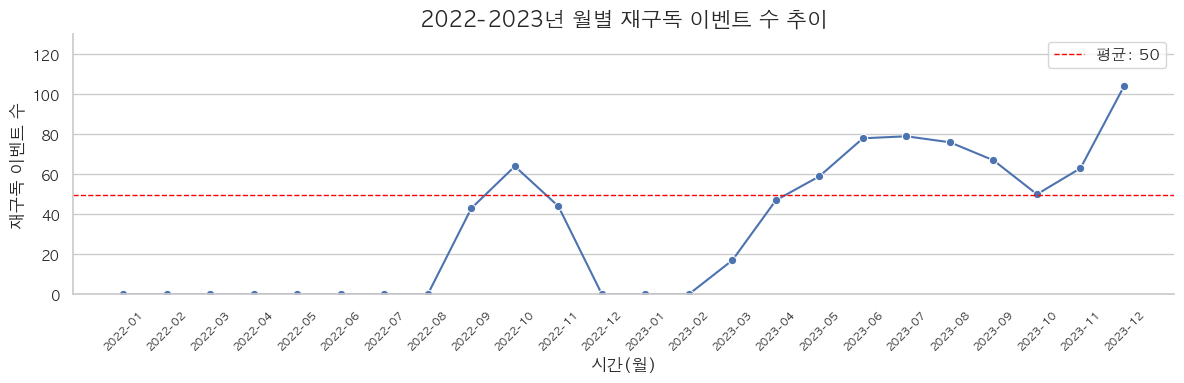

In [ ]:
# 그래프 스타일 설정
sns.set_theme(style='whitegrid', rc={'figure.figsize':(12,4)},font='AppleGothic')
plt.rcParams.update({
    "font.size": 12,         # 기본 폰트 크기
    "axes.titlesize": 15,    # 제목 폰트 크기
    "axes.labelsize": 12,    # 축 라벨 폰트 크기
    "xtick.labelsize": 8,   # x축 눈금 폰트 크기
    "ytick.labelsize": 10    # y축 눈금 폰트 크기
})

# 그래프 그리기
sns.lineplot(data= resubscribe_df, x='date_month', y='resubscribe_subscription', marker='o')

# 평균선 그리기
mean_value = resubscribe_df[resubscribe_df['date_month'] > '2022-09']['resubscribe_subscription'].mean() # 이벤트가 집계되지 않았던 2022년 7월까지의 데이터 미포함한 평균
plt.axhline(mean_value, color='red', linestyle='--', linewidth=1, label=f'평균: {mean_value:.0f}')


# 그래프 세부 정보 설정
plt.title('2022-2023년 월별 재구독 이벤트 수 추이')
plt.grid(axis='x')
plt.xlabel('시간(월)')
plt.ylabel('재구독 이벤트 수')
plt.xticks(rotation=45)
plt.ylim(0, 130)
sns.despine()
plt.legend()

plt.tight_layout()
plt.show()

#### 1-2) 분기별 재구독 이벤트 수
- 집계 기준 이벤트 : `resubscribe.subscription`

In [ ]:
# 2018 Q1 형식으로 분기 추가

resubscribe_df['date_quarter'] = (
    pd.to_datetime(resubscribe_df['date_month']).dt.year.astype(str) +  # 연도 문자열
    ' Q' +  # 공백과 "Q" 추가
    (((pd.to_datetime(resubscribe_df['date_month']).dt.month - 1) // 3) + 1).astype(str))  # 분기 계산 후 문자열로 변환

In [ ]:
# 분기별 재구독 수 집계
resubscribe_quarter_df = resubscribe_df.groupby('date_quarter').sum()[['resubscribe_subscription']].reset_index()
resubscribe_quarter_df

,date_quarter,resubscribe_subscription
0,2022 Q1,0
1,2022 Q2,0
2,2022 Q3,43
3,2022 Q4,108
4,2023 Q1,17
5,2023 Q2,184
6,2023 Q3,222
7,2023 Q4,217


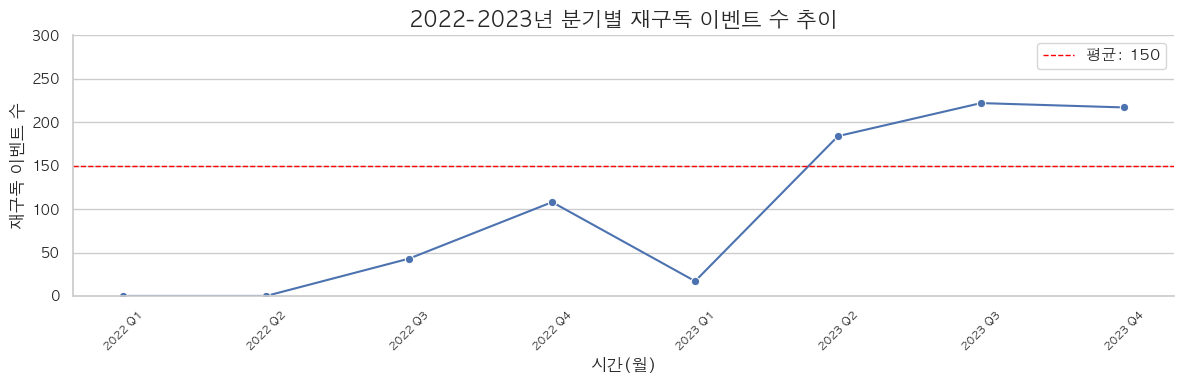

In [ ]:
sns.set_theme(style='whitegrid', rc={'figure.figsize':(12,4)},font='AppleGothic')
plt.rcParams.update({
    "font.size": 12,         # 기본 폰트 크기
    "axes.titlesize": 15,    # 제목 폰트 크기
    "axes.labelsize": 12,    # 축 라벨 폰트 크기
    "xtick.labelsize": 8,   # x축 눈금 폰트 크기
    "ytick.labelsize": 10    # y축 눈금 폰트 크기
})

# 그래프 그리기
sns.lineplot(data= resubscribe_quarter_df, x='date_quarter', y='resubscribe_subscription', marker='o')

# 평균선 그리기
mean_value = resubscribe_quarter_df[resubscribe_quarter_df['date_quarter'] > '2022 Q3']['resubscribe_subscription'].mean() # 이벤트가 집계되지 않았던 2022년 7월까지의 데이터 미포함한 평균
plt.axhline(mean_value, color='red', linestyle='--', linewidth=1, label=f'평균: {mean_value:.0f}')


# 그래프 세부 정보 설정
plt.title('2022-2023년 분기별 재구독 이벤트 수 추이')
plt.grid(axis='x')
plt.xlabel('시간(월)')
plt.ylabel('재구독 이벤트 수')
plt.xticks(rotation=45)
plt.ylim(0, 300)
sns.despine()
plt.legend()

plt.tight_layout()
plt.show()

#### 2-1) 월별 정기 결제 수

- 집계 : renew_subscription

- 해당 지표를 확인하는 목적은 서비스의 거시적 관점에서 유저들이 안정적으로 정기결제를 유지하는지 확인하기 위함

- 따라서 비율이 아닌 정기 결제 수의 변화 추이를 확인

In [ ]:
# 월별 정기결제 테이블 생성
renew_subscription_df = month_date_df.reset_index()[['date_month', 'renew_subscription']]
renew_subscription_df

,date_month,renew_subscription
0,2022-01,0
1,2022-02,0
2,2022-03,0
3,2022-04,0
4,2022-05,0
5,2022-06,0
6,2022-07,0
7,2022-08,0
8,2022-09,879
9,2022-10,1040


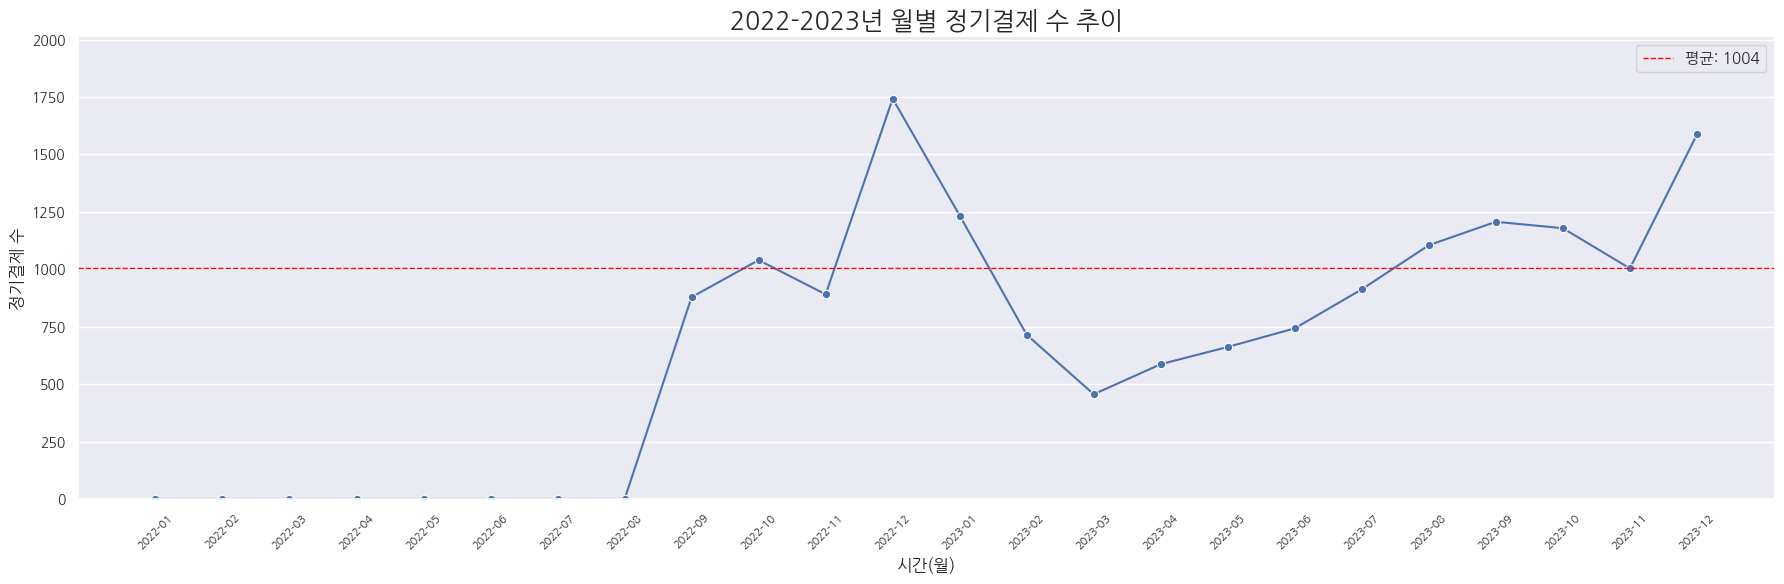

In [ ]:
# 그래프 스타일 설정
sns.set_theme(style='darkgrid', rc={'figure.figsize':(18,6)},font='Nanum Gothic')
plt.rcParams.update({
    "font.size": 12,         # 기본 폰트 크기
    "axes.titlesize": 18,    # 제목 폰트 크기
    "axes.labelsize": 12,    # 축 라벨 폰트 크기
    "xtick.labelsize": 8,   # x축 눈금 폰트 크기
    "ytick.labelsize": 10    # y축 눈금 폰트 크기
})

# 그래프 그리기
sns.lineplot(data= renew_subscription_df, x='date_month', y='renew_subscription', marker='o')

# 평균선 그리기
mean_value = renew_subscription_df[renew_subscription_df['date_month'] > '2022-09']['renew_subscription'].mean() # 이벤트가 집계되지 않았던 2022년 7월까지의 데이터 미포함한 평균
plt.axhline(mean_value, color='red', linestyle='--', linewidth=1, label=f'평균: {mean_value:.0f}')


# 그래프 세부 정보 설정
plt.title('2022-2023년 월별 정기결제 수 추이')
plt.grid(axis='x')
plt.xlabel('시간(월)')
plt.ylabel('정기결제 수')
plt.xticks(rotation=45)
plt.ylim(0, 2010)
sns.despine()
plt.legend()

plt.tight_layout()
plt.show()

#### 2-2) 분기별 정기 결제 수

- 집계 : renew_subscription

- 해당 지표를 확인하는 목적은 서비스의 거시적 관점에서 유저들이 안정적으로 정기결제를 유지하는지 확인하기 위함

- 따라서 비율이 아닌 정기 결제 수의 변화 추이를 확인

In [ ]:
# 2018 Q1 형식으로 분기 추가

renew_subscription_df['date_quarter'] = (
    pd.to_datetime(renew_subscription_df['date_month']).dt.year.astype(str) +  # 연도 문자열
    ' Q' +  # 공백과 "Q" 추가
    (((pd.to_datetime(renew_subscription_df['date_month']).dt.month - 1) // 3) + 1).astype(str))  # 분기 계산 후 문자열로 변환

In [ ]:
# 분기별 재구독 수 집계
renew_subscription_quarter_df = renew_subscription_df.groupby('date_quarter').sum()[['renew_subscription']].reset_index()
renew_subscription_quarter_df

,date_quarter,renew_subscription
0,2022 Q1,0
1,2022 Q2,0
2,2022 Q3,879
3,2022 Q4,3674
4,2023 Q1,2405
5,2023 Q2,1992
6,2023 Q3,3225
7,2023 Q4,3770


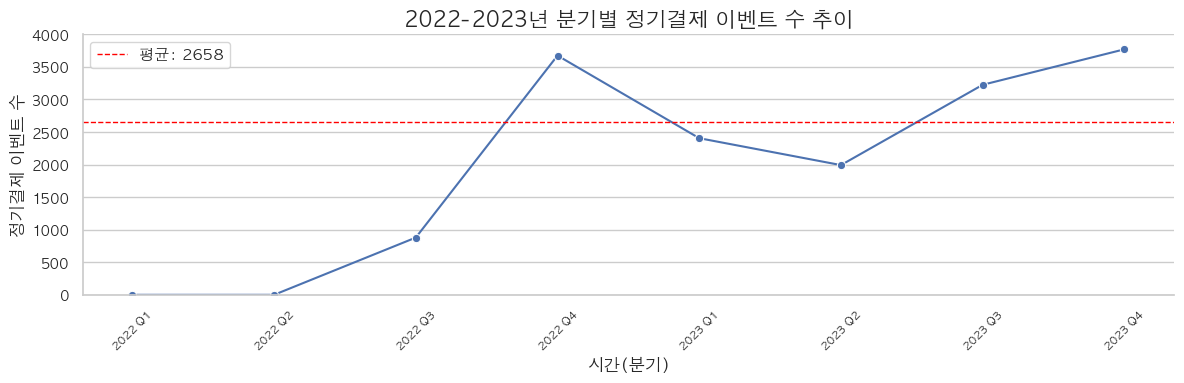

In [ ]:
sns.set_theme(style='whitegrid', rc={'figure.figsize':(12,4)},font='AppleGothic')
plt.rcParams.update({
    "font.size": 12,         # 기본 폰트 크기
    "axes.titlesize": 15,    # 제목 폰트 크기
    "axes.labelsize": 12,    # 축 라벨 폰트 크기
    "xtick.labelsize": 8,   # x축 눈금 폰트 크기
    "ytick.labelsize": 10    # y축 눈금 폰트 크기
})

# 그래프 그리기
sns.lineplot(data= renew_subscription_quarter_df, x='date_quarter', y='renew_subscription', marker='o')

# 평균선 그리기
mean_value = renew_subscription_quarter_df[renew_subscription_quarter_df['date_quarter'] > '2022 Q2']['renew_subscription'].mean() # 이벤트가 집계되지 않았던 2022년 2분기 이후를 제외하고 평균 산출
plt.axhline(mean_value, color='red', linestyle='--', linewidth=1, label=f'평균: {mean_value:.0f}')


# 그래프 세부 정보 설정
plt.title('2022-2023년 분기별 정기결제 이벤트 수 추이')
plt.grid(axis='x')
plt.xlabel('시간(분기)')
plt.ylabel('정기결제 이벤트 수')
plt.xticks(rotation=45)
plt.ylim(0, 4000)
sns.despine()
plt.legend()

plt.tight_layout()
plt.show()

---

### 기타

#### 1-1 ) 무료체험 시작 비율

- 집계 : ((`start_free_trial`) / (`enter_main_page`)) * 100

> - 2023년 4월 이후 무료체험 폐지
>
> - 2021.12~2022.11 : A타입
>
> - 2023.01~2023.04 : B타입

In [ ]:
# 월별 재구독 테이블 생성
free_trial_df = month_date_df.reset_index()[['date_month','enter_main_page','start_free_trial']]
free_trial_df

,date_month,enter_main_page,start_free_trial
0,2022-01,78320,4697
1,2022-02,111979,3019
2,2022-03,111278,4187
3,2022-04,85995,4116
4,2022-05,86673,4763
5,2022-06,94146,4751
6,2022-07,82109,1469
7,2022-08,59473,304
8,2022-09,46633,372
9,2022-10,43738,330


In [ ]:
# 메인페이지 대비 무료체험 비율 컬럼 추가
free_trial_df['free_trial_ratio'] = ((free_trial_df['start_free_trial'] / free_trial_df['enter_main_page'])*100).round(2)

In [ ]:
# 추가된 컬럼 확인
free_trial_df

,date_month,enter_main_page,start_free_trial,free_trial_ratio
0,2022-01,78320,4697,6.00
1,2022-02,111979,3019,2.70
2,2022-03,111278,4187,3.76
3,2022-04,85995,4116,4.79
4,2022-05,86673,4763,5.50
5,2022-06,94146,4751,5.05
6,2022-07,82109,1469,1.79
7,2022-08,59473,304,0.51
8,2022-09,46633,372,0.80
9,2022-10,43738,330,0.75


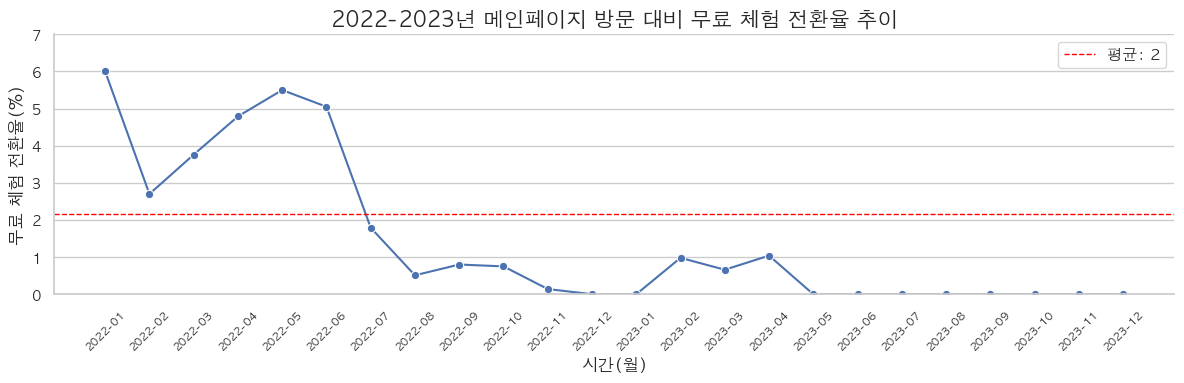

In [ ]:
# 그래프 스타일 설정
sns.set_theme(style='whitegrid', rc={'figure.figsize':(12,4)},font='AppleGothic')
plt.rcParams.update({
    "font.size": 12,         # 기본 폰트 크기
    "axes.titlesize": 15,    # 제목 폰트 크기
    "axes.labelsize": 12,    # 축 라벨 폰트 크기
    "xtick.labelsize": 8,   # x축 눈금 폰트 크기
    "ytick.labelsize": 10    # y축 눈금 폰트 크기
})

# 그래프 그리기
sns.lineplot(data= free_trial_df, x='date_month', y='free_trial_ratio', marker='o')

# 평균선 그리기
mean_value = free_trial_df[free_trial_df['date_month'] < '2023-05']['free_trial_ratio'].mean() # 이벤트가 집계되지 않았던 2023년 5월 이후 데이터 제외한 후 평균 산출
plt.axhline(mean_value, color='red', linestyle='--', linewidth=1, label=f'평균: {mean_value:.0f}')


# 그래프 세부 정보 설정
plt.title('2022-2023년 메인페이지 방문 대비 무료 체험 전환율 추이')
plt.grid(axis='x')
plt.xlabel('시간(월)')
plt.ylabel('무료 체험 전환율(%)')
plt.xticks(rotation=45)
plt.ylim(0, 7)
sns.despine()
plt.legend()

plt.tight_layout()
plt.show()

> - 2023년 4월 이후 무료체험 폐지
>
> - 2021.12~2022.11 : A타입
>
> - 2023.01~2023.04 : B타입

#### 1-2) 무료 체험 수
- 집계 기준 : `start_free_trial`

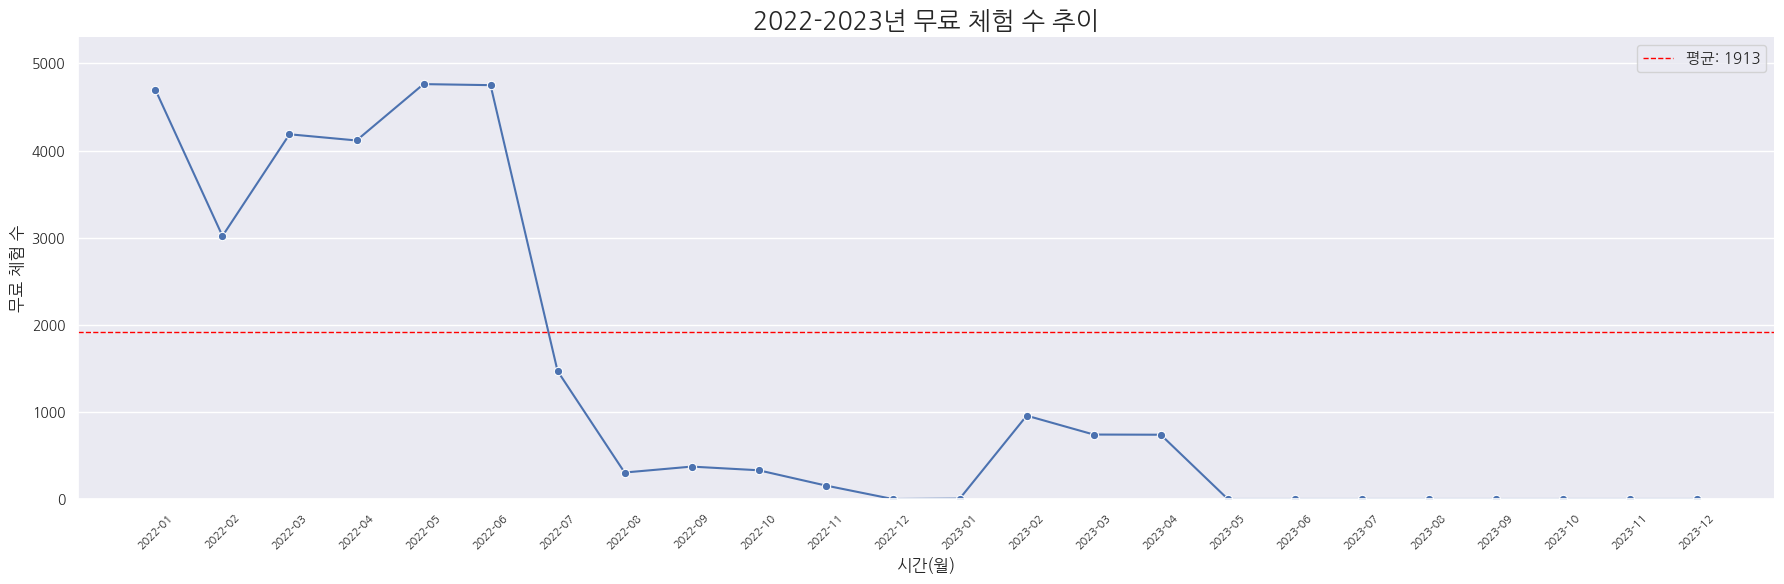

In [ ]:
# 그래프 스타일 설정
sns.set_theme(style='darkgrid', rc={'figure.figsize':(18,6)},font='Nanum Gothic')
plt.rcParams.update({
    "font.size": 12,         # 기본 폰트 크기
    "axes.titlesize": 18,    # 제목 폰트 크기
    "axes.labelsize": 12,    # 축 라벨 폰트 크기
    "xtick.labelsize": 8,   # x축 눈금 폰트 크기
    "ytick.labelsize": 10    # y축 눈금 폰트 크기
})

# 그래프 그리기
sns.lineplot(data= free_trial_df, x='date_month', y='start_free_trial', marker='o')

# 평균선 그리기
mean_value = free_trial_df[free_trial_df['date_month'] < '2023-05']['start_free_trial'].mean() # 이벤트가 집계되지 않았던 2023년 5월 이후 데이터 제외한 후 평균 산출
plt.axhline(mean_value, color='red', linestyle='--', linewidth=1, label=f'평균: {mean_value:.0f}')


# 그래프 세부 정보 설정
plt.title('2022-2023년 무료 체험 수 추이')
plt.grid(axis='x')
plt.xlabel('시간(월)')
plt.ylabel('무료 체험 수')
plt.xticks(rotation=45)
plt.ylim(0, 5300)
sns.despine()
plt.legend()

plt.tight_layout()
plt.show()

> - 2023년 4월 이후 무료체험 폐지
>
> - 2021.12~2022.11 : A타입
>
> - 2023.01~2023.04 : B타입

> B타입이 A타입 만큼 성과를 거두지 못함
> - 만약 무료체험을 4월 이후에 폐지했다면, A타입에 심각한 이슈가 있어 B타입으로 전환했으나 ROI가 저조한 것으로 판단하여 무료체험 자체를 폐지했을 가능성이 높음
> - A타입에 심각한 이슈가 없었다면 만약 무료체험을 4월 이후에 폐지하지 않고, A타입으로 다시 롤백헀으나 로그 데이터 집계 누락으로 데이터가 집계되지 않았을 가능성 존재

#### 1-3) 분기별 무료체험 시작 이벤트 수
- 집계 기준 : `start_free_trial`

In [ ]:
# 2018 Q1 형식으로 분기 추가
free_trial_df['date_quarter'] = (
    pd.to_datetime(free_trial_df['date_month']).dt.year.astype(str) +  # 연도 문자열
    ' Q' +  # 공백과 "Q" 추가
    (((pd.to_datetime(free_trial_df['date_month']).dt.month - 1) // 3) + 1).astype(str))  # 분기 계산 후 문자열로 변환

In [ ]:
# 분기별 재구독 수 집계
start_free_trial_quarter_df = free_trial_df.groupby('date_quarter').sum()[['start_free_trial']].reset_index()
start_free_trial_quarter_df

,date_quarter,start_free_trial
0,2022 Q1,11903
1,2022 Q2,13630
2,2022 Q3,2145
3,2022 Q4,485
4,2023 Q1,1701
5,2023 Q2,738
6,2023 Q3,0
7,2023 Q4,0


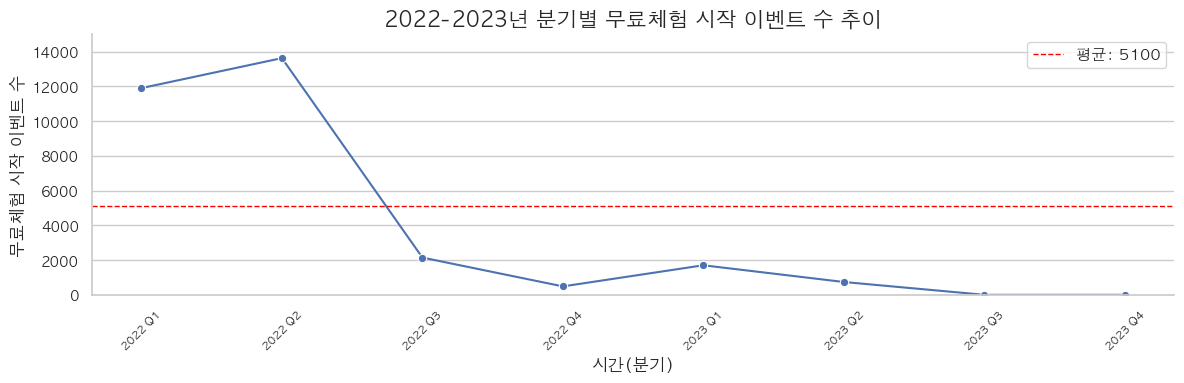

In [ ]:
# 그래프 스타일 설정
sns.set_theme(style='whitegrid', rc={'figure.figsize':(12,4)},font='AppleGothic')
plt.rcParams.update({
    "font.size": 12,         # 기본 폰트 크기
    "axes.titlesize": 15,    # 제목 폰트 크기
    "axes.labelsize": 12,    # 축 라벨 폰트 크기
    "xtick.labelsize": 8,   # x축 눈금 폰트 크기
    "ytick.labelsize": 10    # y축 눈금 폰트 크기
})

# 그래프 그리기
sns.lineplot(data= start_free_trial_quarter_df, x='date_quarter', y='start_free_trial', marker='o')

# 평균선 그리기
mean_value = start_free_trial_quarter_df[start_free_trial_quarter_df['date_quarter'] < '2023 Q3']['start_free_trial'].mean() # 이벤트가 집계되지 않았던 2023년 3분기 이후 데이터 제외한 후 평균 산출
plt.axhline(mean_value, color='red', linestyle='--', linewidth=1, label=f'평균: {mean_value:.0f}')


# 그래프 세부 정보 설정
plt.title('2022-2023년 분기별 무료체험 시작 이벤트 수 추이')
plt.grid(axis='x')
plt.xlabel('시간(분기)')
plt.ylabel('무료체험 시작 이벤트 수')
plt.xticks(rotation=45)
plt.ylim(0,15000)
sns.despine()
plt.legend()

plt.tight_layout()
plt.show()

#### 2-1) 구독 취소 수
- 집계 기준 : `click.cancel_plan_button`

In [ ]:
# 월별 구독 취소 버튼 클릭 테이블 생성
cancel_plan_btn_df = month_date_df.reset_index()[['date_month', 'click_cancel_plan_button']]
cancel_plan_btn_df

,date_month,click_cancel_plan_button
0,2022-01,879
1,2022-02,492
2,2022-03,553
3,2022-04,577
4,2022-05,537
5,2022-06,550
6,2022-07,618
7,2022-08,725
8,2022-09,689
9,2022-10,632


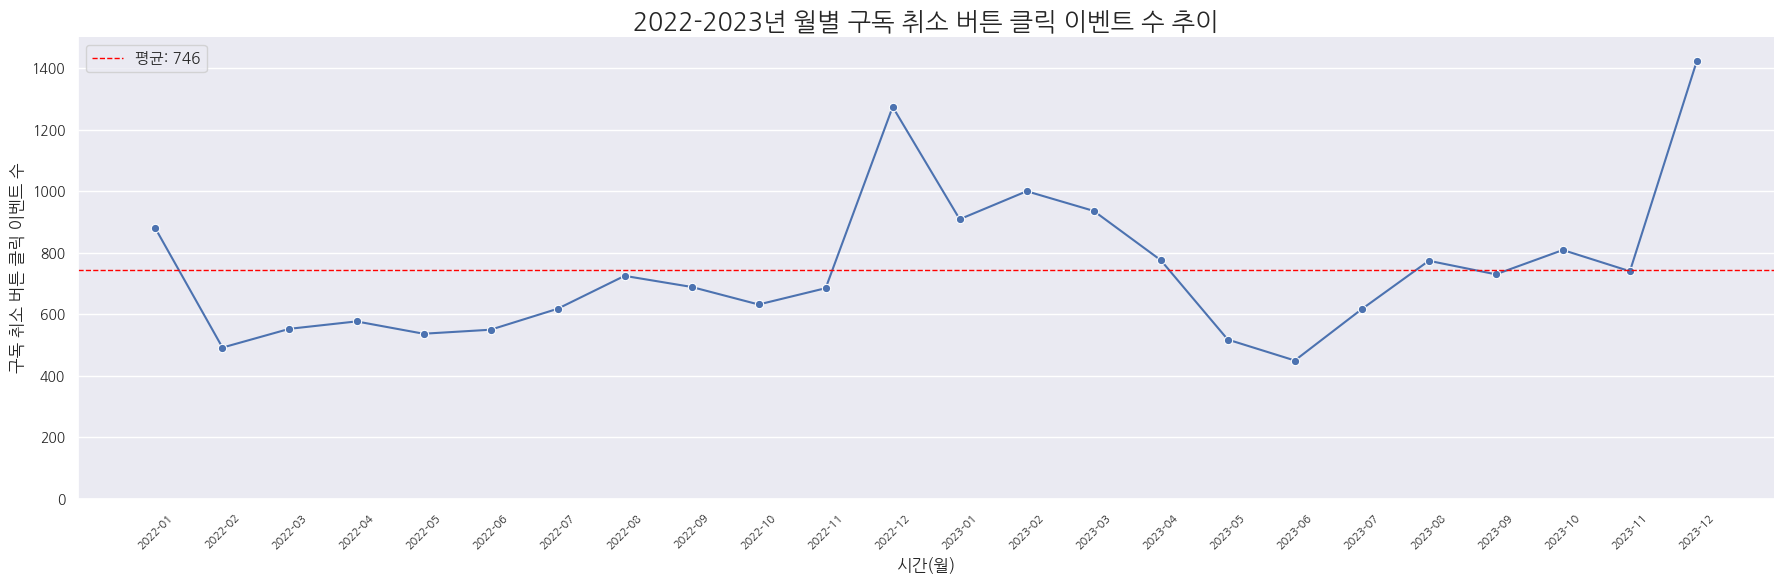

In [ ]:
# 그래프 스타일 설정
sns.set_theme(style='darkgrid', rc={'figure.figsize':(18,6)},font='Nanum Gothic')
plt.rcParams.update({
    "font.size": 12,         # 기본 폰트 크기
    "axes.titlesize": 18,    # 제목 폰트 크기
    "axes.labelsize": 12,    # 축 라벨 폰트 크기
    "xtick.labelsize": 8,   # x축 눈금 폰트 크기
    "ytick.labelsize": 10    # y축 눈금 폰트 크기
})

# 그래프 그리기
sns.lineplot(data= cancel_plan_btn_df, x='date_month', y='click_cancel_plan_button', marker='o')

# 평균선 그리기
mean_value = cancel_plan_btn_df['click_cancel_plan_button'].mean()
plt.axhline(mean_value, color='red', linestyle='--', linewidth=1, label=f'평균: {mean_value:.0f}')


# 그래프 세부 정보 설정
plt.title('2022-2023년 월별 구독 취소 버튼 클릭 이벤트 수 추이')
plt.grid(axis='x')
plt.xlabel('시간(월)')
plt.ylabel('구독 취소 버튼 클릭 이벤트 수')
plt.xticks(rotation=45)
plt.ylim(0, 1500)
sns.despine()
plt.legend()

plt.tight_layout()
plt.show()

#### 2-1) 분기별 구독 취소 버튼 클릭 이벤트 수
- 집계 기준 : `click.cancel_plan_button`

In [ ]:
# 2018 Q1 형식으로 분기 추가
cancel_plan_btn_df['date_quarter'] = (
    pd.to_datetime(cancel_plan_btn_df['date_month']).dt.year.astype(str) +  # 연도 문자열
    ' Q' +  # 공백과 "Q" 추가
    (((pd.to_datetime(cancel_plan_btn_df['date_month']).dt.month - 1) // 3) + 1).astype(str))  # 분기 계산 후 문자열로 변환

In [ ]:
# 분기별 재구독 수 집계
cancel_plan_btn_quarter_df = cancel_plan_btn_df.groupby('date_quarter').sum()[['click_cancel_plan_button']].reset_index()
cancel_plan_btn_quarter_df

,date_quarter,click_cancel_plan_button
0,2022 Q1,1924
1,2022 Q2,1664
2,2022 Q3,2032
3,2022 Q4,2591
4,2023 Q1,2845
5,2023 Q2,1744
6,2023 Q3,2121
7,2023 Q4,2973


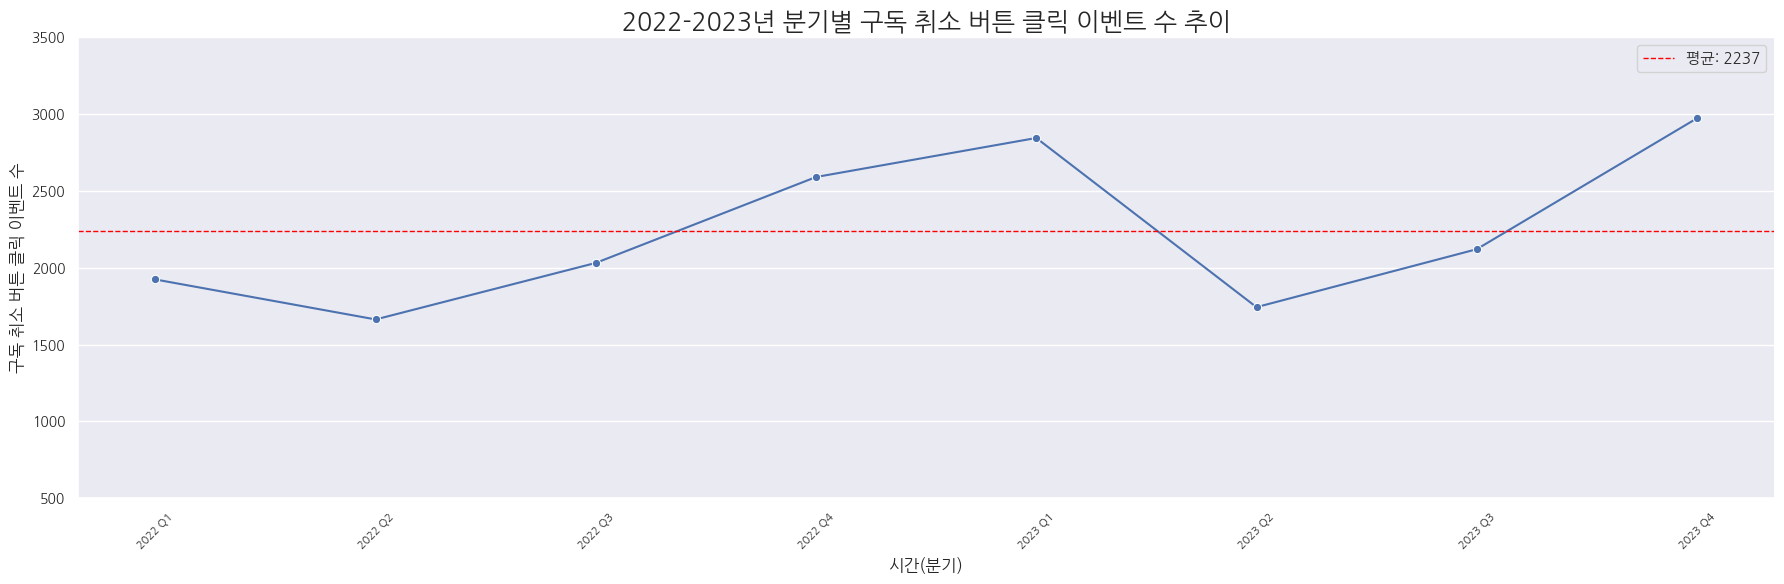

In [ ]:
# 그래프 스타일 설정
sns.set_theme(style='darkgrid', rc={'figure.figsize':(18,6)},font='Nanum Gothic')
plt.rcParams.update({
    "font.size": 12,         # 기본 폰트 크기
    "axes.titlesize": 18,    # 제목 폰트 크기
    "axes.labelsize": 12,    # 축 라벨 폰트 크기
    "xtick.labelsize": 8,   # x축 눈금 폰트 크기
    "ytick.labelsize": 10    # y축 눈금 폰트 크기
})

# 그래프 그리기
sns.lineplot(data= cancel_plan_btn_quarter_df, x='date_quarter', y='click_cancel_plan_button', marker='o')

# 평균선 그리기
mean_value = cancel_plan_btn_quarter_df['click_cancel_plan_button'].mean()
plt.axhline(mean_value, color='red', linestyle='--', linewidth=1, label=f'평균: {mean_value:.0f}')


# 그래프 세부 정보 설정
plt.title('2022-2023년 분기별 구독 취소 버튼 클릭 이벤트 수 추이')
plt.grid(axis='x')
plt.xlabel('시간(분기)')
plt.ylabel('구독 취소 버튼 클릭 이벤트 수')
plt.xticks(rotation=45)
plt.ylim(500, 3500)
sns.despine()
plt.legend()

plt.tight_layout()
plt.show()

> 1분기에 증가했다가 2분기 감소 후 다시 1분기까지 증가하는 패턴
> 
> - 1분기 취소 증가
>    - 많은 사람들이 연초에 새해 결심으로 학습을 시작, 시간이 지나며 관심이 줄어듦
>	 - 새해 할인 이벤트로 인해 많은 신규 사용자가 가입했다가 단기간 이용 후 이탈 가능성
>
> -	2분기 취소 감소
>	 - 학기 초(2~3월)에 맞춰 학습 수요가 증가하거나, 1분기 이탈 이후 남은 사용자들이 더 충성도가 높은 경우
>
> - 3~4분기를 거치며 1분기까지 취소 증가
>	 - 연말 이벤트로 가입자 수가 증가했다가 다시 1분기에 이탈
>	 - 학습을 지속하지 못하고 이탈 증가로 추정
>    - 4분기에는 프로모션으로 신규 유입이 많으므로 이탈 수도 비례해서 증가하는 것으로 추정

---

### (참고)결제 유형별 추이

In [ ]:
pay_type_df = month_date_df[['complete_subscription','renew_subscription','resubscribe_subscription']]
pay_type_df = pay_type_df.reset_index()

In [ ]:
pay_type_df

,date_month,complete_subscription,renew_subscription,resubscribe_subscription
0,2022-01,58,0,0
1,2022-02,533,0,0
2,2022-03,657,0,0
3,2022-04,562,0,0
4,2022-05,632,0,0
5,2022-06,602,0,0
6,2022-07,716,0,0
7,2022-08,397,0,0
8,2022-09,260,879,43
9,2022-10,202,1040,64


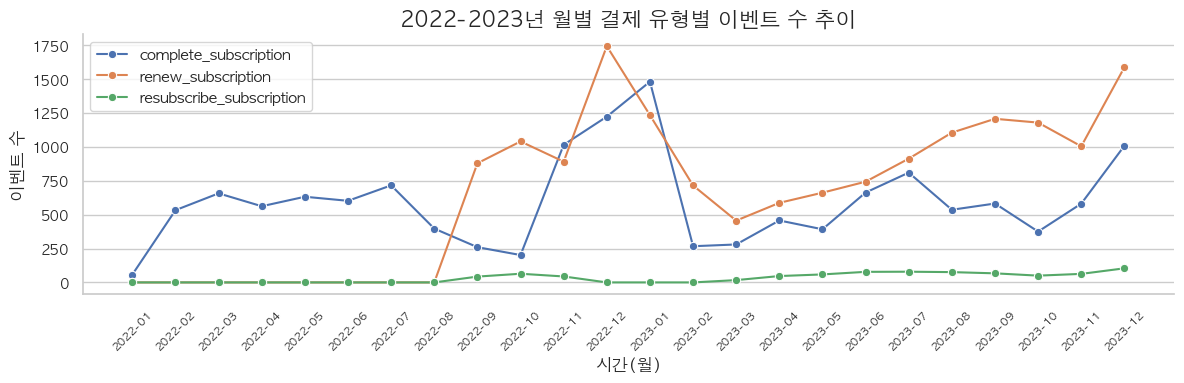

In [ ]:
# 그래프 스타일 설정
sns.set_theme(style='whitegrid', rc={'figure.figsize':(12,4)},font='AppleGothic')
plt.rcParams.update({
    "font.size": 12,         # 기본 폰트 크기
    "axes.titlesize": 15,    # 제목 폰트 크기
    "axes.labelsize": 12,    # 축 라벨 폰트 크기
    "xtick.labelsize": 8,   # x축 눈금 폰트 크기
    "ytick.labelsize": 10    # y축 눈금 폰트 크기
})

# 그래프 그리기
# 데이터를 Long-Form으로 변환
df_melted = pay_type_df.melt(id_vars="date_month", var_name="event_type", value_name="value")

# 라인 그래프 그리기
sns.lineplot(data=df_melted, x="date_month", y="value", hue="event_type",marker='o')


# 그래프 세부 정보 설정
plt.title('2022-2023년 월별 결제 유형별 이벤트 수 추이')
plt.grid(axis='x')
plt.xlabel('시간(월)')
plt.ylabel('이벤트 수')
plt.xticks(rotation=45)
# plt.ylim(500, 3500)
sns.despine()
plt.legend()

plt.tight_layout()
plt.show()

---
---

---
---

# 첫 유료 구독에 영향을 미치는 요인 분석 - 로지스틱 회귀 분석

**[목차]**
1. 개요

2. 기본 환경 세팅

3. 데이터 준비
    - 모수 생성($\rightarrow$ 회귀분석 테이블)
    - 첫 유료 구독 유저의 결제 시점 테이블 생성

4. 종속변수 생성

5. 독립변수 생성(전처리 포함)
    - 변수별 전처리 후 회귀분석 테이블에 하나씩 추가

6. 다중 로지스틱 회귀분석
    
7. 결론

---
---

## 1. 개요

1. 배경 : 회원가입 → 첫 유료 구독 전환율 `15%` 로 다른 단계에 비해 전환율 저조, 해당 퍼널 개선시키면 전체 매출 볼륨 증가 기대

2. 목적 : 첫 유료 구독 완료에 긍정적인/부정적인 영향을 끼치는 변수를 선별하여, 첫 유료 구독 완료에 영향을 미치는 요인을 파악하고, 첫 유료 구독 완료 전환을 위한 인사이트를 도출하기 위함

3. 모수 : 회원가입한 유저

4. 변수 : 모든 변수는 개별 유저가 구독 전까지의 데이터로 통일
    | **변수 유형** | **변수 이름**                                | **설명**                                     |**타입**|
    |---------------|---------------------------------------------|----------------------------------------|----------|
    | 종속 변수      | `complete.subscription`                   | 첫 유료 구독 완료 여부                           | 0 / 1 |
    | 독립 변수      | `enter.content_page`                      | 콘텐츠 페이지 진입 횟수                         | int |
    | 독립 변수      | `enter.lesson_page`                       | 레슨페이지 진입 횟수                              | int |
    | 독립 변수      | `click.content_page_more_review_button`   | 콘텐츠 후기 더보기 버튼 클릭 여부                   |   0 / 1   |
    | 독립 변수      | `start.free_trial`                        | 무료 체험 여부                              | 0 / 1 |
<br>

5. 변수별 가설

    - `콘텐츠 페이지 진입 횟수`가 첫 유료 구독 완료 여부에 영향을 끼쳤을 것이다.

    - `레슨 페이지 진입 횟수`가 첫 유료 구독 완료 여부에 영향을 끼쳤을 것이다.

    - `콘텐츠 후기 더보기 버튼 클릭 여부`가 첫 유료 구독 완료 여부에 영향을 끼쳤을 것이다.

    - `무료체험 여부`가 첫 유료 구독 완료 여부에 영향을 끼쳤을 것이다.

---

## 2. 기본 환경 세팅

### 라이브러리 호출

In [ ]:
# 라이브러리 호출
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import chi2_contingency


# 한글 폰트 설정하기
import matplotlib.pyplot as plt
plt.rc('font', family='Nanum Gothic')
plt.rcParams['axes.unicode_minus'] =False

# Warnings 제거
import warnings
warnings.filterwarnings('ignore')

### 각 이벤트 데이터 프레임 생성

In [ ]:
# 회원가입 이벤트 테이블
complete_signup_df = pd.read_csv('./data/complete.signup.csv')
complete_signup_df.head(3)

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,type
0,NaN,2023-04-05 21:33:26.068000,NaN,NaN,NaN,NaN,complete.signup,NaN,NaN,NaN,NaN,74d17c27a41656e7788b0c81d9f76cda,kakao
1,NaN,2023-04-05 21:45:18.672000,NaN,NaN,NaN,NaN,complete.signup,NaN,NaN,NaN,NaN,06b6868000a5d576180aca47896d6cce,kakao
2,Seo-gu,2023-04-10 14:47:56.424000,South Korea,NaN,Windows,Windows,complete.signup,Korean,Chrome,111.0.0.0,Web,e131c319972bd580146c5a2faba26613,kakao


In [ ]:
# 콘텐츠 수강하기 버튼명
click_start_content_btn_df = pd.read_csv('./data/click.content_page_start_content_button.csv')
click_start_content_btn_df.head(3)

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content.id,button.name,button_name
0,Daejeon,2023-04-05 21:14:38.432000,South Korea,NaN,Windows,Windows,click.content_page_start_content_button,Korean,Edge,111.0.1661.62,Web,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430,콘텐츠 구독하기,NaN
1,Seongnam-si,2023-04-10 14:57:20.033000,South Korea,NaN,Windows,Windows,click.content_page_start_content_button,Korean,Edge,112.0.1722.34,Web,f7155af01d277f11b1c7d05cf772c686,18992b667be06d6f29ba0008f99d9745,콘텐츠 이어보기,NaN
2,Yangp'yong,2023-04-10 14:28:29.515000,South Korea,NaN,Windows,Windows,click.content_page_start_content_button,Korean,Chrome,111.0.0.0,Web,1b05f9fe82b80771323caa1cd5683143,dfbdae782996c25daed7517b8835f3aa,콘텐츠 이어보기,NaN


In [ ]:
# 시작한 콘텐츠 수
start_content_df = pd.read_csv('./data/start.content.csv')
start_content_df.head(3)

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content.id,content.difficulty
0,Daejeon,2023-04-05 21:14:39.906000,South Korea,NaN,Windows,Windows,start.content,Korean,Edge,111.0.1661.62,Web,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430,beginner
1,Seoul,2023-04-05 21:50:19.674000,South Korea,NaN,Mac,Mac,start.content,Korean,Safari,15.6.1,Web,06b6868000a5d576180aca47896d6cce,f4be1a0fe0e301b03115591777fddf29,beginner
2,Seoul,2023-04-10 14:06:26.585000,South Korea,NaN,Mac,Mac,start.content,Korean,Whale,3.19.166.16,Web,7b2ff3116db46b5e4326d49c7b027631,61b6463287573f00de13a930805a52d6,beginner


In [ ]:
# 확인한 콘텐츠 수
enter_content_page_df = pd.read_csv('./data/enter.content_page.csv')
enter_content_page_df.head(3)

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content.id
0,Seoul,2023-04-05 21:40:35.740000,South Korea,NaN,Apple iPhone,Apple iPhone,enter.content_page,Korean,Chrome,108.0.5359.112,Web,d57aba7b4527e71b96135deaaec57def,220ce7873b8895d0c81c37600b5bd1e7
1,Hwaseong-si,2023-04-05 21:01:59.950000,South Korea,NaN,Samsung Galaxy Note,Samsung Galaxy Note10+ 5G,enter.content_page,Korean,Chrome,111.0.0.0,Web,NaN,ecde9a1b01763f791c3a185d53b5f394
2,Daejeon,2023-04-05 21:13:12.038000,South Korea,NaN,Windows,Windows,enter.content_page,Korean,Edge,111.0.1661.62,Web,41362ad5ebcade2bb1b78344a53e7ccf,b8d4ec0133e5ce485055bfd69cd28abd


In [ ]:
# 확인한 레슨 수
enter_lesson_page_df = pd.read_csv('./data/enter.lesson_page.csv')
enter_lesson_page_df.head(3)

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content.id,is_trial,lesson.id,is_free_trial
0,Wonju,2023-04-05 21:46:04.333000,South Korea,NaN,Windows,Windows,enter.lesson_page,Korean,Chrome,111.0.0.0,Web,91053eda0bffb4db6c9317acf15bc44a,94bdcbd9f329aafa84ab464b6721187d,False,d360d68b65fd3e0eafb7982386d75fd9,NaN
1,Wonju,2023-04-05 21:55:50.787000,South Korea,NaN,Windows,Windows,enter.lesson_page,Korean,Chrome,111.0.0.0,Web,91053eda0bffb4db6c9317acf15bc44a,94bdcbd9f329aafa84ab464b6721187d,False,d360d68b65fd3e0eafb7982386d75fd9,NaN
2,Wonju,2023-04-05 21:55:55.684000,South Korea,NaN,Windows,Windows,enter.lesson_page,Korean,Chrome,111.0.0.0,Web,91053eda0bffb4db6c9317acf15bc44a,94bdcbd9f329aafa84ab464b6721187d,False,770740696ab1809d6b50d4013b64a75c,NaN


In [ ]:
# 콘텐츠 후기 버튼 클릭 수
click_content_page_more_review_button_df = pd.read_csv('./data/click.content_page_more_review_button.csv')
click_content_page_more_review_button_df.head(3)

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content.id
0,Seo-gu,2023-04-10 14:10:01.402000,South Korea,NaN,Windows,Windows,click.content_page_more_review_button,Korean,Chrome,112.0.0.0,Web,558fe7e8c06b8505f11b33d76f076e56,a1eeebeb6c307641b75b94a2a1d5b9aa
1,London,2023-01-24 21:37:43.417000,United Kingdom,NaN,Windows,Windows,click.content_page_more_review_button,Korean,Whale,3.18.154.13,Web,e48956538e4df690a5d12adf1e6f2ee3,f491517f4737a60d661cd1fcacc702c0
2,Eunpyeong-gu,2023-01-31 14:44:16.897000,South Korea,NaN,Windows,Windows,click.content_page_more_review_button,Korean,Chrome,109.0.0.0,Web,e745da89019e303b122bfceac0521a8f,9aa7628a347707fb155943041e2cb524


In [ ]:
# 무료체험 여부
start_free_trial_df = pd.read_csv('./data/start.free_trial.csv')
start_free_trial_df.head(3)

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,plan.price,plan.type,trial.type
0,Seoul,2023-04-05 21:49:36.156000,South Korea,NaN,Mac,Mac,start.free_trial,Korean,Safari,15.6.1,Web,06b6868000a5d576180aca47896d6cce,15920.0,1개월 플랜,B
1,Dobong-gu,2023-03-12 08:28:29.384000,South Korea,NaN,Windows,Windows,start.free_trial,Korean,Chrome,110.0.0.0,Web,40acc1ddfc012f3d2f58a3de95e9e748,15920.0,1개월 플랜,B
2,NaN,2023-03-12 08:35:00.107000,NaN,NaN,NaN,NaN,start.free_trial,NaN,NaN,NaN,NaN,38aca03fba9753a6b2f31b829fb16a30,15920.0,1개월 플랜,B


In [ ]:
# 첫 유료 구독 완료 이벤트 테이블
subscription_df = pd.read_csv('./data/complete.subscription.csv')
subscription_df.head(3)

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,plan.price,paid_amount,coupon.discount_amount,pg.type
0,Nowon-gu,2023-04-05 21:40:04.000000,South Korea,NaN,Windows,Windows,complete.subscription,Korean,Edge,111.0.1661.62,Web,1116a2ae90ca6b06f85feba27ad51ef0,15920,15920,0,NaN
1,Seoul,2023-04-10 14:20:03.008000,South Korea,NaN,Apple iPhone,Apple iPhone,complete.subscription,Korean,Mobile Safari,16.3,Web,c0f5678df8967163e6e2c464ed006791,131600,131600,0,NaN
2,Yangsan,2023-03-12 08:46:14.026000,South Korea,NaN,Windows,Windows,complete.subscription,Korean,Chrome,111.0.0.0,Web,79421b5d038205ad7adbb1e2c3b89741,131600,119756,11844,NaN


---

## 3. 데이터 준비 
- 모수 및 구독자의 구독이전 시점 테이블 생성

- 회귀분석을 위해 변수별 데이터를 집계할 때, 고유한 사용자별로 이벤트를 파악하고, 이를 위해서는 사용자 식별이 가능해야 한다.

- 해당 서비스는 회원가입 완료 시 user_id가 생성된다.

- 현재 데이터 셋에서 회원가입을 하지 않은 사용자의 식별자(`user_id`)는 모두 결측치(=null값) 처리 되어 있으므로 식별이 불가능하다.

- 따라서 모수를 사용자 식별이 가능한 `user_id`가 존재하는 사용자로 정한다. (=회원 가입한 사람)
    - 퍼널분석에서 문제로 정의한 단계가 신규 가입자를 모수로 하기 때문에 `2022년~2023년 신규로 가입한 회원`을 모수로 설정한다.

### 모수 생성

In [ ]:
# 회원가입 완료 이벤트 테이블에서 모수 생성
complete_signup_df.head(3)

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,type
0,NaN,2023-04-05 21:33:26.068000,NaN,NaN,NaN,NaN,complete.signup,NaN,NaN,NaN,NaN,74d17c27a41656e7788b0c81d9f76cda,kakao
1,NaN,2023-04-05 21:45:18.672000,NaN,NaN,NaN,NaN,complete.signup,NaN,NaN,NaN,NaN,06b6868000a5d576180aca47896d6cce,kakao
2,Seo-gu,2023-04-10 14:47:56.424000,South Korea,NaN,Windows,Windows,complete.signup,Korean,Chrome,111.0.0.0,Web,e131c319972bd580146c5a2faba26613,kakao


In [ ]:
# 회원가입한 사용자는 user_id가 생성되어 있음(null값 미존재)
complete_signup_df['user_id'].isna().sum()

np.int64(0)

In [ ]:
# 2022년~2023년으로 기간 한정
complete_signup_df = complete_signup_df[(pd.to_datetime(complete_signup_df['client_event_time']) >= pd.to_datetime('2022-01-01'))&(pd.to_datetime(complete_signup_df['client_event_time']) < pd.to_datetime('2024-01-01'))]

In [ ]:
# 확인 총 145133 행 남음
complete_signup_df['client_event_time'].sort_values(ascending=True)

98676     2022-01-01 00:06:31.232000
98667     2022-01-01 00:10:21.400000
98679     2022-01-01 00:10:49.730000
98668     2022-01-01 00:12:18.251000
98677     2022-01-01 00:26:03.194000
                     ...            
117607    2023-12-31 23:26:30.981000
117611    2023-12-31 23:29:56.754000
117605    2023-12-31 23:31:56.109000
117612    2023-12-31 23:38:08.737000
117609    2023-12-31 23:51:53.728000
Name: client_event_time, Length: 145133, dtype: object

In [ ]:
# 모수가 되는 유저의 user_id dataframe 생성
pop_user_id_df = complete_signup_df[['user_id']]
pop_user_id_df

,user_id
0,74d17c27a41656e7788b0c81d9f76cda
1,06b6868000a5d576180aca47896d6cce
2,e131c319972bd580146c5a2faba26613
3,e3b8bfa80d866f296aad139e09023ef3
4,5208a60918f18562ac9d668a35b20303
...,...
145128,0117038cc69fe8a40388ec19bb0a495e
145129,bc1a28ff902daba9399e7f602cc86285
145130,0d507104136f139cbc9f6fa1db365162
145131,298e200203472e5bc0f9a14053e1dfe1


In [ ]:
# 중복확인
pop_user_id_df.duplicated().sum()

np.int64(0)

> #### 모수 : 2022~2023년에 가입한 유저 (`총 145,133명`)

### 첫 유료 구독 완료 유저의 결제 시점 테이블 생성
- 첫 유료 구독 여부에 영향을 끼친 요인을 분석하는 것이 목적이므로, 모든 독립변수는 구독 전 행동 혹은 특성이어야 하기 떄문에 유료 구독 이전 데이터를 선별하기 위해 해당 테이블 생성

In [ ]:
# 첫 유료 구독 완료 테이블 확인
subscription_df.head(3)

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,plan.price,paid_amount,coupon.discount_amount,pg.type
0,Nowon-gu,2023-04-05 21:40:04.000000,South Korea,NaN,Windows,Windows,complete.subscription,Korean,Edge,111.0.1661.62,Web,1116a2ae90ca6b06f85feba27ad51ef0,15920,15920,0,NaN
1,Seoul,2023-04-10 14:20:03.008000,South Korea,NaN,Apple iPhone,Apple iPhone,complete.subscription,Korean,Mobile Safari,16.3,Web,c0f5678df8967163e6e2c464ed006791,131600,131600,0,NaN
2,Yangsan,2023-03-12 08:46:14.026000,South Korea,NaN,Windows,Windows,complete.subscription,Korean,Chrome,111.0.0.0,Web,79421b5d038205ad7adbb1e2c3b89741,131600,119756,11844,NaN


In [ ]:
subscription_df.shape

(14289, 16)

In [ ]:
subscription_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14289 entries, 0 to 14288
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    13757 non-null  object 
 1   client_event_time       14289 non-null  object 
 2   country                 13906 non-null  object 
 3   device_carrier          0 non-null      float64
 4   device_family           13914 non-null  object 
 5   device_type             13764 non-null  object 
 6   event_type              14289 non-null  object 
 7   language                13914 non-null  object 
 8   os_name                 13908 non-null  object 
 9   os_version              13899 non-null  object 
 10  platform                13914 non-null  object 
 11  user_id                 14289 non-null  object 
 12  plan.price              14289 non-null  int64  
 13  paid_amount             14289 non-null  int64  
 14  coupon.discount_amount  14289 non-null

- 데이터의 오류로 첫 유료 구독 완료 이벤트에 중복값 존재

In [ ]:
# user_id 중복값 확인
subscription_df.duplicated(subset='user_id').sum()

np.int64(408)

- 데이터 제공처에서 '**첫 결제가 중복인 경우는 첫 결제 환불 후 다시 결제한 케이스로 간주**'한다고 했기 때문에 중복 데이터에서 이벤트 발생시점(`client_event_time`) 오름차순 정렬후 마지막 값만 남기는 것으로 중복값 처리

In [ ]:
# 이벤트 발생 시간 기준 오름차순 정렬후 마지막 행만 남기기
subscription_preprocessed_df = subscription_df.sort_values(by='client_event_time', ascending=True).drop_duplicates(subset='user_id', keep='last')
subscription_preprocessed_df.head(3)

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,plan.price,paid_amount,coupon.discount_amount,pg.type
9399,Seoul,2022-01-01 06:17:24.513000,South Korea,NaN,Apple iPhone,Apple iPhone,complete.subscription,Korean,Mobile Safari,15,Web,c2fd9e1a9d094f563d6ca7a6caa538be,42960,42960,0,NaN
6914,Bucheon-si,2022-01-02 08:34:14.270000,South Korea,NaN,Windows,Windows,complete.subscription,Korean,Edge,96,Web,8eabe35d59b6596f27552a4c71a279c1,15920,15920,0,NaN
5757,Dongjak-gu,2022-01-02 15:23:04.269000,South Korea,NaN,Windows,Windows,complete.subscription,Korean,Chrome,96,Web,97c0a306a466b44643469ebf1d4b57e3,42960,42960,0,NaN


In [ ]:
# user_id 중복값 확인
subscription_preprocessed_df.duplicated(subset='user_id').sum()

np.int64(0)

In [ ]:
# user_id, 이벤트 발생 시점 컬럼만 남기기
subscription_time_df = subscription_preprocessed_df[['user_id', 'client_event_time']]
subscription_time_df.head(3)

,user_id,client_event_time
9399,c2fd9e1a9d094f563d6ca7a6caa538be,2022-01-01 06:17:24.513000
6914,8eabe35d59b6596f27552a4c71a279c1,2022-01-02 08:34:14.270000
5757,97c0a306a466b44643469ebf1d4b57e3,2022-01-02 15:23:04.269000


In [ ]:
# client_event_time 컬럼명을 complete_subscription_time으로 변경
subscription_time_df = subscription_time_df.rename(columns={'client_event_time':'complete_subscription_time'})
subscription_time_df

,user_id,complete_subscription_time
9399,c2fd9e1a9d094f563d6ca7a6caa538be,2022-01-01 06:17:24.513000
6914,8eabe35d59b6596f27552a4c71a279c1,2022-01-02 08:34:14.270000
5757,97c0a306a466b44643469ebf1d4b57e3,2022-01-02 15:23:04.269000
7520,29488c6f47c0f19ed631be20c40d64c0,2022-01-03 04:25:14.519000
5747,37ebaca2779d2f5b40d5694afa387f43,2022-01-04 13:35:09.247000
...,...,...
12966,7863322f40659599730583c78e14bf5c,2023-12-31 15:00:17.325000
12965,7fdb326582ebe771300657051bea1d41,2023-12-31 15:03:12.065000
12964,d843342190fafa2634f4cfda1462ac95,2023-12-31 15:11:02.042000
12035,5ef5927946fa90f213ae50b9bf8b18f1,2023-12-31 16:18:10.681000


> #### 이후 변수별로 데이터를 전처리하여 `pop_user_id_df` 테이블과 `user_id` 기준으로 merge하여 회귀분석을 위한 테이블 생성을 완료한다.
> #### 독립 변수를 생성할 때 첫 결제 완료(=첫 유료 구독) 유저의 경우, 첫 유료 구독 이전 데이터만 선별하여 활용한다.
> - 구독 여부에 영향을 끼친 요인을 분석하는 것이 목적이므로, 모든 독립변수는 구독 전 행동 혹은 특성이어야 하기 떄문


---

## 4. 종속변수 생성

- 모수 테이블과 첫 결제 완료 유저의 결제 시점 테이블 비교하여 첫결제 완료한 유저 1, 첫결제 안한 유저 0으로 표기 

In [ ]:
# 모수 테이블과 첫 결제 완료 유저의 결제 시점 테이블 left 형식으로 merge
merge_df = pd.merge(pop_user_id_df, subscription_time_df, how='left', on='user_id')
merge_df.head(3)

,user_id,complete_subscription_time
0,74d17c27a41656e7788b0c81d9f76cda,NaN
1,06b6868000a5d576180aca47896d6cce,NaN
2,e131c319972bd580146c5a2faba26613,NaN


In [ ]:
# 크기 확인
merge_df.shape

(145133, 2)

- 첫 결제 완료 여부 0과 1로 표기

In [ ]:
# complete_subscription_time이 null이면 0, 값이 존재하면 1로 설정
merge_df['complete_subscription'] = merge_df['complete_subscription_time'].notnull().astype(int)

In [ ]:
# complete_subscription 컬럼값 확인
merge_df['complete_subscription'].unique()

array([0, 1])

In [ ]:
# user_id랑 complete_subscription 컬럼만 남기기
merge_df = merge_df[['user_id','complete_subscription']]
merge_df.head()

,user_id,complete_subscription
0,74d17c27a41656e7788b0c81d9f76cda,0
1,06b6868000a5d576180aca47896d6cce,0
2,e131c319972bd580146c5a2faba26613,0
3,e3b8bfa80d866f296aad139e09023ef3,0
4,5208a60918f18562ac9d668a35b20303,0


In [ ]:
# 최종 크기 확인
merge_df.shape

(145133, 2)

---

## 5. 독립변수 생성
- 독립변수를 개별로 생성 하여 위 모수가 반영된 종속변수 테이블(merge_df)에 merge하는 방식으로 진행

- 각 독립변수에 대한 전처리(이상치 제거, 표준화)는 후에 다중 로지스틱 회귀분석을 진행할 때 함께 진행한다.

### 1) `콘텐츠 페이지 진입 횟수`
- 유저ID별 enter.content_page 이벤트 카운트

In [ ]:
# 콘텐츠 페이지 진입 이벤트 테이블
enter_content_page_df.head(3)

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content.id
0,Seoul,2023-04-05 21:40:35.740000,South Korea,NaN,Apple iPhone,Apple iPhone,enter.content_page,Korean,Chrome,108.0.5359.112,Web,d57aba7b4527e71b96135deaaec57def,220ce7873b8895d0c81c37600b5bd1e7
1,Hwaseong-si,2023-04-05 21:01:59.950000,South Korea,NaN,Samsung Galaxy Note,Samsung Galaxy Note10+ 5G,enter.content_page,Korean,Chrome,111.0.0.0,Web,NaN,ecde9a1b01763f791c3a185d53b5f394
2,Daejeon,2023-04-05 21:13:12.038000,South Korea,NaN,Windows,Windows,enter.content_page,Korean,Edge,111.0.1661.62,Web,41362ad5ebcade2bb1b78344a53e7ccf,b8d4ec0133e5ce485055bfd69cd28abd


In [ ]:
enter_content_page_df.shape

(1914257, 13)

In [ ]:
enter_content_page_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1914257 entries, 0 to 1914256
Data columns (total 13 columns):
 #   Column             Dtype  
---  ------             -----  
 0   city               object 
 1   client_event_time  object 
 2   country            object 
 3   device_carrier     float64
 4   device_family      object 
 5   device_type        object 
 6   event_type         object 
 7   language           object 
 8   os_name            object 
 9   os_version         object 
 10  platform           object 
 11  user_id            object 
 12  content.id         object 
dtypes: float64(1), object(12)
memory usage: 189.9+ MB


#### 분석에 필요한 테이블 가공
- 분석에 필요한 테이블 중 첫 유료 구독 유저들의 데이터는 첫 유료 구독 이벤트 발생 전의 데이터만 남긴다.

1. `독립변수 생성에 사용되는 이벤트 테이블`과 `유저별 첫 유료 구독 시점 테이블` merge

2. 첫 유료 구독 유저의 경우, 데이터 중 첫 유료 구독 이전 시점 데이터만 남기기

3. 해당 독립변수의 최종 테이블 생성
    - 모수 user_id와 테이블에 left 방식으로 merge
    - 해당 독립변수에 해당하는 이벤트를 실행하지 않은 유저의 컬럼값은 0으로 집계

In [ ]:
# 콘텐츠 페이지 진입 이벤트 테이블과 유저별 첫 유료 구독 시점 테이블 merge - user_id 기준 left join형식
merge_enter_content_page_df = pd.merge(enter_content_page_df, subscription_time_df, how='left', on='user_id')
merge_enter_content_page_df.head(3)

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content.id,complete_subscription_time
0,Seoul,2023-04-05 21:40:35.740000,South Korea,NaN,Apple iPhone,Apple iPhone,enter.content_page,Korean,Chrome,108.0.5359.112,Web,d57aba7b4527e71b96135deaaec57def,220ce7873b8895d0c81c37600b5bd1e7,2022-02-16 01:40:53.622000
1,Hwaseong-si,2023-04-05 21:01:59.950000,South Korea,NaN,Samsung Galaxy Note,Samsung Galaxy Note10+ 5G,enter.content_page,Korean,Chrome,111.0.0.0,Web,NaN,ecde9a1b01763f791c3a185d53b5f394,NaN
2,Daejeon,2023-04-05 21:13:12.038000,South Korea,NaN,Windows,Windows,enter.content_page,Korean,Edge,111.0.1661.62,Web,41362ad5ebcade2bb1b78344a53e7ccf,b8d4ec0133e5ce485055bfd69cd28abd,2022-06-23 08:07:25.279000


In [ ]:
merge_enter_content_page_df.shape

(1914257, 14)

In [ ]:
# 첫 유료 구독 유저의 경우, 데이터 중 첫 유료 구독 이전 시점 데이터만 남기기
condition = ((merge_enter_content_page_df['complete_subscription_time'].isna()) | (merge_enter_content_page_df['client_event_time'] < merge_enter_content_page_df['complete_subscription_time']))
filtered_df = merge_enter_content_page_df[condition]
filtered_df.head(5)

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content.id,complete_subscription_time
1,Hwaseong-si,2023-04-05 21:01:59.950000,South Korea,NaN,Samsung Galaxy Note,Samsung Galaxy Note10+ 5G,enter.content_page,Korean,Chrome,111.0.0.0,Web,NaN,ecde9a1b01763f791c3a185d53b5f394,NaN
4,Seoul,2023-04-05 21:44:23.759000,South Korea,NaN,Samsung Phone,Samsung Galaxy S20 FE 5G,enter.content_page,Korean,Samsung Browser,14.2,Web,NaN,7cebec6e79cc981dbf421c5ec2aedd9d,NaN
9,Sejong,2023-04-05 21:35:54.025000,South Korea,NaN,Apple iPhone,Apple iPhone 12 Mini,enter.content_page,Korean,Instagram,276.1.0.14.103,Web,NaN,61b6463287573f00de13a930805a52d6,NaN
10,Cheongju-si,2023-04-05 21:21:42.683000,South Korea,NaN,Windows,Windows,enter.content_page,English,Chrome,111.0.0.0,Web,c49c61a858f8e2bc3f14c878d9ca100c,7fef928cdccef0185dfb931ef59b37d7,NaN
11,Seoul,2023-04-05 21:10:56.159000,South Korea,NaN,Samsung Phone,Samsung Galaxy S22,enter.content_page,Korean,Chrome,110.0.0.0,Web,a861512f4cdca0cec8d58546b9c27b0b,f4be1a0fe0e301b03115591777fddf29,2023-04-11 12:45:01.917000


In [ ]:
# 회원가입한 유저만 선별
filtered_df = filtered_df.dropna(subset='user_id')

print(filtered_df['user_id'].isna().sum()) # user_id 결측치 확인
filtered_df.head(3)

0


,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content.id,complete_subscription_time
10,Cheongju-si,2023-04-05 21:21:42.683000,South Korea,NaN,Windows,Windows,enter.content_page,English,Chrome,111.0.0.0,Web,c49c61a858f8e2bc3f14c878d9ca100c,7fef928cdccef0185dfb931ef59b37d7,NaN
11,Seoul,2023-04-05 21:10:56.159000,South Korea,NaN,Samsung Phone,Samsung Galaxy S22,enter.content_page,Korean,Chrome,110.0.0.0,Web,a861512f4cdca0cec8d58546b9c27b0b,f4be1a0fe0e301b03115591777fddf29,2023-04-11 12:45:01.917000
12,Seoul,2023-04-05 21:15:07.232000,South Korea,NaN,Samsung Phone,Samsung Galaxy S22,enter.content_page,Korean,Chrome,110.0.0.0,Web,a861512f4cdca0cec8d58546b9c27b0b,f4be1a0fe0e301b03115591777fddf29,2023-04-11 12:45:01.917000


In [ ]:
# 회원가입 유저만 남긴 후 데이터 크기 확인
filtered_df.shape

(922386, 14)

In [ ]:
# 유저별 확인한 콘텐츠 수 테이블 만들기
enter_content_page_final_df = filtered_df.groupby('user_id').count()[['event_type']].reset_index()
enter_content_page_final_df

,user_id,event_type
0,000087537cbfd934375364218ff10f91,6
1,0001435bc6c0c0f05315192f89275425,2
2,0001f15911b404f3bf5b8571afafa4e4,1
3,0002cebfe69ec57026c34088069384ab,1
4,0003691a8bc9f96481baa7086ae04592,4
...,...,...
66778,fffd757f689e039a1d4db0adc1b80b61,2
66779,fffe529de03d6187ef7ed765650c8d2b,216
66780,fffef868442fc8f4f405894b8ff8959f,2
66781,ffff5fe699ea39e42943dfa0df022aae,2


In [ ]:
# start.content 이벤트 관련 최종 테이블 크기 확인(회원가입 유저별 첫 결제 완료 전 콘텐츠 시작하기 이벤트 횟수)
enter_content_page_final_df.shape

(66783, 2)

### 2) `레슨 페이지 진입 횟수`
- 유저ID별 enter.lesson_page 이벤트 카운트

In [ ]:
# 레슨 페이지 방문 이벤트 테이블
enter_lesson_page_df.head(3)

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content.id,is_trial,lesson.id,is_free_trial
0,Wonju,2023-04-05 21:46:04.333000,South Korea,NaN,Windows,Windows,enter.lesson_page,Korean,Chrome,111.0.0.0,Web,91053eda0bffb4db6c9317acf15bc44a,94bdcbd9f329aafa84ab464b6721187d,False,d360d68b65fd3e0eafb7982386d75fd9,NaN
1,Wonju,2023-04-05 21:55:50.787000,South Korea,NaN,Windows,Windows,enter.lesson_page,Korean,Chrome,111.0.0.0,Web,91053eda0bffb4db6c9317acf15bc44a,94bdcbd9f329aafa84ab464b6721187d,False,d360d68b65fd3e0eafb7982386d75fd9,NaN
2,Wonju,2023-04-05 21:55:55.684000,South Korea,NaN,Windows,Windows,enter.lesson_page,Korean,Chrome,111.0.0.0,Web,91053eda0bffb4db6c9317acf15bc44a,94bdcbd9f329aafa84ab464b6721187d,False,770740696ab1809d6b50d4013b64a75c,NaN


In [ ]:
enter_lesson_page_df.shape

(21029707, 16)

In [ ]:
enter_lesson_page_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21029707 entries, 0 to 21029706
Data columns (total 16 columns):
 #   Column             Dtype  
---  ------             -----  
 0   city               object 
 1   client_event_time  object 
 2   country            object 
 3   device_carrier     float64
 4   device_family      object 
 5   device_type        object 
 6   event_type         object 
 7   language           object 
 8   os_name            object 
 9   os_version         object 
 10  platform           object 
 11  user_id            object 
 12  content.id         object 
 13  is_trial           object 
 14  lesson.id          object 
 15  is_free_trial      object 
dtypes: float64(1), object(15)
memory usage: 2.5+ GB


#### 분석에 필요한 테이블 가공
- 분석에 필요한 테이블 중 첫 유료 구독 유저들의 데이터는 첫 유료 구독 이벤트 발생 전의 데이터만 남긴다.

1. `독립변수 생성에 사용되는 이벤트 테이블`과 `유저별 첫 유료 구독 시점 테이블` merge

2. 첫 유료 구독 유저의 경우, 데이터 중 첫 유료 구독 이전 시점 데이터만 남기기

3. 해당 독립변수의 최종 테이블 생성
    - 모수 user_id와 테이블에 left 방식으로 merge
    - 해당 독립변수에 해당하는 이벤트를 실행하지 않은 유저의 컬럼값은 0으로 집계

In [ ]:
# 레슨페이지 진입 이벤트 테이블과 유저별 첫 유료 구독 시점 테이블 merge - user_id 기준 left join형식
merge_enter_lesson_page_df = pd.merge(enter_lesson_page_df, subscription_time_df, how='left', on='user_id')
merge_enter_lesson_page_df.head(3)

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content.id,is_trial,lesson.id,is_free_trial,complete_subscription_time
0,Wonju,2023-04-05 21:46:04.333000,South Korea,NaN,Windows,Windows,enter.lesson_page,Korean,Chrome,111.0.0.0,Web,91053eda0bffb4db6c9317acf15bc44a,94bdcbd9f329aafa84ab464b6721187d,False,d360d68b65fd3e0eafb7982386d75fd9,NaN,NaN
1,Wonju,2023-04-05 21:55:50.787000,South Korea,NaN,Windows,Windows,enter.lesson_page,Korean,Chrome,111.0.0.0,Web,91053eda0bffb4db6c9317acf15bc44a,94bdcbd9f329aafa84ab464b6721187d,False,d360d68b65fd3e0eafb7982386d75fd9,NaN,NaN
2,Wonju,2023-04-05 21:55:55.684000,South Korea,NaN,Windows,Windows,enter.lesson_page,Korean,Chrome,111.0.0.0,Web,91053eda0bffb4db6c9317acf15bc44a,94bdcbd9f329aafa84ab464b6721187d,False,770740696ab1809d6b50d4013b64a75c,NaN,NaN


In [ ]:
merge_enter_lesson_page_df.shape

(21029707, 17)

In [ ]:
# 첫 유료 구독 유저의 경우, 데이터 중 첫 유료 구독 이전 시점 데이터만 남기기
condition = ((merge_enter_lesson_page_df['complete_subscription_time'].isna()) | (merge_enter_lesson_page_df['client_event_time'] < merge_enter_lesson_page_df['complete_subscription_time']))
filtered_df = merge_enter_lesson_page_df[condition]
filtered_df.head(5)

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content.id,is_trial,lesson.id,is_free_trial,complete_subscription_time
0,Wonju,2023-04-05 21:46:04.333000,South Korea,NaN,Windows,Windows,enter.lesson_page,Korean,Chrome,111.0.0.0,Web,91053eda0bffb4db6c9317acf15bc44a,94bdcbd9f329aafa84ab464b6721187d,False,d360d68b65fd3e0eafb7982386d75fd9,NaN,NaN
1,Wonju,2023-04-05 21:55:50.787000,South Korea,NaN,Windows,Windows,enter.lesson_page,Korean,Chrome,111.0.0.0,Web,91053eda0bffb4db6c9317acf15bc44a,94bdcbd9f329aafa84ab464b6721187d,False,d360d68b65fd3e0eafb7982386d75fd9,NaN,NaN
2,Wonju,2023-04-05 21:55:55.684000,South Korea,NaN,Windows,Windows,enter.lesson_page,Korean,Chrome,111.0.0.0,Web,91053eda0bffb4db6c9317acf15bc44a,94bdcbd9f329aafa84ab464b6721187d,False,770740696ab1809d6b50d4013b64a75c,NaN,NaN
3,Dongdaemun-gu,2023-04-05 21:04:55.828000,South Korea,NaN,Mac,Mac,enter.lesson_page,Korean,Chrome,111.0.0.0,Web,b2b31f00b82edc6419b25324a7ae41a4,5fc64d786416b980cfda86afd69e4516,False,68cc362ca81b5899b3c9b4dea0aaddff,NaN,NaN
4,Dongdaemun-gu,2023-04-05 21:05:34.139000,South Korea,NaN,Mac,Mac,enter.lesson_page,Korean,Chrome,111.0.0.0,Web,b2b31f00b82edc6419b25324a7ae41a4,db43a841c994231e2795d4df8931af50,False,144682f4648f81de8e6aabd11b92105e,NaN,NaN


In [ ]:
# 회원가입한 유저만 선별
filtered_df = filtered_df.dropna(subset='user_id')

print(filtered_df['user_id'].isna().sum()) # user_id 결측치 확인
filtered_df.head(3)

0


,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content.id,is_trial,lesson.id,is_free_trial,complete_subscription_time
0,Wonju,2023-04-05 21:46:04.333000,South Korea,NaN,Windows,Windows,enter.lesson_page,Korean,Chrome,111.0.0.0,Web,91053eda0bffb4db6c9317acf15bc44a,94bdcbd9f329aafa84ab464b6721187d,False,d360d68b65fd3e0eafb7982386d75fd9,NaN,NaN
1,Wonju,2023-04-05 21:55:50.787000,South Korea,NaN,Windows,Windows,enter.lesson_page,Korean,Chrome,111.0.0.0,Web,91053eda0bffb4db6c9317acf15bc44a,94bdcbd9f329aafa84ab464b6721187d,False,d360d68b65fd3e0eafb7982386d75fd9,NaN,NaN
2,Wonju,2023-04-05 21:55:55.684000,South Korea,NaN,Windows,Windows,enter.lesson_page,Korean,Chrome,111.0.0.0,Web,91053eda0bffb4db6c9317acf15bc44a,94bdcbd9f329aafa84ab464b6721187d,False,770740696ab1809d6b50d4013b64a75c,NaN,NaN


In [ ]:
# 회원가입 유저만 남긴 후 데이터 크기 확인
filtered_df.shape

(11888626, 17)

In [ ]:
# 유저별 확인한 레슨 수 테이블 만들기
enter_lesson_page_final_df = filtered_df.groupby('user_id').count()[['event_type']].reset_index()
enter_lesson_page_final_df

,user_id,event_type
0,0000572f2ba8079bcefd2760b632e820,84
1,000087537cbfd934375364218ff10f91,29
2,000117267e1dd62481ef3ae7fb420107,1
3,0001435bc6c0c0f05315192f89275425,4
4,0001f15911b404f3bf5b8571afafa4e4,9
...,...,...
108719,fffd7338f43bba23bc83e79971df5989,1
108720,fffd757f689e039a1d4db0adc1b80b61,6
108721,fffe529de03d6187ef7ed765650c8d2b,3339
108722,ffffd8d78865a66cb3706977f29d1dec,11


In [ ]:
# enter.lesson_page 이벤트 관련 최종 테이블 크기 확인(회원가입 유저별 첫 유료 구독 완료 전 콘텐츠 시작하기 이벤트 횟수)
enter_lesson_page_final_df.shape

(108724, 2)

### 3) `콘텐츠 후기 더보기 버튼 클릭 여부`
- 유저ID별 click.content_page_more_review_button 여부 식별 (0/1)

In [ ]:
# 콘텐츠 후기 더보기 버튼 클릭 이벤트 테이블
click_content_page_more_review_button_df.head(3)

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content.id
0,Seo-gu,2023-04-10 14:10:01.402000,South Korea,NaN,Windows,Windows,click.content_page_more_review_button,Korean,Chrome,112.0.0.0,Web,558fe7e8c06b8505f11b33d76f076e56,a1eeebeb6c307641b75b94a2a1d5b9aa
1,London,2023-01-24 21:37:43.417000,United Kingdom,NaN,Windows,Windows,click.content_page_more_review_button,Korean,Whale,3.18.154.13,Web,e48956538e4df690a5d12adf1e6f2ee3,f491517f4737a60d661cd1fcacc702c0
2,Eunpyeong-gu,2023-01-31 14:44:16.897000,South Korea,NaN,Windows,Windows,click.content_page_more_review_button,Korean,Chrome,109.0.0.0,Web,e745da89019e303b122bfceac0521a8f,9aa7628a347707fb155943041e2cb524


In [ ]:
click_content_page_more_review_button_df.shape

(93962, 13)

In [ ]:
click_content_page_more_review_button_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93962 entries, 0 to 93961
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   city               93792 non-null  object 
 1   client_event_time  93962 non-null  object 
 2   country            93944 non-null  object 
 3   device_carrier     0 non-null      float64
 4   device_family      93962 non-null  object 
 5   device_type        93909 non-null  object 
 6   event_type         93962 non-null  object 
 7   language           93962 non-null  object 
 8   os_name            93962 non-null  object 
 9   os_version         93959 non-null  object 
 10  platform           93962 non-null  object 
 11  user_id            10702 non-null  object 
 12  content.id         93938 non-null  object 
dtypes: float64(1), object(12)
memory usage: 9.3+ MB


#### 분석에 필요한 테이블 가공
- 분석에 필요한 테이블 중 첫 유료 구독 유저들의 데이터는 첫 유료 구독 이벤트 발생 전의 데이터만 남긴다.

1. `독립변수 생성에 사용되는 이벤트 테이블`과 `유저별 첫 유료 구독 시점 테이블` merge

2. 첫 유료 구독 유저의 경우, 데이터 중 첫 유료 구독 이전 시점 데이터만 남기기

3. 해당 독립변수의 최종 테이블 생성
    - 모수 user_id와 테이블에 left 방식으로 merge

In [ ]:
# 이벤트 테이블과 유저별 첫 유료 구독 결제 시점 테이블 merge - user_id 기준 left join형식
merge_click_content_page_more_review_button_df = pd.merge(click_content_page_more_review_button_df, subscription_time_df, how='left', on='user_id')
merge_click_content_page_more_review_button_df.head(3)

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content.id,complete_subscription_time
0,Seo-gu,2023-04-10 14:10:01.402000,South Korea,NaN,Windows,Windows,click.content_page_more_review_button,Korean,Chrome,112.0.0.0,Web,558fe7e8c06b8505f11b33d76f076e56,a1eeebeb6c307641b75b94a2a1d5b9aa,2023-02-09 07:35:01.745000
1,London,2023-01-24 21:37:43.417000,United Kingdom,NaN,Windows,Windows,click.content_page_more_review_button,Korean,Whale,3.18.154.13,Web,e48956538e4df690a5d12adf1e6f2ee3,f491517f4737a60d661cd1fcacc702c0,2022-11-29 13:00:37.252000
2,Eunpyeong-gu,2023-01-31 14:44:16.897000,South Korea,NaN,Windows,Windows,click.content_page_more_review_button,Korean,Chrome,109.0.0.0,Web,e745da89019e303b122bfceac0521a8f,9aa7628a347707fb155943041e2cb524,2022-11-30 07:26:06.619000


In [ ]:
merge_click_content_page_more_review_button_df.shape

(93962, 14)

In [ ]:
# 첫 유료 구독 유저의 경우, 데이터 중 첫 유료 구독 이전 시점 데이터만 남기기
condition = ((merge_click_content_page_more_review_button_df['complete_subscription_time'].isna()) | (merge_click_content_page_more_review_button_df['client_event_time'] < merge_click_content_page_more_review_button_df['complete_subscription_time']))
filtered_df = merge_click_content_page_more_review_button_df[condition]
filtered_df.head(5)

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content.id,complete_subscription_time
3,Seoul,2023-01-31 14:30:36.568000,South Korea,NaN,Apple iPhone,Apple iPhone,click.content_page_more_review_button,Korean,Mobile Safari,15.6.1,Web,e2c59d444736eceee9eedba85bd4e209,f491517f4737a60d661cd1fcacc702c0,2023-08-16 14:48:11.105000
5,Seo-gu,2023-01-23 08:11:46.833000,South Korea,NaN,Apple iPad,Apple iPad,click.content_page_more_review_button,Korean,Chrome,109.0.5414.83,Web,fb1ffc5625e730870f4e65fceda4cfcf,5cea8d6e02eb18b2660f98f424867e4d,NaN
6,Seoul,2023-02-02 05:52:39.884000,South Korea,NaN,Windows,Windows,click.content_page_more_review_button,Korean,Chrome,109.0.0.0,Web,NaN,e543c38ec7fa6bcd5045049ecc31e5f8,NaN
7,Anyang-si,2023-05-05 13:08:17.454000,South Korea,NaN,Windows,Windows,click.content_page_more_review_button,Korean,Chrome,112.0.0.0,Web,18d3fd6795dcb6b2b38bd0fa326a7dc0,f491517f4737a60d661cd1fcacc702c0,2023-05-06 01:14:05.199000
8,Namyangju,2023-04-11 12:41:15.468000,South Korea,NaN,Samsung Galaxy Note,Samsung Galaxy Note 8,click.content_page_more_review_button,Korean,Chrome,112.0.0.0,Web,NaN,220ce7873b8895d0c81c37600b5bd1e7,NaN


In [ ]:
# 회원가입한 유저만 선별
filtered_df = filtered_df.dropna(subset='user_id')

print(filtered_df['user_id'].isna().sum()) # user_id 결측치 확인
filtered_df.head(3)

0


,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content.id,complete_subscription_time
3,Seoul,2023-01-31 14:30:36.568000,South Korea,NaN,Apple iPhone,Apple iPhone,click.content_page_more_review_button,Korean,Mobile Safari,15.6.1,Web,e2c59d444736eceee9eedba85bd4e209,f491517f4737a60d661cd1fcacc702c0,2023-08-16 14:48:11.105000
5,Seo-gu,2023-01-23 08:11:46.833000,South Korea,NaN,Apple iPad,Apple iPad,click.content_page_more_review_button,Korean,Chrome,109.0.5414.83,Web,fb1ffc5625e730870f4e65fceda4cfcf,5cea8d6e02eb18b2660f98f424867e4d,NaN
7,Anyang-si,2023-05-05 13:08:17.454000,South Korea,NaN,Windows,Windows,click.content_page_more_review_button,Korean,Chrome,112.0.0.0,Web,18d3fd6795dcb6b2b38bd0fa326a7dc0,f491517f4737a60d661cd1fcacc702c0,2023-05-06 01:14:05.199000


In [ ]:
# 회원가입 유저만 남긴 후 데이터 크기 확인
filtered_df.shape

(8148, 14)

In [ ]:
# 유저별 콘텐츠 리뷰 버튼 클릭 수 테이블 만들기 > 후에 회귀분석할때 모수랑 merge하면서 boolean 타입으로 변경 필요
click_content_page_more_review_button_final_df = filtered_df.groupby('user_id').count()[['event_type']].reset_index()
click_content_page_more_review_button_final_df

,user_id,event_type
0,000ce219db8341012844a29443898d4e,1
1,0028f62af7782380e55d2e86d73f25a5,3
2,008c9caf457e064fc2987aea637f34a6,1
3,00a027ae3c4f5d197028135e169f0dc3,1
4,00a8647c33811790661ec0f1299c7191,1
...,...,...
2398,ff948d533fe461ec4e7889838df3f53b,1
2399,ff9ed2f643d4ab354fdb45922b1c4136,1
2400,ffc1bfaeae363a360d9b263ec9b50637,4
2401,fff863f2a4d9ef10dc106f90c65952fc,1


- 후에 회귀분석할때 모수랑 merge하면서 boolean 타입으로 변경 필요

- boolean 타입으로 진행 예정이기 때문에 이상치 처리를 하지 않는다.

In [ ]:
# click.content_page_more_review_button 이벤트 관련 최종 테이블 크기 확인(회원가입 유저별 첫 결제 완료 전 콘텐츠 리뷰 버튼 클릭 횟수)
click_content_page_more_review_button_final_df.shape

(2403, 2)

### 4) `무료체험 여부`
- 유저ID별 start.free_trial 이벤트 실행여부 체크

In [ ]:
# 무료체험시작 이벤트 테이블
start_free_trial_df.head(3)

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,plan.price,plan.type,trial.type
0,Seoul,2023-04-05 21:49:36.156000,South Korea,NaN,Mac,Mac,start.free_trial,Korean,Safari,15.6.1,Web,06b6868000a5d576180aca47896d6cce,15920.0,1개월 플랜,B
1,Dobong-gu,2023-03-12 08:28:29.384000,South Korea,NaN,Windows,Windows,start.free_trial,Korean,Chrome,110.0.0.0,Web,40acc1ddfc012f3d2f58a3de95e9e748,15920.0,1개월 플랜,B
2,NaN,2023-03-12 08:35:00.107000,NaN,NaN,NaN,NaN,start.free_trial,NaN,NaN,NaN,NaN,38aca03fba9753a6b2f31b829fb16a30,15920.0,1개월 플랜,B


In [ ]:
start_free_trial_df.shape

(30621, 15)

In [ ]:
start_free_trial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30621 entries, 0 to 30620
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   city               30133 non-null  object 
 1   client_event_time  30621 non-null  object 
 2   country            30491 non-null  object 
 3   device_carrier     0 non-null      float64
 4   device_family      30499 non-null  object 
 5   device_type        30478 non-null  object 
 6   event_type         30621 non-null  object 
 7   language           30499 non-null  object 
 8   os_name            30499 non-null  object 
 9   os_version         30497 non-null  object 
 10  platform           30499 non-null  object 
 11  user_id            30607 non-null  object 
 12  plan.price         2439 non-null   float64
 13  plan.type          2439 non-null   object 
 14  trial.type         30621 non-null  object 
dtypes: float64(2), object(13)
memory usage: 3.5+ MB


#### 분석에 필요한 테이블 가공
- 분석에 필요한 테이블 중 첫 유료 구독 유저들의 데이터는 첫 유료 구독 이벤트 발생 전의 데이터만 남긴다.

1. `독립변수 생성에 사용되는 이벤트 테이블`과 `유저별 첫 유료 구독 시점 테이블` merge

2. 첫 유료 구독 유저의 경우, 데이터 중 첫 유료 구독 이전 시점 데이터만 남기기

3. 해당 독립변수의 최종 테이블 생성
    - 모수 user_id와 비교하여 모수에 해당하는 데이터만 추출

In [ ]:
# 이벤트 테이블과 유저별 첫 유료 구독 결제 시점 테이블 merge - user_id 기준 left join형식
merge_start_free_trial_df = pd.merge(start_free_trial_df, subscription_time_df, how='left', on='user_id')
merge_start_free_trial_df.head(3)

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,plan.price,plan.type,trial.type,complete_subscription_time
0,Seoul,2023-04-05 21:49:36.156000,South Korea,NaN,Mac,Mac,start.free_trial,Korean,Safari,15.6.1,Web,06b6868000a5d576180aca47896d6cce,15920.0,1개월 플랜,B,NaN
1,Dobong-gu,2023-03-12 08:28:29.384000,South Korea,NaN,Windows,Windows,start.free_trial,Korean,Chrome,110.0.0.0,Web,40acc1ddfc012f3d2f58a3de95e9e748,15920.0,1개월 플랜,B,NaN
2,NaN,2023-03-12 08:35:00.107000,NaN,NaN,NaN,NaN,start.free_trial,NaN,NaN,NaN,NaN,38aca03fba9753a6b2f31b829fb16a30,15920.0,1개월 플랜,B,2023-03-19 08:35:01.854000


In [ ]:
merge_start_free_trial_df.shape

(30621, 16)

In [ ]:
# 첫 유료 구독 유저의 경우, 데이터 중 첫 유료 구독 이전 시점 데이터만 남기기
condition = ((merge_start_free_trial_df['complete_subscription_time'].isna()) | (merge_start_free_trial_df['client_event_time'] < merge_start_free_trial_df['complete_subscription_time']))
filtered_df = merge_start_free_trial_df[condition]
filtered_df.head(5)

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,plan.price,plan.type,trial.type,complete_subscription_time
0,Seoul,2023-04-05 21:49:36.156000,South Korea,NaN,Mac,Mac,start.free_trial,Korean,Safari,15.6.1,Web,06b6868000a5d576180aca47896d6cce,15920.0,1개월 플랜,B,NaN
1,Dobong-gu,2023-03-12 08:28:29.384000,South Korea,NaN,Windows,Windows,start.free_trial,Korean,Chrome,110.0.0.0,Web,40acc1ddfc012f3d2f58a3de95e9e748,15920.0,1개월 플랜,B,NaN
2,NaN,2023-03-12 08:35:00.107000,NaN,NaN,NaN,NaN,start.free_trial,NaN,NaN,NaN,NaN,38aca03fba9753a6b2f31b829fb16a30,15920.0,1개월 플랜,B,2023-03-19 08:35:01.854000
3,Seoul,2023-04-12 11:36:50.250000,South Korea,NaN,Mac,Mac,start.free_trial,Korean,Safari,15.1,Web,cc8051a75f62278b0e4216dd0a182d8c,15920.0,1개월 플랜,B,NaN
4,NaN,2023-02-18 04:13:20.822000,NaN,NaN,NaN,NaN,start.free_trial,NaN,NaN,NaN,NaN,4cc436ad294973993ccad3e3a70053a7,131600.0,12개월 플랜,B,NaN


In [ ]:
# 회원가입한 유저만 선별
filtered_df = filtered_df.dropna(subset='user_id')

print(filtered_df['user_id'].isna().sum()) # user_id 결측치 확인
filtered_df.head(3)

0


,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,plan.price,plan.type,trial.type,complete_subscription_time
0,Seoul,2023-04-05 21:49:36.156000,South Korea,NaN,Mac,Mac,start.free_trial,Korean,Safari,15.6.1,Web,06b6868000a5d576180aca47896d6cce,15920.0,1개월 플랜,B,NaN
1,Dobong-gu,2023-03-12 08:28:29.384000,South Korea,NaN,Windows,Windows,start.free_trial,Korean,Chrome,110.0.0.0,Web,40acc1ddfc012f3d2f58a3de95e9e748,15920.0,1개월 플랜,B,NaN
2,NaN,2023-03-12 08:35:00.107000,NaN,NaN,NaN,NaN,start.free_trial,NaN,NaN,NaN,NaN,38aca03fba9753a6b2f31b829fb16a30,15920.0,1개월 플랜,B,2023-03-19 08:35:01.854000


In [ ]:
# 회원가입 유저만 남긴 후 데이터 크기 확인
filtered_df.shape

(30490, 16)

In [ ]:
# 무료체험 이벤트 실행한 유저(=무료체험 경험 유저) 실행여부 1로 집계하여 컬럼 추가
start_free_trial_final_df = filtered_df.groupby('user_id').count()[['event_type']].reset_index()
start_free_trial_final_df['event_type'] = 1
start_free_trial_final_df

,user_id,event_type
0,0000572f2ba8079bcefd2760b632e820,1
1,000087537cbfd934375364218ff10f91,1
2,0008a61888a167f7c68df68e9e76dcf7,1
3,000be07bc09ceff42c11978f4a9f1c1a,1
4,000ec3029411f0e0f5198abb679eebb8,1
...,...,...
16287,fff863f2a4d9ef10dc106f90c65952fc,1
16288,fffacbb166b5f7f4e81b2187a23fa56f,1
16289,fffba676b17f9f0f228360930f238f07,1
16290,fffcbf8ded60b689e9867bff455f4ab7,1


In [ ]:
# 무료체험 여부 최종 테이블 크기 확인
start_free_trial_final_df.shape

(16292, 2)

---

## 6. 다중 로지스틱 회귀 분석

### 최종 테이블 생성
- 생성한 각 독립변수를 left 방식으로 merge한다.

In [ ]:
# 종속변수 생성한 테이블
merge_df.head(3)

,user_id,complete_subscription
0,74d17c27a41656e7788b0c81d9f76cda,0
1,06b6868000a5d576180aca47896d6cce,0
2,e131c319972bd580146c5a2faba26613,0


In [ ]:
merge_df.shape

(145133, 2)

#### 1) 콘텐츠 페이지 진입 횟수

In [ ]:
# 테이블 확인
enter_content_page_final_df.head(3)

,user_id,event_type
0,000087537cbfd934375364218ff10f91,6
1,0001435bc6c0c0f05315192f89275425,2
2,0001f15911b404f3bf5b8571afafa4e4,1


In [ ]:
# merge하기
final_df = pd.merge(merge_df, enter_content_page_final_df, how='left', on='user_id')

# 컬럼명 이벤트명으로 변경
final_df = final_df.rename(columns={'event_type':'enter_content_page'})

# null값을 0으로 바꾸기
final_df['enter_content_page'] = final_df['enter_content_page'].fillna(0).astype(int)

# 테이블 확인
final_df.head()

,user_id,complete_subscription,enter_content_page
0,74d17c27a41656e7788b0c81d9f76cda,0,0
1,06b6868000a5d576180aca47896d6cce,0,0
2,e131c319972bd580146c5a2faba26613,0,22
3,e3b8bfa80d866f296aad139e09023ef3,0,1
4,5208a60918f18562ac9d668a35b20303,0,0


In [ ]:
# 테이블 크기 확인
final_df.shape

(145133, 3)

#### 2) 레슨 페이지 진입 횟수

In [ ]:
# 테이블 확인
enter_lesson_page_final_df.head(3)

,user_id,event_type
0,0000572f2ba8079bcefd2760b632e820,84
1,000087537cbfd934375364218ff10f91,29
2,000117267e1dd62481ef3ae7fb420107,1


In [ ]:
# merge하기
final_df = pd.merge(final_df, enter_lesson_page_final_df, how='left', on='user_id')

# 컬럼명 이벤트명으로 변경
final_df = final_df.rename(columns={'event_type':'enter_lesson_page'})

# null값을 0으로 바꾸기
final_df['enter_lesson_page'] = final_df['enter_lesson_page'].fillna(0).astype(int)

# 테이블 확인
final_df.head()

,user_id,complete_subscription,enter_content_page,enter_lesson_page
0,74d17c27a41656e7788b0c81d9f76cda,0,0,0
1,06b6868000a5d576180aca47896d6cce,0,0,41
2,e131c319972bd580146c5a2faba26613,0,22,160
3,e3b8bfa80d866f296aad139e09023ef3,0,1,2
4,5208a60918f18562ac9d668a35b20303,0,0,0


In [ ]:
# 테이블 크기 확인
final_df.shape

(145133, 4)

#### 3) 콘텐츠 후기 더보기 버튼 클릭 여부

In [ ]:
click_content_page_more_review_button_final_df.head(3)

,user_id,event_type
0,000ce219db8341012844a29443898d4e,1
1,0028f62af7782380e55d2e86d73f25a5,3
2,008c9caf457e064fc2987aea637f34a6,1


In [ ]:
# 유저별 콘텐츠 후기 더보기 버튼 클릭수 테이블과 첫 결제 완료 테이블(모수) merge
final_df = pd.merge(final_df, click_content_page_more_review_button_final_df, how='left', on='user_id')

# 컬럼명 이벤트명으로 변경
final_df = final_df.rename(columns={'event_type':'click_content_page_more_review_button'})

# null값은 0, null값이 아닌 것은 1로 변환
final_df['click_content_page_more_review_button'] = final_df['click_content_page_more_review_button'].notnull().astype(int)

# 테이블 확인
final_df.head()

,user_id,complete_subscription,enter_content_page,enter_lesson_page,click_content_page_more_review_button
0,74d17c27a41656e7788b0c81d9f76cda,0,0,0,0
1,06b6868000a5d576180aca47896d6cce,0,0,41,0
2,e131c319972bd580146c5a2faba26613,0,22,160,0
3,e3b8bfa80d866f296aad139e09023ef3,0,1,2,0
4,5208a60918f18562ac9d668a35b20303,0,0,0,0


In [ ]:
final_df.shape

(145133, 5)

In [ ]:
# 컬럼값 잘 매핑됐는지 확인
final_df['click_content_page_more_review_button'].unique()

array([0, 1])

#### 4) 무료체험 여부

In [ ]:
# 테이블 확인
start_free_trial_final_df.head(3)

,user_id,event_type
0,0000572f2ba8079bcefd2760b632e820,1
1,000087537cbfd934375364218ff10f91,1
2,0008a61888a167f7c68df68e9e76dcf7,1


- 위에서 생성한 무료체험 여부 독립변수 테이블(start_free_trial_final_df) 같은 경우는 무료체험한 사람들만 1로 표기가 되어있으므로, left 방식으로 merge한다.

In [ ]:
# merge하기 - 단, 무료체험한 사람들만 1로 표기가 되어있으므로, left 방식으로 merge한다.
final_df = pd.merge(final_df, start_free_trial_final_df, how='left', on='user_id')

# 컬럼명 이벤트명으로 변경
final_df = final_df.rename(columns={'event_type':'start_free_trial_tmp'})

# start_free_trial null값이면 0 null값이 아니면 1로 생성
final_df['start_free_trial'] = final_df['start_free_trial_tmp'].notnull().astype(int)

# start_free_trial_tmp 컬럼 제외
final_df = final_df[['user_id','complete_subscription', 'enter_content_page', 'enter_lesson_page', 'click_content_page_more_review_button' ,'start_free_trial']]

# 테이블 확인
final_df.head()

,user_id,complete_subscription,enter_content_page,enter_lesson_page,click_content_page_more_review_button,start_free_trial
0,74d17c27a41656e7788b0c81d9f76cda,0,0,0,0,0
1,06b6868000a5d576180aca47896d6cce,0,0,41,0,1
2,e131c319972bd580146c5a2faba26613,0,22,160,0,0
3,e3b8bfa80d866f296aad139e09023ef3,0,1,2,0,0
4,5208a60918f18562ac9d668a35b20303,0,0,0,0,0


In [ ]:
# 무료체험 여부 0, 1 값으로 잘 매핑됐는지 확인
final_df['start_free_trial'].unique()

array([0, 1])

In [ ]:
# 테이블 크기 확인
final_df.shape

(145133, 6)

### 전처리 진행
- 이상치 처리
- 상관관계 확인
- VIF 계수 확인
- 표준화 진행

#### 1) 이상치 처리
- 범주형인 종속변수, 무료체험 여부, 후기 더보기 버튼 클릭 여부 제외하고 이상치 처리

- enter_content_page, enter_lesson_page

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145133 entries, 0 to 145132
Data columns (total 6 columns):
 #   Column                                 Non-Null Count   Dtype 
---  ------                                 --------------   ----- 
 0   user_id                                145133 non-null  object
 1   complete_subscription                  145133 non-null  int64 
 2   enter_content_page                     145133 non-null  int64 
 3   enter_lesson_page                      145133 non-null  int64 
 4   click_content_page_more_review_button  145133 non-null  int64 
 5   start_free_trial                       145133 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 6.6+ MB


In [ ]:
# 기술통계확인
final_df.describe()

,complete_subscription,enter_content_page,enter_lesson_page,click_content_page_more_review_button,start_free_trial
count,145133.000000,145133.000000,145133.000000,145133.000000,145133.000000
mean,0.085997,2.077295,22.753908,0.009143,0.098448
std,0.280361,13.654176,161.412814,0.095183,0.297920
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,5.000000,0.000000,0.000000
max,1.000000,1219.000000,10090.000000,1.000000,1.000000


In [ ]:
# user_id 인덱스화
final_df = final_df.set_index('user_id')

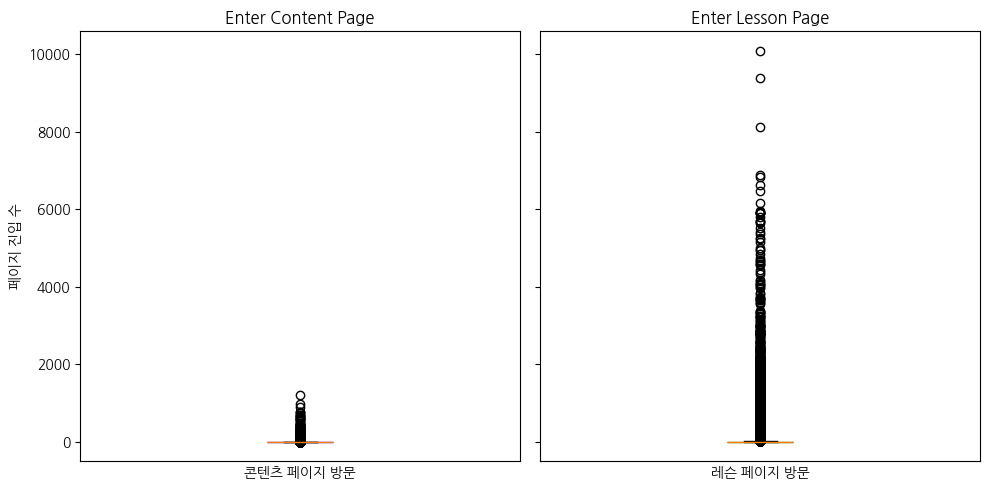

In [ ]:
# Figure와 서브플롯 생성
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

# 각 서브플롯에 박스플롯 그리기
axes[0].boxplot(final_df['enter_content_page'], patch_artist=True, boxprops=dict(facecolor='blue', color='blue'))
axes[0].set_title('Enter Content Page')
axes[0].set_ylabel('페이지 진입 수')
axes[0].set_xlabel('콘텐츠 페이지 진입')
axes[0].set_xticks([])

axes[1].boxplot(final_df['enter_lesson_page'], patch_artist=True, boxprops=dict(facecolor='green', color='green'))
axes[1].set_title('Enter Lesson Page')
axes[1].set_xlabel('레슨 페이지 진입')
axes[1].set_xticks([])


# 레이아웃 조정 및 그래프 표시
plt.tight_layout()
plt.show()

- 데이터에 수치형 변수(enter.content_page, enter.lesson_page)에서 0값이 지나치게 많이 존재하여 데이터의 편향이 존재한다고 판단

- 해당 편향 현상의 완화를 위해서 두 수치형 변수의 값이 0인 데이터의 50%를 제거 + 3IQR을 활용하는 방식으로 이상치 처리

In [ ]:
# A와 B 컬럼이 모두 0인 행 필터링
condition = (final_df['enter_content_page'] == 0) & (final_df['enter_lesson_page'] == 0)

# 해당 조건을 만족하는 행들의 인덱스 중 50%를 무작위로 선택
indices_to_remove = final_df[condition].sample(frac=0.5, random_state=42).index

# 선택된 행 제거
preprocessed_df = final_df.drop(index=indices_to_remove)

In [ ]:
preprocessed_df.describe()

,complete_subscription,enter_content_page,enter_lesson_page,click_content_page_more_review_button,start_free_trial
count,120633.000000,120633.000000,120633.000000,120633.000000,120633.000000
mean,0.086046,2.499183,27.375121,0.011000,0.117721
std,0.280433,14.941447,176.689271,0.104304,0.322278
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,7.000000,0.000000,0.000000
max,1.000000,1219.000000,10090.000000,1.000000,1.000000


In [ ]:
# 이상치 제거
cols = ['enter_content_page','enter_lesson_page']

def remove_out(dataframe, remove_col):
    for col in remove_col:
        q1 = dataframe[col].quantile(0.25)
        q3 = dataframe[col].quantile(0.75)
        iqr = q3-q1
        dataframe = dataframe[(dataframe[col] >= (q1 - (3*iqr)))&(dataframe[col] <= (q3 + (3*iqr)))]
    return dataframe

preprocessed_df = remove_out(preprocessed_df,cols)

In [ ]:
# 이상치 처리 끝난 df
preprocessed_df

,complete_subscription,enter_content_page,enter_lesson_page,click_content_page_more_review_button,start_free_trial
user_id,,,,,
e3b8bfa80d866f296aad139e09023ef3,0,1,2,0,0
b90215a242d2b564d8be13193e6aa09e,0,0,1,0,0
43264caf4d797e1c485a8b1f588dc5ce,0,0,1,0,0
3ca6bdf9a279c5a05c2f1f7452a6b731,0,3,18,0,0
eb75bdef427fafaf336fd4e4996af277,0,0,0,0,0
...,...,...,...,...,...
58e55680484ceae19179d7bb3e35f73b,0,0,0,0,0
0117038cc69fe8a40388ec19bb0a495e,0,0,1,0,0
bc1a28ff902daba9399e7f602cc86285,0,3,2,0,0


In [ ]:
# 전처리된 데이터 기술통계분석
preprocessed_df.describe()

,complete_subscription,enter_content_page,enter_lesson_page,click_content_page_more_review_button,start_free_trial
count,100132.000000,100132.000000,100132.000000,100132.000000,100132.000000
mean,0.062537,0.498382,2.756661,0.003585,0.088263
std,0.242130,0.949645,4.124166,0.059770,0.283679
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,3.000000,0.000000,0.000000
max,1.000000,4.000000,20.000000,1.000000,1.000000


#### 2) 상관관계 확인

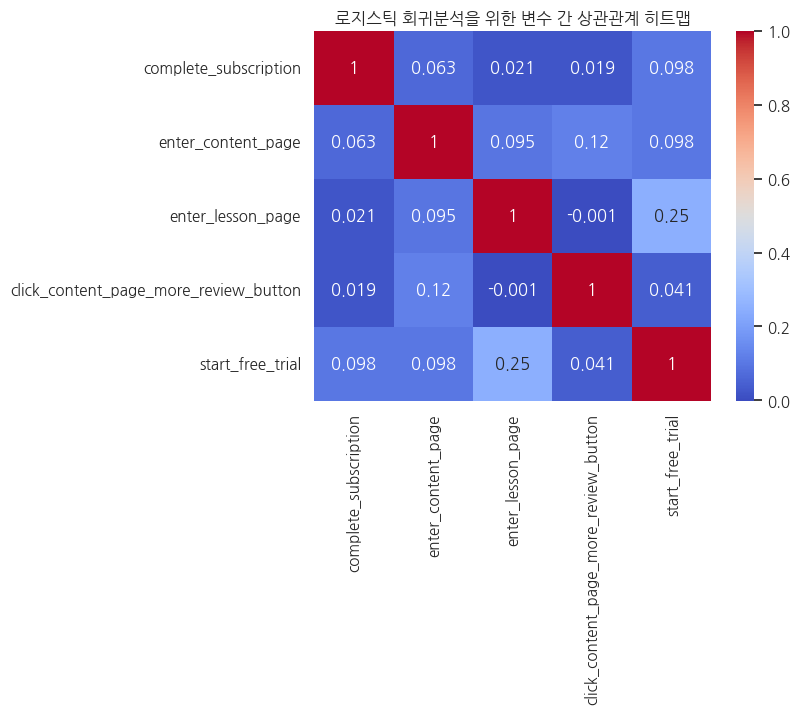

In [ ]:
# 상관관계 확인
sns.set_theme(style='darkgrid', font='Nanum Gothic')
sns.heatmap(preprocessed_df.select_dtypes('number').corr(), cmap='coolwarm', annot=True)
plt.title('로지스틱 회귀분석을 위한 변수 간 상관관계 히트맵')


plt.show()

- 상관관계가 높게 나오는 변수들이 존재한다.

- 따라서 VIF 계수를 확인하여 실제로 다중공산성이 존재하는지 확인한다.

#### 3) VIF 계수 확인

In [ ]:
# VIF 계수 확인
# 상수항 추가 (필수)
X = add_constant(preprocessed_df.select_dtypes('number'))

# VIF 계산
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# 결과 출력
print(vif_data)

                                 Feature       VIF
0                                  const  1.717144
1                  complete_subscription  1.012773
2                     enter_content_page  1.032513
3                      enter_lesson_page  1.072430
4  click_content_page_more_review_button  1.016072
5                       start_free_trial  1.082823


> #### VIF 계수가 10이 넘는 변수가 없으므로 다중공산성 미존재한다고 판단

#### 4) 표준화 진행

In [ ]:
# 표준화 위해 연속형 변수들만 선별 
tmp_df = preprocessed_df[['enter_content_page', 'enter_lesson_page']]
tmp_df.head(3)

,enter_content_page,enter_lesson_page
user_id,,
e3b8bfa80d866f296aad139e09023ef3,1,2
b90215a242d2b564d8be13193e6aa09e,0,1
43264caf4d797e1c485a8b1f588dc5ce,0,1


In [ ]:
# StandardScaler 초기화
scaler = StandardScaler()

# 표준화 수행
standardized_data = scaler.fit_transform(tmp_df)

# 표준화된 데이터를 데이터프레임으로 변환
standardized_df = pd.DataFrame(standardized_data, columns=tmp_df.columns)

In [ ]:
# 결과 출력
standardized_df

,enter_content_page,enter_lesson_page
0,0.528219,-0.183471
1,-0.524811,-0.425945
2,-0.524811,-0.425945
3,2.634279,3.696120
4,-0.524811,-0.668420
...,...,...
100127,-0.524811,-0.668420
100128,-0.524811,-0.425945
100129,2.634279,-0.183471
100130,0.528219,-0.668420


In [ ]:
# 표준화된 연속형 변수들 테이블에 user_id 인덱스 삽입
standardized_df.index = tmp_df.index

In [ ]:
standardized_df

,enter_content_page,enter_lesson_page
user_id,,
e3b8bfa80d866f296aad139e09023ef3,0.528219,-0.183471
b90215a242d2b564d8be13193e6aa09e,-0.524811,-0.425945
43264caf4d797e1c485a8b1f588dc5ce,-0.524811,-0.425945
3ca6bdf9a279c5a05c2f1f7452a6b731,2.634279,3.696120
eb75bdef427fafaf336fd4e4996af277,-0.524811,-0.668420
...,...,...
58e55680484ceae19179d7bb3e35f73b,-0.524811,-0.668420
0117038cc69fe8a40388ec19bb0a495e,-0.524811,-0.425945
bc1a28ff902daba9399e7f602cc86285,2.634279,-0.183471


In [ ]:
# start_free_trial 이벤트 컬럼 merge
final_reg_df = pd.merge(standardized_df.reset_index(), preprocessed_df[['start_free_trial']].reset_index(), how='inner', on='user_id')
final_reg_df

,user_id,enter_content_page,enter_lesson_page,start_free_trial
0,e3b8bfa80d866f296aad139e09023ef3,0.528219,-0.183471,0
1,b90215a242d2b564d8be13193e6aa09e,-0.524811,-0.425945,0
2,43264caf4d797e1c485a8b1f588dc5ce,-0.524811,-0.425945,0
3,3ca6bdf9a279c5a05c2f1f7452a6b731,2.634279,3.696120,0
4,eb75bdef427fafaf336fd4e4996af277,-0.524811,-0.668420,0
...,...,...,...,...
100127,58e55680484ceae19179d7bb3e35f73b,-0.524811,-0.668420,0
100128,0117038cc69fe8a40388ec19bb0a495e,-0.524811,-0.425945,0
100129,bc1a28ff902daba9399e7f602cc86285,2.634279,-0.183471,0
100130,298e200203472e5bc0f9a14053e1dfe1,0.528219,-0.668420,0


In [ ]:
# click_content_page_more_review_button 이벤트 컬럼 merge
final_reg_df = pd.merge(final_reg_df.reset_index(drop=True), preprocessed_df[['click_content_page_more_review_button']].reset_index(), how='inner', on='user_id')
final_reg_df

,user_id,enter_content_page,enter_lesson_page,start_free_trial,click_content_page_more_review_button
0,e3b8bfa80d866f296aad139e09023ef3,0.528219,-0.183471,0,0
1,b90215a242d2b564d8be13193e6aa09e,-0.524811,-0.425945,0,0
2,43264caf4d797e1c485a8b1f588dc5ce,-0.524811,-0.425945,0,0
3,3ca6bdf9a279c5a05c2f1f7452a6b731,2.634279,3.696120,0,0
4,eb75bdef427fafaf336fd4e4996af277,-0.524811,-0.668420,0,0
...,...,...,...,...,...
100127,58e55680484ceae19179d7bb3e35f73b,-0.524811,-0.668420,0,0
100128,0117038cc69fe8a40388ec19bb0a495e,-0.524811,-0.425945,0,0
100129,bc1a28ff902daba9399e7f602cc86285,2.634279,-0.183471,0,0
100130,298e200203472e5bc0f9a14053e1dfe1,0.528219,-0.668420,0,0


In [ ]:
# 종속변수 이벤트 컬럼(complete_subscription) merge
final_reg_df = pd.merge(final_reg_df, preprocessed_df[['complete_subscription']].reset_index(), how='inner', on='user_id')
final_reg_df

,user_id,enter_content_page,enter_lesson_page,start_free_trial,click_content_page_more_review_button,complete_subscription
0,e3b8bfa80d866f296aad139e09023ef3,0.528219,-0.183471,0,0,0
1,b90215a242d2b564d8be13193e6aa09e,-0.524811,-0.425945,0,0,0
2,43264caf4d797e1c485a8b1f588dc5ce,-0.524811,-0.425945,0,0,0
3,3ca6bdf9a279c5a05c2f1f7452a6b731,2.634279,3.696120,0,0,0
4,eb75bdef427fafaf336fd4e4996af277,-0.524811,-0.668420,0,0,0
...,...,...,...,...,...,...
100127,58e55680484ceae19179d7bb3e35f73b,-0.524811,-0.668420,0,0,0
100128,0117038cc69fe8a40388ec19bb0a495e,-0.524811,-0.425945,0,0,0
100129,bc1a28ff902daba9399e7f602cc86285,2.634279,-0.183471,0,0,0
100130,298e200203472e5bc0f9a14053e1dfe1,0.528219,-0.668420,0,0,0


### 로지스틱 회귀분석 진행

In [ ]:
# 독립변수(X)와 종속변수(y) 분리
X = final_reg_df[['enter_content_page', 'enter_lesson_page','click_content_page_more_review_button','start_free_trial']]
X = sm.add_constant(X)  # 상수항 추가 (회귀분석에서 intercept를 포함)
y = final_reg_df['complete_subscription']

# statsmodels 로지스틱 회귀모델 생성
model = sm.Logit(y, X)

# 모델 학습
result = model.fit()

# 결과 출력
summary = result.summary2()  # 더 깔끔한 결과 요약
print(summary)

Optimization terminated successfully.
         Current function value: 0.228850
         Iterations 7
                                    Results: Logit
Model:                    Logit                      Method:                MLE        
Dependent Variable:       complete_subscription      Pseudo R-squared:      0.022      
Date:                     2025-01-20 16:28           AIC:                   45840.4891 
No. Observations:         100132                     BIC:                   45888.0603 
Df Model:                 4                          Log-Likelihood:        -22915.    
Df Residuals:             100127                     LL-Null:               -23420.    
Converged:                1.0000                     LLR p-value:           2.5898e-217
No. Iterations:           7.0000                     Scale:                 1.0000     
---------------------------------------------------------------------------------------
                                       Coef.  Std.Err. 

In [ ]:
# 회귀계수에서 오즈비 계산
odds_ratios = np.exp(result.params)

# 오즈비 출력
odds_ratios_df = pd.DataFrame({
    'Feature': X.columns,
    'Odds Ratio': odds_ratios
})

print(odds_ratios_df)

                                                                     Feature  \
const                                                                  const   
enter_content_page                                        enter_content_page   
enter_lesson_page                                          enter_lesson_page   
click_content_page_more_review_button  click_content_page_more_review_button   
start_free_trial                                            start_free_trial   

                                       Odds Ratio  
const                                    0.057600  
enter_content_page                       1.200394  
enter_lesson_page                        0.971302  
click_content_page_more_review_button    1.356510  
start_free_trial                         2.640451  


- 회귀분석 결과 시각화

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


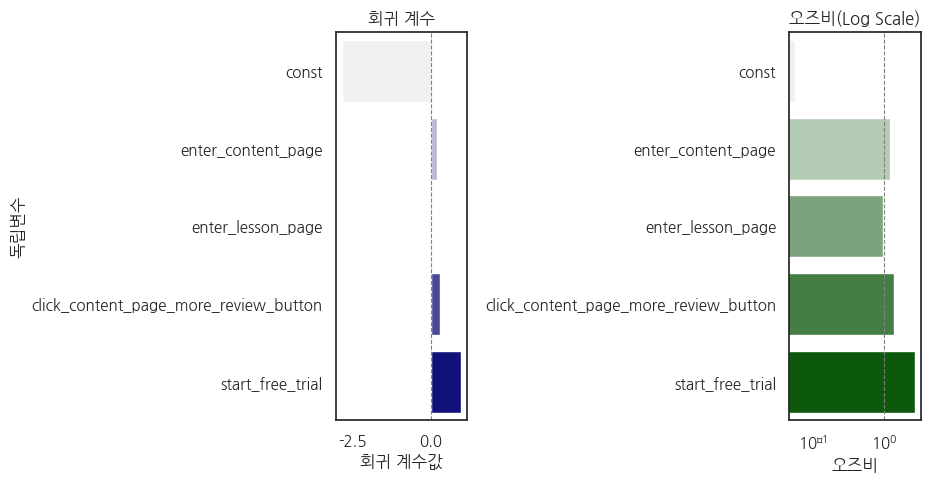

In [ ]:
# 결과 추출
coefficients = result.params  # 회귀계수
p_values = result.pvalues      # p-value
odds_ratios = np.exp(coefficients)  # 오즈비


# 시각화 준비를 위한 데이터프레임 생성
summary_df = pd.DataFrame({
    'Variable': coefficients.index,
    'Coefficient': coefficients.values,
    'Odds Ratio': odds_ratios.values,
})


color_palette1 = sns.light_palette("darkblue", n_colors=len(summary_df), reverse=False)
color_palette2 = sns.light_palette("darkgreen", n_colors=len(summary_df), reverse=False)


# 시각화
plt.figure(figsize=(14, 5))
sns.set_theme(style='white', font='Nanum Gothic')

# 1. 회귀계수 시각화
plt.subplot(1, 3, 1)
sns.barplot(data=summary_df, x='Coefficient', y='Variable', palette=color_palette1)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)
plt.title('회귀 계수')
plt.xlabel('회귀 계수값')
plt.ylabel('독립변수')

# 2. 오즈비 시각화
plt.subplot(1, 3, 2)
sns.barplot(data=summary_df, x='Odds Ratio', y='Variable', palette=color_palette2)
plt.axvline(1, color='gray', linestyle='--', linewidth=0.8)
plt.title('오즈비(Log Scale)')
plt.xlabel('오즈비')
plt.xscale('log')
plt.ylabel('')

plt.tight_layout()
plt.show()

#### 결과 해석

> [변수별 해석]
>
> - 콘텐츠 페이지 진입 횟수(enter_content_page)
>     - p-value가 0.05보다 작아 통계적으로 유의미하다.
>     - 오즈비가 약 `1.2`로, 레슨 페이지를 1개 더 진입할 때마다 첫 결제 완료 확률이 `4.5%p 증가`한다.  
>
> - 레슨 페이지 진입 횟수(enter_lesson_page)
>     - p-value가 0.05보다 작아 통계적으로 유의미하다.
>     - 오즈비가 약 `0.97`로, 레슨 페이지를 1개 더 진입할 때마다 첫 결제 완료 확률이 `0.8%p 감소`한다.
> 
> - 콘텐츠 페이지 리뷰 버튼 클릭 여부(click_content_page_more_review_button)
>     - p-value가 0.05보다 근소한 차이로 크다.
>     - 오즈비가 약 `1.36`로, 레슨 페이지를 1개 더 진입할 때마다 첫 결제 완료 확률이 `7.6%p 증가`한다.
>     - 직관적으로 생각했을 때, 해당 버튼이 유의미하게 해석될 여지가 있으므로 카이제곱 검점을 통해서 추가 검증을 실시한다.
> 
> - 무료 체험 여부(start_free_trial)
>     - p-value가 0.05보다 작아 통계적으로 유의미하다.
>     - 오즈비가 약 `2.64`로, 레슨 페이지를 1개 더 진입할 때마다 첫 결제 완료 확률이 `약 22.5%p 증가`한다. 
> 
> [설명력]
> - 해당 로지스틱 회귀 분석의 설명력이 `약 2.2%` 정도이므로, 각 변수에 관해서 T검정/카이제곱 검정을 해본다.

### T검정 / 카이제곱 검정(추가 분석)

- enter_content_page
- enter_lesson_page
- click_content_page_more_review_button
- start_free_trial

#### 1) 콘텐츠 페이지 진입

In [ ]:
# 표준화 전 데이터프레임
preprocessed_df

,complete_subscription,enter_content_page,enter_lesson_page,click_content_page_more_review_button,start_free_trial
user_id,,,,,
e3b8bfa80d866f296aad139e09023ef3,0,1,2,0,0
b90215a242d2b564d8be13193e6aa09e,0,0,1,0,0
43264caf4d797e1c485a8b1f588dc5ce,0,0,1,0,0
3ca6bdf9a279c5a05c2f1f7452a6b731,0,3,18,0,0
eb75bdef427fafaf336fd4e4996af277,0,0,0,0,0
...,...,...,...,...,...
58e55680484ceae19179d7bb3e35f73b,0,0,0,0,0
0117038cc69fe8a40388ec19bb0a495e,0,0,1,0,0
bc1a28ff902daba9399e7f602cc86285,0,3,2,0,0


In [ ]:
# 그룹 분리
group1 = preprocessed_df[preprocessed_df['complete_subscription'] == 1] # 구독한 유저
group2 = preprocessed_df[preprocessed_df['complete_subscription'] == 0] # 구독안한 유저

# 그룹별 데이터 수 확인
print(len(group1))
print(len(group2))

6262
93870


- 등분산, 이분산 판별 위해 F검정부터 실시

In [ ]:
# 두 집단의 분산이 동일한지 비교하는 F-검정
f_stat, p_value = stats.levene(group1['enter_content_page'], group2['enter_content_page'])

# 결과 출력
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

# P-value 해석
if p_value < 0.05:
    print("두 그룹의 분산에 통계적으로 유의미한 차이가 있습니다.")
else:
    print("두 그룹의 분산에 통계적으로 유의미한 차이가 없습니다.")

F-statistic: 398.2402250716487
P-value: 1.9787591802946261e-88
두 그룹의 분산에 통계적으로 유의미한 차이가 있습니다.


- 이분산이므로 스튜던트의 T검정 실시

In [ ]:
# 독립 표본 T-검정 (이분산 가정)
t_stat, p_value = stats.ttest_ind(group1['enter_content_page'], group2['enter_content_page'], equal_var=False)

# 결과 출력
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

# 유의성 판단
alpha = 0.05  # 유의 수준 설정
if p_value < alpha:
    print("귀무가설을 기각합니다. 두 그룹의 평균에 차이가 있습니다.")
else:
    print("귀무가설을 채택합니다. 두 그룹의 평균에 차이가 없습니다.")

T-Statistic: 16.70001466511794
P-Value: 2.139145120410128e-61
귀무가설을 기각합니다. 두 그룹의 평균에 차이가 있습니다.


#### 2) 레슨 페이지 진입

In [ ]:
# 그룹 분리
group1 = preprocessed_df[preprocessed_df['complete_subscription'] == 1] # 구독한 유저
group2 = preprocessed_df[preprocessed_df['complete_subscription'] == 0] # 구독안한 유저

# 그룹별 데이터 수 확인
print(len(group1))
print(len(group2))

6262
93870


- 등분산, 이분산 판별 위해 F검정부터 실시

In [ ]:
# 두 집단의 분산이 동일한지 비교하는 F-검정
f_stat, p_value = stats.levene(group1['enter_lesson_page'], group2['enter_lesson_page'])

# 결과 출력
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

# P-value 해석
if p_value < 0.05:
    print("두 그룹의 분산에 통계적으로 유의미한 차이가 있습니다.")
else:
    print("두 그룹의 분산에 통계적으로 유의미한 차이가 없습니다.")

F-statistic: 153.74850018800254
P-value: 2.7901638787441873e-35
두 그룹의 분산에 통계적으로 유의미한 차이가 있습니다.


- 이분산이므로 스튜던트의 T검정 실시

In [ ]:
# 독립 표본 T-검정 (이분산 가정)
t_stat, p_value = stats.ttest_ind(group1['enter_lesson_page'], group2['enter_lesson_page'], equal_var=False)

# 결과 출력
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

# 유의성 판단
alpha = 0.05  # 유의 수준 설정
if p_value < alpha:
    print("귀무가설을 기각합니다. 두 그룹의 평균에 차이가 있습니다.")
else:
    print("귀무가설을 채택합니다. 두 그룹의 평균에 차이가 없습니다.")

T-Statistic: 5.666472625602419
P-Value: 1.51679472686777e-08
귀무가설을 기각합니다. 두 그룹의 평균에 차이가 있습니다.


#### 3) 콘텐츠 후기 더보기 버튼 클릭 여부

In [ ]:
# 교차표 생성
contingency_table = pd.crosstab(preprocessed_df['click_content_page_more_review_button'], preprocessed_df['complete_subscription'])
print("Contingency Table:")
print(contingency_table)

Contingency Table:
complete_subscription                      0     1
click_content_page_more_review_button             
0                                      93561  6212
1                                        309    50


In [ ]:
# 카이제곱 검정 실행
chi2, p, dof, expected = chi2_contingency(contingency_table)

# 결과 출력
print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"P-Value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

# 유의성 판단
if p < alpha:
    print("귀무가설을 기각합니다. 후기 버튼 클릭 여부와 구독 완료는 독립이 아닙니다.")
else:
    print("귀무가설을 채택합니다. 후기 버튼 클릭 여부와 구독 완료는 독립입니다.")

Chi-Square Statistic: 34.8880
P-Value: 0.0000
Degrees of Freedom: 1
Expected Frequencies:
[[9.35334509e+04 6.23954906e+03]
 [3.36549055e+02 2.24509448e+01]]
귀무가설을 기각합니다. 후기 버튼 클릭 여부와 구독 완료는 독립이 아닙니다.


#### 4) 무료 체험 여부

In [ ]:
# 교차표 생성
contingency_table = pd.crosstab(preprocessed_df['start_free_trial'], preprocessed_df['complete_subscription'])
print("Contingency Table:")
print(contingency_table)

Contingency Table:
complete_subscription      0     1
start_free_trial                  
0                      86259  5035
1                       7611  1227


In [ ]:
# 카이제곱 검정 실행
chi2, p, dof, expected = chi2_contingency(contingency_table)

# 결과 출력
print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"P-Value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

# 유의성 판단
if p < alpha:
    print("귀무가설을 기각합니다. 무료 체험 여부와 구독 완료는 독립이 아닙니다.")
else:
    print("귀무가설을 채택합니다. 무료 체험 여부와 구독 완료는 독립입니다.")

Chi-Square Statistic: 961.0298
P-Value: 0.0000
Degrees of Freedom: 1
Expected Frequencies:
[[85584.7059881  5709.2940119]
 [ 8285.2940119   552.7059881]]
귀무가설을 기각합니다. 무료 체험 여부와 구독 완료는 독립이 아닙니다.


> ### 결론
> - 콘텐츠 페이지 진입 횟수(enter_contet_page) : T검정 결과 각 변수별로 집단 간 유의미한 차이가 존재하므로 회귀분석 결과 지지
>
> - 레슨 페이지 진입 횟수(click_lesson_page_related_question_box) : T검정 결과 각 변수별로 집단 간 유의미한 차이가 존재하므로 회귀분석 결과 지지
>
> - 후기 더보기 버튼 클릭 여부(click_content_page_more_review_button) : 카이제곱 검정 결과 후기 더보기 버튼 클릭 여부와 구독 완료 여부는 독립적이지 않으며, 후기 더보기 버튼 클릭 여부가 구독 완료 여부와 관련이 있다. 따라서 회귀분석 결과 지지
>
> - 무료체험 여부(start_free_trial) : 카이제곱 검정 결과 무료 체험 여부와 구독 완료 여부는 독립적이지 않으며, 무료 체험 여부가 구독 완료 여부와 관련이 있다. 따라서 회귀분석 결과 지지

---

## 7. 결론

### 가설 검증 결과 요약
- 로지스틱 회귀분석 결과 총 4개의 가설 중 4개의 가설이 채택되었다.
    - 콘텐츠 후기 더보기 버튼 클릭 여부는 p-value가 0.0528로 0.05보다 근소한 차이로 가설이 기각되었다.
    - 콘텐츠 후기 더보기 버튼 클릭 여부는 직관적으로 생각했을 때 유의미하게 해석될 여지가 있으므로, 카이제곱 검정을 추가적으로 실시하여 추가 검증을 완료했다.

- 낮은 설명력을 보완하기 위해 각 변수 별로 T검정 혹은 카이제곱 검정으로 추가 검증을 실시하였다.

| 가설                          | 가설 검증 결과 | 오즈비  | 해석                            |
|-------------------------------|----------------|---------|---------------------------------|
| `콘텐츠 페이지 진입 횟수`가 첫 유료 구독 여부에 영향을 끼쳤을 것이다.              | O(채택)        | 1.2     | 첫 유료 구독 확률 4.5%p 증가           |
| `레슨 페이지 진입 횟수`가 첫 유료 구독 여부에 영향을 끼쳤을 것이다.                | O(채택)        | 0.97    | 첫 유료 구독 확률 0.8%p 감소 = 영향 거의 없다.           |
| `콘텐츠 후기 더보기 버튼 클릭 여부`가 첫 유료 구독 여부에 영향을 끼쳤을 것이다.         | O(채택)        | 1.36    | 첫 유료 구독 확률 약 7.6%p 증가        |
| `무료체험 여부`가 첫 유료 구독 여부에 영향을 끼쳤을 것이다.               | O(채택)        | 2.64    | 첫 유료 구독 확률 약 22.6%p 증가      |

### 채택된 가설 기반 문제 해결 인사이트 아이디에이션

1. 콘텐츠 페이지 진입 횟수가 증가함에 따라 첫 결제 확률이 4.5%p씩 증가
    - 마케팅 : 사용자들이 주로 많이 확인하는 콘텐츠(스테디셀러)를 마케팅 용도로 활용하자.
    - UX/UI : 비구독자인 경우에는 로그인 후 바로 수강 대시보드 페이지로 연결하지 말고 강의 콘텐츠를 노출하자. (현재 무제한 강의 페이지)
    - CRM : 비구독자에게 정기적으로 콘텐츠 추천 이메일을 발송하자.(회원가입한 유저에 한해서)
    - CRM : 하나의 무료 공개 콘텐츠를 완강하면 다른 콘텐츠를 추천하는 메시지 전달(이메일, 카톡, 문자 등)

2. 콘텐츠 후기 더보기 버튼을 클릭하면 첫 결제 확률이 약 7.6%p 증가
    - UI A/B 테스트 : A안은 기존, B안은 기존 4개 선공개 후기 중 하단 2개의 후기 블러처리 후 `더 많은 후기 보러가기` 버튼을 그 위에 올려 궁금증 유발, 클릭 유도
    - CRM : 상세 페이지 확인했던 콘텐츠에 대한 후기를 이메일로 발송

3. 무료체험을 경험하면 첫 결제 확률이 약 22.6%p 증가한다.
    - 이전에 A타입(무료 강의 제공), B타입(무료 체험 기간 제공) 2가지 버전으로 무료체험 진행
    - 이전 실적은 A타입 초기에 무료 체험자가 크게 증가했다가 감소, 이후 B타입으로 개편 후 소폭 증가했다가 무료체험 폐기
    - 어떤 타입이 첫 결제 전환에 더 긍정적인 요인으로 작용했는지 추가 분석
        - 해당 타입으로 무료체험 재개 제안
        - 만약 기간 단위의 무료체험이 더 긍정적인 요인으로 작용했다면 기존 1개월, 12개월이 아닌 축소된 기간+축소된 강의로 제안(서비스 특성상 무료체험 기간에 원하는 강의를 모두 들을 가능성 존재)

### 추가 분석 아이디어
- 첫 결제 완료에 더 긍정적인 영향을 끼치는 무료체험 타입 파악

- 콘텐츠 확인을 유도하기 위한 콘텐츠 선별(스테디셀러)

- 각 인사이트별 실질적인 해결 방안 도출을 위한 UX/UI 분석

> ### 이후 변수별로 회귀분석 결과에 대해 교차검증하고, 해결 인사이트를 도출하기 위한 자세한 분석을 실시한다.

---
---

---
---

# 콘텐츠 페이지 진입 상세 분석

**[목차]**
1. 개요

2. 기본 환경 세팅

3. 데이터 준비

4. 데이터 분석
    - 분석 1. 콘텐츠 페이지 진입 여부에 따른 구독 전환 비율
    - 분석 2. 콘텐츠 페이지 진입 횟수에 따른 전체 유저 대비 구독 전환 유저가 차지하는 비율 변화
    - 분석 3. 전체 회원가입 유저와 구독 전환 유저들이 진입한 콘텐츠 TOP10 비교 분석

---
---

## 1. 개요

- 배경: 로지스틱 회귀분석의 결과로, `콘텐츠 페이지 진입 횟수`가 첫 구독 전환에 긍정적인 영향을 준다는 것을 확인했다. 해당 결과에 대한 추가 근거를 도출하고, 첫 구독 전환 저조 문제를 해당 변수로 해결할 수 있는 인사이트를 도출하고자 `콘텐츠 페이지 진입`이벤트에 대한 추가 분석을 진행한다.

- 목적 : 로지스틱 회귀분석의 결과에 대한 추가 근거를 도출하고, `첫 유료 구독 전환 저조 문제`를 해결하기 위해 콘텐츠 페이지 진입 횟수와 관련하여 도출할 수 있는 인사이트를 발굴하고자 함

---

## 2. 기본 환경 세팅

### 라이브러리 호출

In [ ]:
# 라이브러리 호출
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import norm
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import chi2_contingency
from statsmodels.stats.proportion import proportions_ztest


# 한글 폰트 설정하기
import matplotlib.pyplot as plt
plt.rc('font', family='Nanum Gothic')
plt.rcParams['axes.unicode_minus'] =False

# Warnings 제거
import warnings
warnings.filterwarnings('ignore')

---

## 3. 데이터 준비

### 데이터 불러오기

- 신규가입자별 회귀분석 변수 데이터 테이블 호출

- 모수에 해당하는 user_id

In [ ]:
# 회귀분석에 사용된 테이블 호출
reg_df = pd.read_csv('./date_filtered_reg_df.csv')
reg_df.head(3)

,user_id,complete_subscription,enter_content_page,enter_lesson_page,click_content_page_more_review_button,start_free_trial
0,74d17c27a41656e7788b0c81d9f76cda,0,0,0,0,0
1,06b6868000a5d576180aca47896d6cce,0,0,41,0,1
2,e131c319972bd580146c5a2faba26613,0,22,160,0,0


In [ ]:
# 데이터 크기 확인
reg_df.shape

(145133, 6)

- 콘텐츠 페이지 진입 이벤트 테이블 : 이전 과정에서 전처리 완료된 테이블 호출

In [ ]:
# 콘텐츠 페이지 진입 테이블 호출
enter_content_page_df = pd.read_csv('enter_content_page_df.csv')
enter_content_page_df.head(3)

,Unnamed: 0,city,client_event_time,date_year_month,country,device_family,device_type,pc_mo,event_type,language,os_name,os_version,platform,user_id,content.id,event_count
0,0,Seoul,2023-04-05 21:40:35.740,2023-04,South Korea,Apple iPhone,Apple iPhone,MO,enter.content_page,Korean,Chrome,108.0.5359.112,Web,d57aba7b4527e71b96135deaaec57def,220ce7873b8895d0c81c37600b5bd1e7,1
1,1,Hwaseong-si,2023-04-05 21:01:59.950,2023-04,South Korea,Samsung Galaxy Note,Samsung Galaxy Note10+ 5G,MO,enter.content_page,Korean,Chrome,111.0.0.0,Web,guest,ecde9a1b01763f791c3a185d53b5f394,1
2,2,Daejeon,2023-04-05 21:13:12.038,2023-04,South Korea,Windows,Windows,PC,enter.content_page,Korean,Edge,111.0.1661.62,Web,41362ad5ebcade2bb1b78344a53e7ccf,b8d4ec0133e5ce485055bfd69cd28abd,1


In [ ]:
# Unnamed: 0 컬럼 제거
enter_content_page_df = enter_content_page_df.iloc[:,1:]
enter_content_page_df.head(3)

,city,client_event_time,date_year_month,country,device_family,device_type,pc_mo,event_type,language,os_name,os_version,platform,user_id,content.id,event_count
0,Seoul,2023-04-05 21:40:35.740,2023-04,South Korea,Apple iPhone,Apple iPhone,MO,enter.content_page,Korean,Chrome,108.0.5359.112,Web,d57aba7b4527e71b96135deaaec57def,220ce7873b8895d0c81c37600b5bd1e7,1
1,Hwaseong-si,2023-04-05 21:01:59.950,2023-04,South Korea,Samsung Galaxy Note,Samsung Galaxy Note10+ 5G,MO,enter.content_page,Korean,Chrome,111.0.0.0,Web,guest,ecde9a1b01763f791c3a185d53b5f394,1
2,Daejeon,2023-04-05 21:13:12.038,2023-04,South Korea,Windows,Windows,PC,enter.content_page,Korean,Edge,111.0.1661.62,Web,41362ad5ebcade2bb1b78344a53e7ccf,b8d4ec0133e5ce485055bfd69cd28abd,1


In [ ]:
enter_content_page_df.shape

(1914107, 15)

- 첫 유료 구독 완료 테이블

In [ ]:
# 첫 유료 구독 완료 테이블 호출
complete_subscription_df = pd.read_csv('./complete_subscription_df.csv')
complete_subscription_df.head(3)

,Unnamed: 0,city,client_event_time,date_year_month,country,device_family,device_type,pc_mo,event_type,language,os_name,os_version,platform,user_id,plan.price,paid_amount,coupon.discount_amount,coupon.discount_rate,pg.type,event_count
0,9399,Seoul,2022-01-01 06:17:24.513,2022-01,South Korea,Apple iPhone,Apple iPhone,MO,complete.subscription,Korean,Mobile Safari,15,Web,c2fd9e1a9d094f563d6ca7a6caa538be,42960,42960,0,0.0,etc,1
1,6914,Bucheon-si,2022-01-02 08:34:14.270,2022-01,South Korea,Windows,Windows,PC,complete.subscription,Korean,Edge,96,Web,8eabe35d59b6596f27552a4c71a279c1,15920,15920,0,0.0,etc,1
2,5757,Dongjak-gu,2022-01-02 15:23:04.269,2022-01,South Korea,Windows,Windows,PC,complete.subscription,Korean,Chrome,96,Web,97c0a306a466b44643469ebf1d4b57e3,42960,42960,0,0.0,etc,1


In [ ]:
complete_subscription_df.shape

(13881, 20)

- 모수 user_id 테이블 생성 : 2022년 ~ 2023년 회원가입 유저

In [ ]:
# 모수 user_id 테이블 생성
pop_df = reg_df[['user_id']]
pop_df.head(3)

,user_id
0,74d17c27a41656e7788b0c81d9f76cda
1,06b6868000a5d576180aca47896d6cce
2,e131c319972bd580146c5a2faba26613


In [ ]:
pop_df.shape

(145133, 1)

---

## 4. 데이터 분석

- reg_df(회귀분석에 사용한 데이터 테이블)를 기반으로 가공했으므로, 첫 유료 구독 완료 유저의 경우, 첫 유료 구독 이전의 이벤트만 포함됨

In [ ]:
reg_df.head(3)

,user_id,complete_subscription,enter_content_page,enter_lesson_page,click_content_page_more_review_button,start_free_trial
0,74d17c27a41656e7788b0c81d9f76cda,0,0,0,0,0
1,06b6868000a5d576180aca47896d6cce,0,0,41,0,1
2,e131c319972bd580146c5a2faba26613,0,22,160,0,0


### 분석 1. 콘텐츠 페이지 진입 여부에 따른 구독 전환 비율

#### 분석 진행

In [ ]:
# 비율 계산을 위한 컬럼만 남긴 임시 테이블 생성
tmp_df = reg_df[['user_id','complete_subscription','enter_content_page']]
tmp_df.head(3)

,user_id,complete_subscription,enter_content_page
0,74d17c27a41656e7788b0c81d9f76cda,0,0
1,06b6868000a5d576180aca47896d6cce,0,0
2,e131c319972bd580146c5a2faba26613,0,22


- 콘텐츠 페이지 미진입 유저의 구독 전환 비율

In [ ]:
# 콘텐츠 페이지 미진입 유저의 구독 전환 비율
not_enter_df = tmp_df[tmp_df['enter_content_page']==0].groupby('complete_subscription').count()[['enter_content_page']].reset_index()

# 비율 컬럼 추가
not_enter_df['ratio'] = round(((not_enter_df['enter_content_page'] / not_enter_df['enter_content_page'].sum())*100),2)

# complete_subscription 컬럼값 매핑
not_enter_df['complete_subscription'] = not_enter_df['complete_subscription'].apply(lambda x: '구독X' if x==0 else '구독O')

not_enter_df

,complete_subscription,enter_content_page,ratio
0,구독X,93689,93.57
1,구독O,6438,6.43


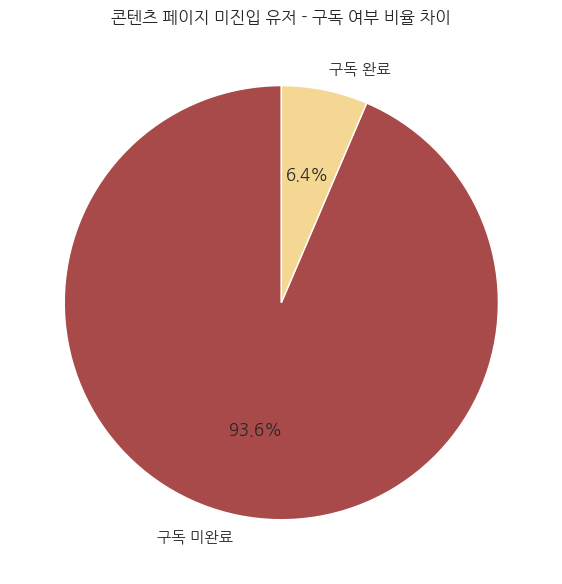

In [ ]:
# 그래프 그리기
plt.pie(
    list(not_enter_df['ratio'].values),
    labels = ['구독 미완료', '구독 완료'], autopct='%1.1f%%', startangle=90,
    colors = ['#A94A4A', '#F4D793']
)

plt.title('콘텐츠 페이지 미진입 유저 - 구독 여부 비율 차이')
sns.despine()

plt.tight_layout()
plt.show()

In [ ]:
# 콘텐츠 페이지 진입 유저의 구독 전환 비율
enter_df = tmp_df[tmp_df['enter_content_page']!=0].groupby('complete_subscription').count()[['enter_content_page']].reset_index()

# 비율 컬럼 추가
enter_df['ratio'] = round(((enter_df['enter_content_page'] / enter_df['enter_content_page'].sum())*100),2)

# complete_subscription 컬럼값 매핑
enter_df['complete_subscription'] = enter_df['complete_subscription'].apply(lambda x: '구독X' if x==0 else '구독O')

enter_df

,complete_subscription,enter_content_page,ratio
0,구독X,38963,86.57
1,구독O,6043,13.43


- 콘텐츠 페이지 진입 유저의 구독 전환 비율

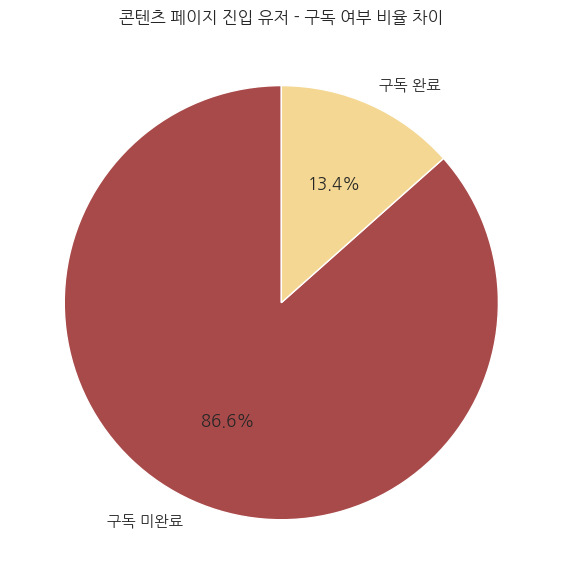

In [ ]:
# 그래프 그리기
plt.pie(
    list(enter_df['ratio'].values),
    labels = ['구독 미완료', '구독 완료'], autopct='%1.1f%%', startangle=90,
    colors = ['#A94A4A', '#F4D793']
)

plt.title('콘텐츠 페이지 진입 유저 - 구독 여부 비율 차이')
sns.despine()

plt.tight_layout()
plt.show()

##### Z검정을 통한 통계적 유의미성 검증
- Z검정을 통해 콘텐츠 페이지 미진입 유저 그룹 vs 진입 유저 그룹에서 첫 유료 구독 완료 여부 비율의 차이가 통계적으로 유의미한지 검증

    - 귀무가설 ( $H_0$ ): 두 그룹의 첫 유료 구독 완료 비율은 동일하다.
    - 대립가설 ( $H_1$ ): 두 그룹의 첫 유료 구독 완료 비율은 다르다.

In [ ]:
# 입력 데이터
n1 = 93689+6438  # 콘텐츠 페이지 미진입 유저 그룹의 총 유저 수
x1 = 6438   # 미진입 그룹의 첫 유료 구독 완료 수
n2 = 38963+6043  # 콘텐츠 페이지 진입 유저 그룹의 총 유저 수
x2 = 6043   # 진입 그룹의 첫 유료 구독 완료 수

# Z검정 수행
counts = np.array([x1, x2])  # 성공 횟수
nobs = np.array([n1, n2])    # 샘플 크기
z_stat, p_value = proportions_ztest(counts, nobs, alternative='two-sided')

# 결과 출력
print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# 유의 수준과 비교
alpha = 0.05  # 유의 수준
if p_value < alpha:
    print("귀무가설을 기각합니다. 두 그룹의 비율 차이는 통계적으로 유의미합니다.")
else:
    print("귀무가설을 기각할 수 없습니다. 두 그룹의 비율 차이는 통계적으로 유의미하지 않습니다.")

Z-statistic: -43.9785
P-value: 0.0000
귀무가설을 기각합니다. 두 그룹의 비율 차이는 통계적으로 유의미합니다.


- 시각화

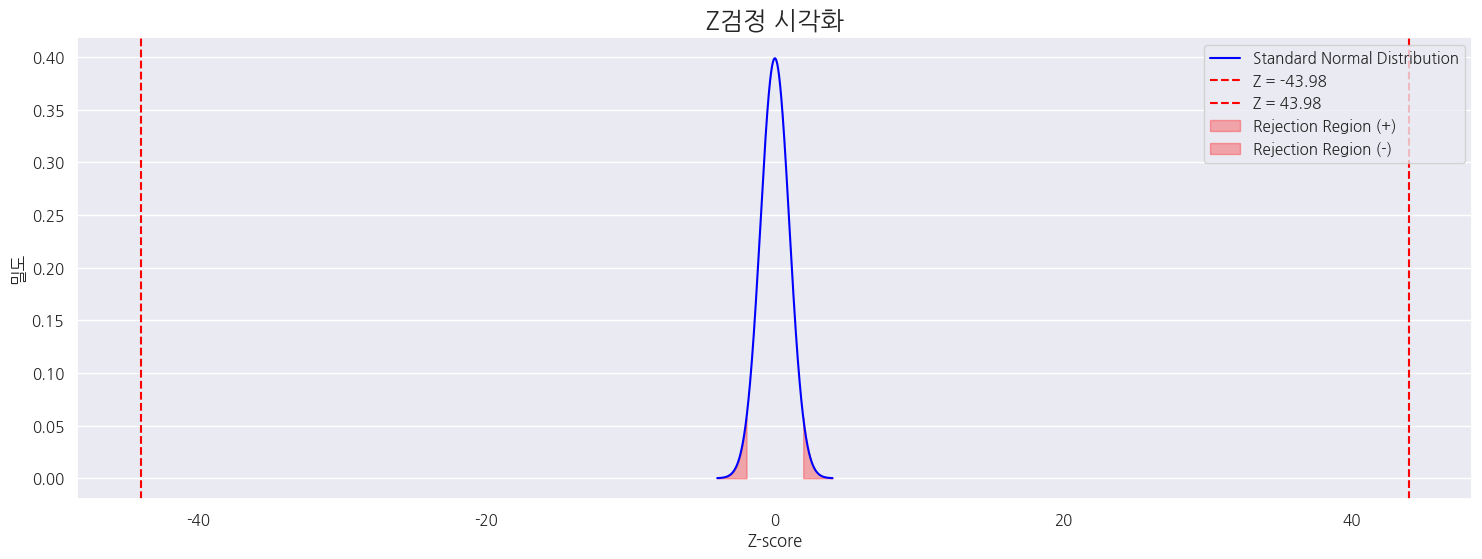

In [ ]:

# Z검정 결과 값
z_stat = -43.9785  # Z값
alpha = 0.05   # 유의수준 (one-tailed 기준, two-tailed일 경우 적절히 나누기)

# 정규분포 곡선 생성
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, 0, 1)  # 평균 0, 표준편차 1의 표준정규분포

# 유의수준의 Z값 계산 (양측 검정 기준)
z_critical = norm.ppf(1 - alpha / 2)

# 시각화
plt.figure(figsize=(18, 6))
plt.plot(x, y, label="Standard Normal Distribution", color="blue")
sns.set_theme(style='darkgrid', font='Nanum Gothic')

# Z값 표시
plt.axvline(z_stat, color="red", linestyle="--", label=f"Z = {z_stat:.2f}")
plt.axvline(-z_stat, color="red", linestyle="--", label=f"Z = {-z_stat:.2f}")

# 기각영역 음영 표시
plt.fill_between(x, 0, y, where=(x >= z_critical), color='red', alpha=0.3, label="Rejection Region (+)")
plt.fill_between(x, 0, y, where=(x <= -z_critical), color='red', alpha=0.3, label="Rejection Region (-)")

# 그래프 꾸미기
plt.title("Z검정 시각화", fontsize=18)
plt.xlabel("Z-score", fontsize=12)
plt.ylabel("밀도", fontsize=12)
plt.legend()
plt.grid(axis='x')

# 결과 표시
plt.show()

#### 결과 해석 및 인사이트

- 콘텐츠 페이지 진입 여부에 따른 첫 유료 구독 전환 비율 비교 결과 요약

    | 콘텐츠 페이지 진입 여부       | 첫 유료 구독 O (%) | 첫 유료 구독 X (%) |
    |--------------------------|---------------|---------------|
    | 콘텐츠 페이지 진입 O | 13.4%         | 86.6%         |
    | 콘텐츠 페이지 진입 X | 6.4%          | 93.6%         |
<br>

- 콘텐츠 페이지 진입 여부에 따른 첫 유료 구독 전환 비율 차이가 통계적으로 유의미한지 Z검정을 통해 추가 검증 완료 > 모두 통계적으로 유의미했다.

### 분석 2. 콘텐츠 페이지 진입 횟수에 따른 전체 유저 대비 구독 전환 유저가 차지하는 비율 변화

- 목적 : 콘텐츠 페이지 진입 횟수가 올라갈수록 상승하는 첫 유료 구독 전환율의 정도를 파악하고, 최적의 콘텐츠 페이지 진입 수를 유추해보기 위함

- 용어

    - 전체 유저 : 하나의 ‘콘텐츠 페이지 진입 횟수’ 만큼 콘텐츠 페이지에 방문한 전체 유저

    - 첫 유료 구독 전환 유저 : 위 전체 유저 중 첫 유료 구독 전환을 완료한 유저

    - 첫 유료 구독 미전환 유저 : 위 전체 유저 중 첫 유료 구독 전환을 완료하지 않은 유저

    - 전환율 : 전체 유저 대비 첫 유료 구독 전환 유저가 차지하는 비율


#### 분석 진행

- 전환율 집계
- reg_df(회귀분석에 사용한 데이터 테이블)를 기반으로 가공했으므로, 첫 유료 구독 완료 유저의 경우, 첫 유료 구독 이전의 이벤트만 포함됨

In [ ]:
# 임시 테이블 생성
tmp_df = reg_df[['complete_subscription','enter_content_page']]
tmp_df.head(3)

,complete_subscription,enter_content_page
0,0,0
1,0,0
2,0,22


In [ ]:
# 첫 유료 구독 O 유저의 첫 구독 전 콘텐츠 진입 수
tmp1 = tmp_df[tmp_df['complete_subscription']==1].groupby('enter_content_page').count().reset_index()
tmp1

,enter_content_page,complete_subscription
0,0,6438
1,1,1344
2,2,837
3,3,655
4,4,498
...,...,...
111,207,1
112,278,1
113,284,1
114,307,1


In [ ]:
# 첫 유료 구독 X 유저의 첫 구독 전 콘텐츠 진입 수
tmp2 = tmp_df[tmp_df['complete_subscription']==0].groupby('enter_content_page').count().reset_index()
tmp2

,enter_content_page,complete_subscription
0,0,93689
1,1,14944
2,2,7952
3,3,4131
4,4,2646
...,...,...
265,754,1
266,759,1
267,771,1
268,895,1


In [ ]:
# 전체 유저의 첫 구독 전 콘텐츠 진입 수
tmp3 = tmp_df.groupby('enter_content_page').count().reset_index()
tmp3

,enter_content_page,complete_subscription
0,0,100127
1,1,16288
2,2,8789
3,3,4786
4,4,3144
...,...,...
270,759,1
271,771,1
272,895,1
273,975,1


- 위 세 테이블을 콘텐츠 페이지 확인으로 merge하여 후 전환율 산출

In [ ]:
# merge
merge_df = pd.merge(tmp1, tmp2, how='inner', on='enter_content_page')
merge_df = pd.merge(merge_df, tmp3, how='inner', on='enter_content_page')

# 컬럼명 변경
merge_df = merge_df.rename(columns={'complete_subscription_x':'구독O', 'complete_subscription_y':'구독X', 'complete_subscription':'전체'})

# 테이블 확인
merge_df

,enter_content_page,구독O,구독X,전체
0,0,6438,93689,100127
1,1,1344,14944,16288
2,2,837,7952,8789
3,3,655,4131,4786
4,4,498,2646,3144
...,...,...,...,...
106,147,3,2,5
107,160,1,1,2
108,174,1,1,2
109,284,1,1,2


In [ ]:
# 전환율 산출
merge_df['cvr'] = round(((merge_df['구독O'] / merge_df['전체'])*100),2)
merge_df

,enter_content_page,구독O,구독X,전체,cvr
0,0,6438,93689,100127,6.43
1,1,1344,14944,16288,8.25
2,2,837,7952,8789,9.52
3,3,655,4131,4786,13.69
4,4,498,2646,3144,15.84
...,...,...,...,...,...
106,147,3,2,5,60.00
107,160,1,1,2,50.00
108,174,1,1,2,50.00
109,284,1,1,2,50.00


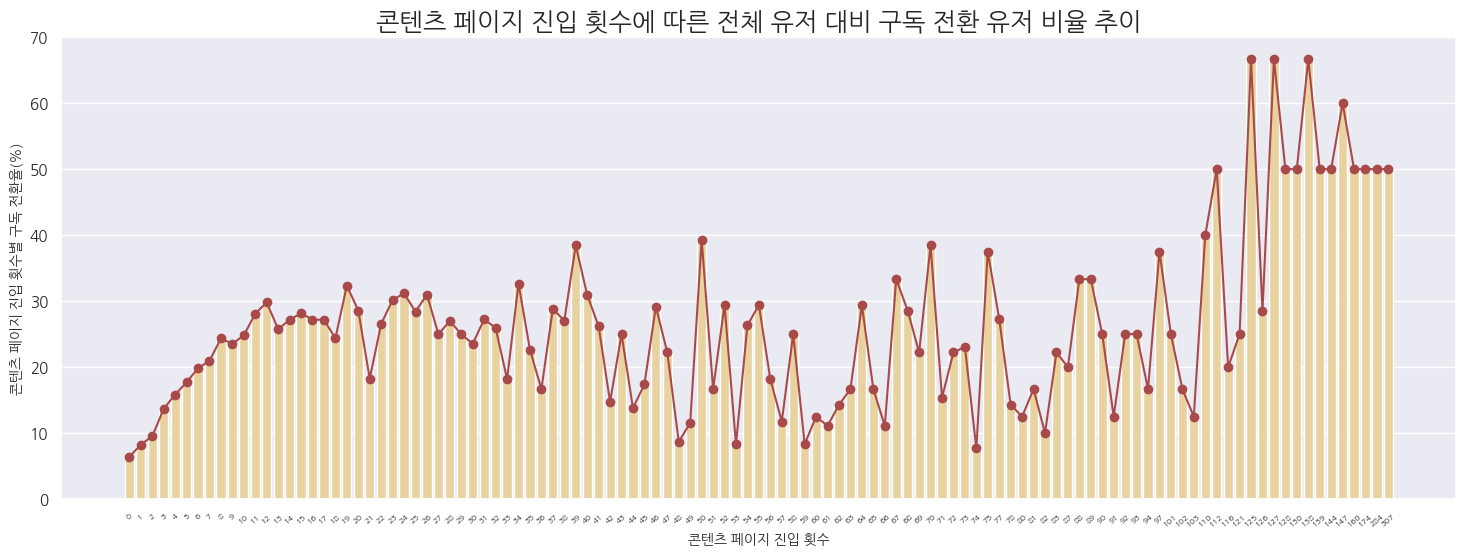

In [ ]:
# 콘텐츠 페이지 진입 횟수에 따른 전체 유저 대비 첫 유료 구독 전환 유저 비율 추이
fig, ax = plt.subplots(figsize=(18,6))

# 막대 그래프 그리기
bars = sns.barplot(data=merge_df, x='enter_content_page', y='cvr', color='#F4D793', ax=ax)

# 선 그래프를 위한 평균값 계산
line = ax.plot(merge_df['cvr'], marker='o', color='#A94A4A')
plt.grid(axis='x')

# 타이틀 축 라벨 작성 및 설정
plt.title('콘텐츠 페이지 진입 횟수에 따른 전체 유저 대비 구독 전환 유저 비율 추이', fontsize=18)
plt.xlabel('콘텐츠 페이지 진입 횟수', fontsize=10)
plt.ylabel('콘텐츠 페이지 진입 횟수별 구독 전환율(%)', fontsize=10)
plt.xticks(fontsize=6, rotation=40)

plt.grid(axis='x')

#plt.tight_layout()
plt.show()

- 표본크기가 직어질수록 오차가 커지기 때문에, 위 그래프에서 적정 콘텐츠 페이지 진입 수를 산정하여 다시 그래프를 그려본다.

In [ ]:
# 데이터 필터 기준을 잡기 위해 데이터 30행까지 확인
merge_df.head(30)

,enter_content_page,구독O,구독X,전체,cvr
0,0,6438,93689,100127,6.43
1,1,1344,14944,16288,8.25
2,2,837,7952,8789,9.52
3,3,655,4131,4786,13.69
4,4,498,2646,3144,15.84
5,5,367,1705,2072,17.71
6,6,299,1208,1507,19.84
7,7,238,898,1136,20.95
8,8,225,699,924,24.35
9,9,167,543,710,23.52


- 전체 유저 수가 200 이상인 데이터로 필터링

In [ ]:
# 전체 유저 수 200이상으로 데이터 필터링
line_merge_df = merge_df[merge_df['전체'] >= 200]

line_merge_df

,enter_content_page,구독O,구독X,전체,cvr
0,0,6438,93689,100127,6.43
1,1,1344,14944,16288,8.25
2,2,837,7952,8789,9.52
3,3,655,4131,4786,13.69
4,4,498,2646,3144,15.84
5,5,367,1705,2072,17.71
6,6,299,1208,1507,19.84
7,7,238,898,1136,20.95
8,8,225,699,924,24.35
9,9,167,543,710,23.52


- 필터링 기준이 된 데이터에서, 두 집단간 비율 차이가 통계적으로 유의미한지 z검정을 통해 검증

In [ ]:
# 데이터 입력
n1, x1 = 201, 49  # 첫 번째 집단 (표본 크기, 성공 횟수)
n2, x2 = 201, 152  # 두 번째 집단 (표본 크기, 성공 횟수)

# z-검정 수행
count = np.array([x1, x2])  # 성공 횟수
nobs = np.array([n1, n2])   # 표본 크기

z_stat, p_value = proportions_ztest(count, nobs)

# 결과 출력
print(f"z-statistic: {z_stat:.3f}")
print(f"p-value: {p_value:.3f}")

# 결과 해석
alpha = 0.05
if p_value < alpha:
    print("귀무가설을 기각합니다: 두 집단 간 비율 차이는 통계적으로 유의미합니다.")
else:
    print("귀무가설을 채택합니다: 두 집단 간 비율 차이는 통계적으로 유의미하지 않습니다.")

z-statistic: -10.274
p-value: 0.000
귀무가설을 기각합니다: 두 집단 간 비율 차이는 통계적으로 유의미합니다.


- 시각화

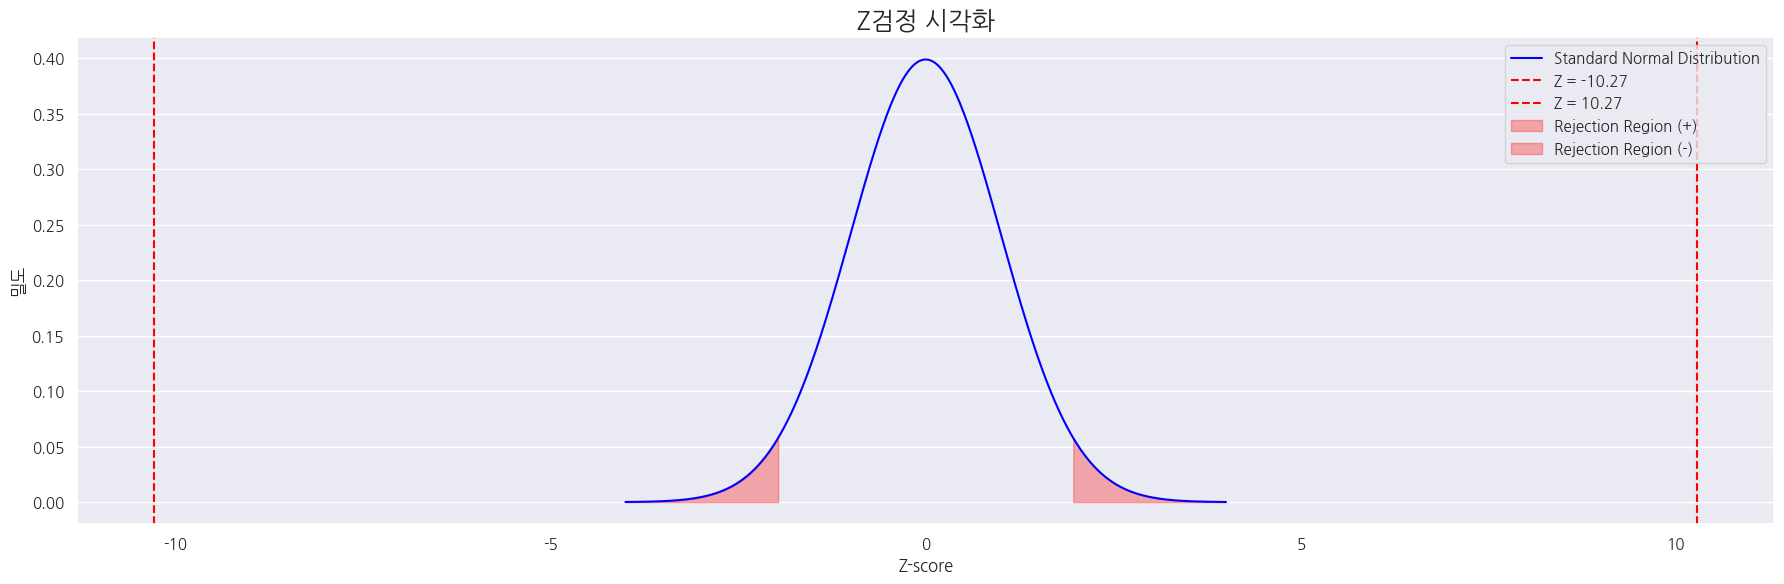

In [ ]:

# Z검정 결과 값
z_stat = -10.274  # Z값
alpha = 0.05   # 유의수준 (one-tailed 기준, two-tailed일 경우 적절히 나누기)

# 정규분포 곡선 생성
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, 0, 1)  # 평균 0, 표준편차 1의 표준정규분포

# 유의수준의 Z값 계산 (양측 검정 기준)
z_critical = norm.ppf(1 - alpha / 2)

# 시각화
plt.figure(figsize=(18, 6))
plt.plot(x, y, label="Standard Normal Distribution", color="blue")

# Z값 표시
plt.axvline(z_stat, color="red", linestyle="--", label=f"Z = {z_stat:.2f}")
plt.axvline(-z_stat, color="red", linestyle="--", label=f"Z = {-z_stat:.2f}")

# 기각영역 음영 표시
plt.fill_between(x, 0, y, where=(x >= z_critical), color='red', alpha=0.3, label="Rejection Region (+)")
plt.fill_between(x, 0, y, where=(x <= -z_critical), color='red', alpha=0.3, label="Rejection Region (-)")

# 그래프 꾸미기
plt.title("Z검정 시각화", fontsize=18)
plt.xlabel("Z-score", fontsize=12)
plt.ylabel("밀도", fontsize=12)
plt.legend()
plt.grid(axis='x')

# 결과 표시
plt.tight_layout()
plt.show()

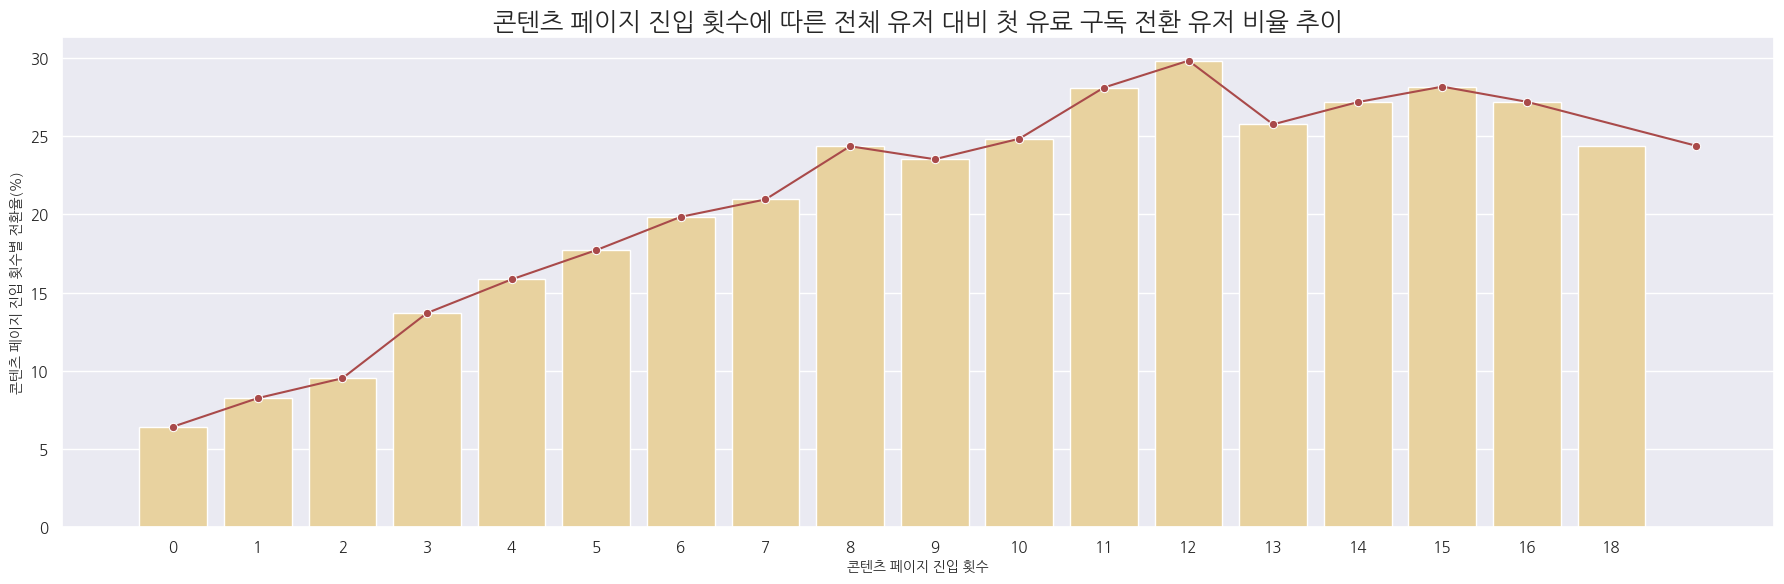

In [ ]:
# 필터링한 데이터로 - 콘텐츠 페이지 진입 수에 따른 전체 유저 대비 첫 구독 전환 유저 비율 추이
# 스타일 설정
sns.set_theme(style='darkgrid',rc={'figure.figsize':(18,6)},font='Nanum Gothic')

# 막대그래프 그리기
sns.barplot(data=line_merge_df, x='enter_content_page', y='cvr', color='#F4D793')
plt.grid(axis='x')

# 꺾은선 그래프 그리기
sns.lineplot(data=line_merge_df, x='enter_content_page', y='cvr', marker='o', color='#A94A4A')
plt.grid(axis='x')

# X축 정수로 표기
# plt.xticks(ticks=line_merge_df['enter_content_page'].astype(int))

# 타이틀, X축, Y축 타이틀 설정
plt.title('콘텐츠 페이지 진입 횟수에 따른 전체 유저 대비 첫 유료 구독 전환 유저 비율 추이', fontsize=18)
plt.xlabel('콘텐츠 페이지 진입 횟수', fontsize=10)
plt.ylabel('콘텐츠 페이지 진입 횟수별 전환율(%)', fontsize=10)

# 그래프 그리기
plt.tight_layout()
plt.show()

#### 결론

- 콘텐츠 페이지 진입 회ㅛ수의 증가가 첫 유료 구독 전환 확률에 긍정적인 영향을 끼친다는 회귀 분석의 결과를 지지

- 콘텐츠 페이지 진입 횟수 `12`를 기준으로 점층적으로 하향하기 시작

- 콘텐츠 페이지 진입 12회를 상한선으로, 최대한 확인할 수 있도록 유도한다.
    - UX/UI : 첫 유료 구독을 하지 않은 유저의 경우 메인 페이지에 기존 유저가 가장 많이 조회한(=인기 있는) 콘텐츠 12개를 노출한다.
    - CRM : 회원가입을 했는데 첫 유료 구독을 하지 않은 유저이므로, 회원가입 정보(이메일, 휴대전화)를 통해 기존 유저가 가장 많이 조회한(=인기 있는) 콘텐츠 12개를 추천한다.

### 분석 3. 전체 회원가입 유저와 구독 전환 유저들이 진입한 콘텐츠 TOP10 비교 분석

- 목적 : 전체 회원가입 유저가 진입한 콘텐츠 TOP10과 비교했을 때 첫 유료 구독 전환 유저들이 진입한 콘텐츠 TOP10에서 차이가 있는지 확인하여 첫 유료 구독 전환에 특별하게 긍정적인 영향을 준 콘텐츠가 있는지 파악하기 위함

#### 분석 진행
- 이전 분석과 다르게 분석을 위해 reg_df(회귀분석에 사용한 데이터 테이블)를 기반으로 가공하지 않고 enter_content_page_df(콘텐츠 페이지 진입 이벤트 테이블)을 기반으로 가공하여 분석을 진행하므로 첫 유료 구독 완료 유저의 경우, 첫 유료 구독 이전의 이벤트만 포함시키도록 전처리 필요

In [ ]:
# 콘텐츠 페이지 진입 이벤트 테이블에서 첫 유료 구독 전환 시점 이전 데이터만 남기기
merge_df = pd.merge(enter_content_page_df, complete_subscription_df[['user_id','client_event_time']], how='left', on='user_id')
merge_df.head(3)

,city,client_event_time_x,date_year_month,country,device_family,device_type,pc_mo,event_type,language,os_name,os_version,platform,user_id,content.id,event_count,client_event_time_y
0,Seoul,2023-04-05 21:40:35.740,2023-04,South Korea,Apple iPhone,Apple iPhone,MO,enter.content_page,Korean,Chrome,108.0.5359.112,Web,d57aba7b4527e71b96135deaaec57def,220ce7873b8895d0c81c37600b5bd1e7,1,2022-02-16 01:40:53.622
1,Hwaseong-si,2023-04-05 21:01:59.950,2023-04,South Korea,Samsung Galaxy Note,Samsung Galaxy Note10+ 5G,MO,enter.content_page,Korean,Chrome,111.0.0.0,Web,guest,ecde9a1b01763f791c3a185d53b5f394,1,NaN
2,Daejeon,2023-04-05 21:13:12.038,2023-04,South Korea,Windows,Windows,PC,enter.content_page,Korean,Edge,111.0.1661.62,Web,41362ad5ebcade2bb1b78344a53e7ccf,b8d4ec0133e5ce485055bfd69cd28abd,1,2022-06-23 08:07:25.279


In [ ]:
merge_df.shape

(1914107, 16)

In [ ]:
# 첫 유료 구독 완료 유저의 경우, 데이터 중 첫 유료 구독 완료 이전 시점 데이터만 남기기
condition = ((merge_df['client_event_time_y'].isna()) | (merge_df['client_event_time_x'] < merge_df['client_event_time_y']))
filtered_df = merge_df[condition]
filtered_df.head(5)

,city,client_event_time_x,date_year_month,country,device_family,device_type,pc_mo,event_type,language,os_name,os_version,platform,user_id,content.id,event_count,client_event_time_y
1,Hwaseong-si,2023-04-05 21:01:59.950,2023-04,South Korea,Samsung Galaxy Note,Samsung Galaxy Note10+ 5G,MO,enter.content_page,Korean,Chrome,111.0.0.0,Web,guest,ecde9a1b01763f791c3a185d53b5f394,1,NaN
4,Seoul,2023-04-05 21:44:23.759,2023-04,South Korea,Samsung Phone,Samsung Galaxy S20 FE 5G,MO,enter.content_page,Korean,Samsung Browser,14.2,Web,guest,7cebec6e79cc981dbf421c5ec2aedd9d,1,NaN
9,Sejong,2023-04-05 21:35:54.025,2023-04,South Korea,Apple iPhone,Apple iPhone 12 Mini,MO,enter.content_page,Korean,Instagram,276.1.0.14.103,Web,guest,61b6463287573f00de13a930805a52d6,1,NaN
10,Cheongju-si,2023-04-05 21:21:42.683,2023-04,South Korea,Windows,Windows,PC,enter.content_page,English,Chrome,111.0.0.0,Web,c49c61a858f8e2bc3f14c878d9ca100c,7fef928cdccef0185dfb931ef59b37d7,1,NaN
11,Seoul,2023-04-05 21:10:56.159,2023-04,South Korea,Samsung Phone,Samsung Galaxy S22,MO,enter.content_page,Korean,Chrome,110.0.0.0,Web,a861512f4cdca0cec8d58546b9c27b0b,f4be1a0fe0e301b03115591777fddf29,1,2023-04-11 12:45:01.917


In [ ]:
# 회원가입한 유저만 선별
filtered_df = filtered_df[filtered_df['user_id']!='guest']

filtered_df.head(3)

,city,client_event_time_x,date_year_month,country,device_family,device_type,pc_mo,event_type,language,os_name,os_version,platform,user_id,content.id,event_count,client_event_time_y
10,Cheongju-si,2023-04-05 21:21:42.683,2023-04,South Korea,Windows,Windows,PC,enter.content_page,English,Chrome,111.0.0.0,Web,c49c61a858f8e2bc3f14c878d9ca100c,7fef928cdccef0185dfb931ef59b37d7,1,NaN
11,Seoul,2023-04-05 21:10:56.159,2023-04,South Korea,Samsung Phone,Samsung Galaxy S22,MO,enter.content_page,Korean,Chrome,110.0.0.0,Web,a861512f4cdca0cec8d58546b9c27b0b,f4be1a0fe0e301b03115591777fddf29,1,2023-04-11 12:45:01.917
12,Seoul,2023-04-05 21:15:07.232,2023-04,South Korea,Samsung Phone,Samsung Galaxy S22,MO,enter.content_page,Korean,Chrome,110.0.0.0,Web,a861512f4cdca0cec8d58546b9c27b0b,f4be1a0fe0e301b03115591777fddf29,1,2023-04-11 12:45:01.917


In [ ]:
# guest 삭제 확인
filtered_df[filtered_df['user_id']=='guest']

,city,client_event_time_x,date_year_month,country,device_family,device_type,pc_mo,event_type,language,os_name,os_version,platform,user_id,content.id,event_count,client_event_time_y


In [ ]:
# 회원가입 유저만 남긴 후 데이터 크기 확인
filtered_df.shape

(922290, 16)

In [ ]:
# 회원가입 유저들이 가장 많이 확인한 콘텐츠 TOP10
filtered_df['content.id'].value_counts().sort_values(ascending=False).head(10)

content.id
f4be1a0fe0e301b03115591777fddf29    83404
595cb4bbfc83e683b0314ca1312cfbde    58990
f491517f4737a60d661cd1fcacc702c0    54195
61b6463287573f00de13a930805a52d6    36996
c269eb6df3a374b464f7c18f12fa398f    34066
b314d5aba64a0aab40602cb72a4a1504    31350
68a3658f1b936bfff3bd6960cd561b0a    26454
d6227ba76134f6cf821bb98b5f235bd0    23322
db1819d3a7a4c4d85dccb3b9e982fbcd    20415
4641438a6c81ef572d997dbdc9100f8b    19293
Name: count, dtype: int64

- 회원가입 유저들이 첫 구독 이전에 `마지막으로` 가장 많이 확인한 콘텐츠는?

In [ ]:
sort_df = filtered_df.sort_values(by='client_event_time_x', ascending=True)
sort_df.head()

,city,client_event_time_x,date_year_month,country,device_family,device_type,pc_mo,event_type,language,os_name,os_version,platform,user_id,content.id,event_count,client_event_time_y
1422896,Jeonju,2022-01-01 00:04:26.749,2022-01,South Korea,Android,Android,MO,enter.content_page,Korean,Chrome,96,Web,86cd970e25ecd9969bd1c7fcca907c72,c269eb6df3a374b464f7c18f12fa398f,1,NaN
1422900,Nam-gu,2022-01-01 00:11:10.050,2022-01,South Korea,Windows,Windows,PC,enter.content_page,Korean,Edge,96,Web,c6991cc646bce25351e3a64ea00ccb1f,512a6f0abaef16c51950d52ce2d66fda,1,NaN
1422901,Nam-gu,2022-01-01 00:12:18.696,2022-01,South Korea,Windows,Windows,PC,enter.content_page,Korean,Edge,96,Web,c6991cc646bce25351e3a64ea00ccb1f,f351e92bba7aadae94d04c85c3fb1834,1,NaN
1422897,Jeonju,2022-01-01 00:12:39.375,2022-01,South Korea,Android,Android,MO,enter.content_page,Korean,Chrome,96,Web,86cd970e25ecd9969bd1c7fcca907c72,c269eb6df3a374b464f7c18f12fa398f,1,NaN
1422902,Nam-gu,2022-01-01 00:13:04.750,2022-01,South Korea,Windows,Windows,PC,enter.content_page,Korean,Edge,96,Web,c6991cc646bce25351e3a64ea00ccb1f,638a60d5aedf29cbf779e6dfbcad216e,1,NaN


In [ ]:
# user_id 기준으로 마지막 행만 남기고 중복 제거
sort_remove_df = sort_df.drop_duplicates(subset='user_id', keep='last')
sort_remove_df.head()

,city,client_event_time_x,date_year_month,country,device_family,device_type,pc_mo,event_type,language,os_name,os_version,platform,user_id,content.id,event_count,client_event_time_y
1422935,Gumi,2022-01-01 00:25:32.613,2022-01,South Korea,Windows,Windows,PC,enter.content_page,Korean,Chrome,96,Web,e98481d6081c560ad6c9c01c4596129e,f4be1a0fe0e301b03115591777fddf29,1,NaN
1171930,Gunpo,2022-01-01 01:16:32.169,2022-01,South Korea,Windows,Windows,PC,enter.content_page,Korean,Chrome,96,Web,5fda6a3485508d4141c7367e3bd0234f,101e1d0dcc38d9c86156f008a145083e,1,NaN
1171894,Daegu,2022-01-01 01:21:26.078,2022-01,South Korea,Windows,Windows,PC,enter.content_page,Chinese,Edge,93,Web,341603fa8e7810d55b9b55c6a603f9b2,479926b04fe824bce5bdc7e0f81a2539,1,NaN
974162,Guro-gu,2022-01-01 02:19:00.811,2022-01,South Korea,Apple iPhone,Apple iPhone,MO,enter.content_page,Korean,WebKit,605,Web,2b18637d168277f9e981ffbe1e3e98f4,c8affa8409b8bd58d00d3477dd2b8ba5,1,NaN
974201,Gyeongsan-si,2022-01-01 02:27:17.985,2022-01,South Korea,Android,Android,MO,enter.content_page,Korean,Samsung Browser,16,Web,a9e3ecf0c8095b67eddf9be44f5c7692,7cebec6e79cc981dbf421c5ec2aedd9d,1,NaN


- 중복 제거 확인

In [ ]:
# 특정 유저의 중복 제거 전 최신 5개 이벤트 확인
sort_df[sort_df['user_id']=='86cd970e25ecd9969bd1c7fcca907c72'].tail(5)

,city,client_event_time_x,date_year_month,country,device_family,device_type,pc_mo,event_type,language,os_name,os_version,platform,user_id,content.id,event_count,client_event_time_y
173152,Jeonju,2023-05-14 03:28:44.967,2023-05,South Korea,Samsung Galaxy Note,Samsung Galaxy Note10+ 5G,MO,enter.content_page,Korean,Whale,1.0.0.0,Web,86cd970e25ecd9969bd1c7fcca907c72,ca35d0138a7550f002f975310604a9b7,1,NaN
173153,Jeonju,2023-05-14 03:29:39.900,2023-05,South Korea,Samsung Galaxy Note,Samsung Galaxy Note10+ 5G,MO,enter.content_page,Korean,Whale,1.0.0.0,Web,86cd970e25ecd9969bd1c7fcca907c72,ca35d0138a7550f002f975310604a9b7,1,NaN
173154,Jeonju,2023-05-14 03:30:51.387,2023-05,South Korea,Samsung Galaxy Note,Samsung Galaxy Note10+ 5G,MO,enter.content_page,Korean,Whale,1.0.0.0,Web,86cd970e25ecd9969bd1c7fcca907c72,ca35d0138a7550f002f975310604a9b7,1,NaN
173155,Jeonju,2023-05-14 03:30:54.520,2023-05,South Korea,Samsung Galaxy Note,Samsung Galaxy Note10+ 5G,MO,enter.content_page,Korean,Whale,1.0.0.0,Web,86cd970e25ecd9969bd1c7fcca907c72,ca35d0138a7550f002f975310604a9b7,1,NaN
134366,Jeonju,2023-05-18 08:54:38.010,2023-05,South Korea,Windows,Windows,PC,enter.content_page,Korean,Chrome,113.0.0.0,Web,86cd970e25ecd9969bd1c7fcca907c72,1ccd38c0253604fb48f78970736f915c,1,NaN


In [ ]:
# 특정 유저의 중복 제거 후 이벤트 확인
sort_remove_df[sort_remove_df['user_id']=='86cd970e25ecd9969bd1c7fcca907c72']

,city,client_event_time_x,date_year_month,country,device_family,device_type,pc_mo,event_type,language,os_name,os_version,platform,user_id,content.id,event_count,client_event_time_y
134366,Jeonju,2023-05-18 08:54:38.010,2023-05,South Korea,Windows,Windows,PC,enter.content_page,Korean,Chrome,113.0.0.0,Web,86cd970e25ecd9969bd1c7fcca907c72,1ccd38c0253604fb48f78970736f915c,1,NaN


- 첫 구독 완료한 사람만 남기기

In [ ]:
result_df = sort_remove_df[sort_remove_df['client_event_time_y'].notna()]
result_df.head(3)

,city,client_event_time_x,date_year_month,country,device_family,device_type,pc_mo,event_type,language,os_name,os_version,platform,user_id,content.id,event_count,client_event_time_y
951986,Chilgok-gun,2022-01-01 10:16:21.065,2022-01,South Korea,Windows,Windows,PC,enter.content_page,Korean,Edge,96,Web,50d0dd8cc013bda776654d037afde6c2,f4be1a0fe0e301b03115591777fddf29,1,2022-02-24 09:18:54.709
1100122,Suwon,2022-01-02 06:43:59.465,2022-01,South Korea,Windows,Windows,PC,enter.content_page,Korean,Edge,96,Web,81450e098c14608d247a45fa7ab3995f,f4be1a0fe0e301b03115591777fddf29,1,2022-11-23 04:44:43.766
1350448,Seongnam-si,2022-01-02 07:31:38.423,2022-01,South Korea,Windows,Windows,PC,enter.content_page,Korean,Chrome,96,Web,fe7f0984230b6dcc4f06eed49a1d8e71,c8affa8409b8bd58d00d3477dd2b8ba5,1,2022-02-06 06:33:35.645


In [ ]:
# 첫 구독 전환 유저들이 첫 구독 이전에 `마지막으로` 가장 많이 확인한 콘텐츠 TOP10
result_df['content.id'].value_counts().sort_values(ascending=False).head(10)

content.id
f4be1a0fe0e301b03115591777fddf29    1199
61b6463287573f00de13a930805a52d6     796
f491517f4737a60d661cd1fcacc702c0     559
c269eb6df3a374b464f7c18f12fa398f     371
68a3658f1b936bfff3bd6960cd561b0a     326
445fac33232adcb3d1cdab7d8a579430     245
db1819d3a7a4c4d85dccb3b9e982fbcd     198
595cb4bbfc83e683b0314ca1312cfbde     174
d6227ba76134f6cf821bb98b5f235bd0     155
b314d5aba64a0aab40602cb72a4a1504     155
Name: count, dtype: int64

#### 결과

- 회원가입 유저들이 가장 많이 확인한 콘텐츠 TOP10과 첫 구독 전환 유저들이 첫 구독 이전에 `마지막으로` 가장 많이 확인한 콘텐츠 TOP10을 비교했을 때 겹치는 콘텐츠

    - f4be1a0fe0e301b03115591777fddf29
    - 61b6463287573f00de13a930805a52d6
    - f491517f4737a60d661cd1fcacc702c0
    - c269eb6df3a374b464f7c18f12fa398f
    - 68a3658f1b936bfff3bd6960cd561b0a
    - db1819d3a7a4c4d85dccb3b9e982fbcd
    - 595cb4bbfc83e683b0314ca1312cfbde
    - d6227ba76134f6cf821bb98b5f235bd0
    - b314d5aba64a0aab40602cb72a4a1504

- 10개 중 9개가 겹치며, 유일하게 첫 구독 전환 첫 구독 이전에 많이 확인한 콘텐츠 중 `445fac33232adcb3d1cdab7d8a579430` 콘텐츠만 회원가입 유저들이 가장 많이 확인한 콘텐츠 TOP10과 다르다.

#### 결과기반 추가 분석 - 로지스틱 회귀분석 / 카이제곱 검정 / 비율 확인
- `445fac33232adcb3d1cdab7d8a579430` 콘텐츠를 확인한 유저와 확인하지 않은 유저간 첫 구독 전환에 유의미한 차이가 있는가

- 해당 콘텐츠가 진짜 첫 구독 전환에 긍정적인 영향을 줬을까?

##### 단일 로지스틱 회귀분석

- 회귀분석 위한 테이블 생성

In [ ]:
# 445fac33232adcb3d1cdab7d8a579430 콘텐츠 확인한 사람 user_id
content_check_df = filtered_df[filtered_df['content.id']=='445fac33232adcb3d1cdab7d8a579430'][['user_id']].reset_index(drop=True)

# 콘텐츠 확인 여부 1로 표기
content_check_df['content_check'] = 1

content_check_df

,user_id,content_check
0,d0abb4cb6a5969d0a6ca8fcb8ad81ccd,1
1,d0abb4cb6a5969d0a6ca8fcb8ad81ccd,1
2,d0abb4cb6a5969d0a6ca8fcb8ad81ccd,1
3,d0abb4cb6a5969d0a6ca8fcb8ad81ccd,1
4,d0abb4cb6a5969d0a6ca8fcb8ad81ccd,1
...,...,...
11893,74ae79e4bba4872b1878c3c4143c9bff,1
11894,cb2cf20eea3eaa1f5347e9f1957132d3,1
11895,bcc532e882baa6d9d36f2a7a95abb555,1
11896,df13b12291c6f7e2a57c00af61923ed2,1


In [ ]:
# 회원가입한 전체 유저별 첫 구독 전환 여부 표기된 테이블 생성
all_df = reg_df[['user_id','complete_subscription']]
all_df

,user_id,complete_subscription
0,74d17c27a41656e7788b0c81d9f76cda,0
1,06b6868000a5d576180aca47896d6cce,0
2,e131c319972bd580146c5a2faba26613,0
3,e3b8bfa80d866f296aad139e09023ef3,0
4,5208a60918f18562ac9d668a35b20303,0
...,...,...
145128,0117038cc69fe8a40388ec19bb0a495e,0
145129,bc1a28ff902daba9399e7f602cc86285,0
145130,0d507104136f139cbc9f6fa1db365162,0
145131,298e200203472e5bc0f9a14053e1dfe1,0


In [ ]:
# 해당 콘텐츠 확인여부 표기하는 컬림 추가
merge_df = pd.merge(all_df, content_check_df, how='left', on='user_id')

# 콘텐츠 확인 여부 0, 1로 표기
merge_df['content_check'] = merge_df['content_check'].notnull().astype(int)

merge_df

,user_id,complete_subscription,content_check
0,74d17c27a41656e7788b0c81d9f76cda,0,0
1,06b6868000a5d576180aca47896d6cce,0,0
2,e131c319972bd580146c5a2faba26613,0,1
3,e131c319972bd580146c5a2faba26613,0,1
4,e131c319972bd580146c5a2faba26613,0,1
...,...,...,...
148932,0117038cc69fe8a40388ec19bb0a495e,0,0
148933,bc1a28ff902daba9399e7f602cc86285,0,0
148934,0d507104136f139cbc9f6fa1db365162,0,1
148935,298e200203472e5bc0f9a14053e1dfe1,0,0


- 단일 로지스틱 회귀분석 실행

In [ ]:
# 독립변수(X)와 종속변수(y) 분리
X = merge_df['content_check']
X = sm.add_constant(X)  # 상수항 추가 (회귀분석에서 intercept를 포함)
y = merge_df['complete_subscription']

# statsmodels 로지스틱 회귀모델 생성
model = sm.Logit(y, X)

# 모델 학습
result = model.fit()

# 결과 출력
summary = result.summary2()  # 더 깔끔한 결과 요약
print(summary)

Optimization terminated successfully.
         Current function value: 0.298892
         Iterations 6
                            Results: Logit
Model:              Logit                 Method:           MLE        
Dependent Variable: complete_subscription Pseudo R-squared: 0.011      
Date:               2025-01-16 11:46      AIC:              89036.1479 
No. Observations:   148937                BIC:              89055.9704 
Df Model:           1                     Log-Likelihood:   -44516.    
Df Residuals:       148935                LL-Null:          -44993.    
Converged:          1.0000                LLR p-value:      1.1724e-209
No. Iterations:     6.0000                Scale:            1.0000     
------------------------------------------------------------------------
                   Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
------------------------------------------------------------------------
const             -2.3881    0.0096  -249.8521  0.0000  -2.4

In [ ]:
# 회귀계수에서 오즈비 계산
odds_ratios = np.exp(result.params)

# 오즈비 출력
odds_ratios_df = pd.DataFrame({
    'Feature': X.columns,
    'Odds Ratio': odds_ratios
})

print(odds_ratios_df)

                     Feature  Odds Ratio
const                  const    0.091804
content_check  content_check    2.884642


오즈비 해석 : $P/(1-P) = 2.88$
- $P = 0.742 \rightarrow $ 74.2%

> ### 해당 콘텐츠를 확인하면 첫 구독 전환 확률이 약 24.2%p 증가한다.

##### 카이제곱 검정
- 회귀분석의 낮은 설명력 보완 위한 카이제곱 검정 실시

In [ ]:
# 교차표 생성
contingency_table = pd.crosstab(merge_df['content_check'], merge_df['complete_subscription'])
print("Contingency Table:")
print(contingency_table)

Contingency Table:
complete_subscription       0      1
content_check                       
0                      130180  11951
1                        5381   1425


In [ ]:
# 카이제곱 검정 실행
chi2, p, dof, expected = chi2_contingency(contingency_table)

# 결과 출력
print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"P-Value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

# 유의성 판단
if p < alpha:
    print("귀무가설을 기각합니다. 해당 콘텐츠 확인 여부와 구독 완료는 독립이 아닙니다.")
else:
    print("귀무가설을 채택합니다. 해당 콘텐츠 확인 여부와 구독 완료는 독립입니다.")

Chi-Square Statistic: 1245.7161
P-Value: 0.0000
Degrees of Freedom: 1
Expected Frequencies:
[[129366.24539906  12764.75460094]
 [  6194.75460094    611.24539906]]
귀무가설을 기각합니다. 해당 콘텐츠 확인 여부와 구독 완료는 독립이 아닙니다.


##### 비율 차이 시각화

In [ ]:
# 첫 구독 X / 첫 구독 O 콘텐츠 확인 여부 비율 확인
condition1 = (merge_df['complete_subscription'] == 0) # 첫구독 X
condition2 = (merge_df['complete_subscription'] == 1) # 첫구독 O

# 첫 구독 여부별 비율 확인 위한 데이터 프레임 생성
sub_x_df = merge_df[condition1].groupby('content_check').count()[['user_id']].reset_index()
sub_o_df = merge_df[condition2].groupby('content_check').count()[['user_id']].reset_index()

# 비율 컬럼 생성
sub_x_df['ratio'] = round(((sub_x_df['user_id'] / sub_x_df['user_id'].sum())*100),2)
sub_o_df['ratio'] = round(((sub_o_df['user_id'] / sub_o_df['user_id'].sum())*100),2)

# 콘텐츠 확인 컬럼값 매핑
sub_x_df['content_check'] = sub_x_df['content_check'].apply(lambda x : '콘텐츠 확인 O' if x == 1 else '콘텐츠 확인 X')
sub_o_df['content_check'] = sub_o_df['content_check'].apply(lambda x : '콘텐츠 확인 O' if x == 1 else '콘텐츠 확인 X')

In [ ]:
sub_o_df

,content_check,user_id,ratio
0,콘텐츠 확인 X,11951,89.35
1,콘텐츠 확인 O,1425,10.65


- 첫 구독 X 유저 중 해당 콘텐츠 확인 비율

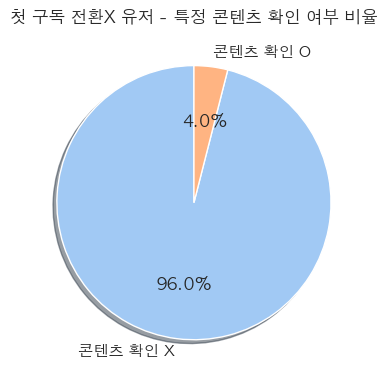

In [ ]:
# 그래프 그리기
colors = sns.color_palette("pastel")[:len(sub_x_df['content_check'].values)]

plt.pie(
    list(sub_x_df['ratio'].values),
    labels = sub_x_df['content_check'], autopct='%1.1f%%', startangle=90,
    colors = colors, shadow = True
)

plt.title('첫 구독 전환X 유저 - 특정 콘텐츠 확인 여부 비율')
sns.despine()

plt.tight_layout()
plt.show()

- 첫 구독 O 유저 중 해당 콘텐츠 확인 비율

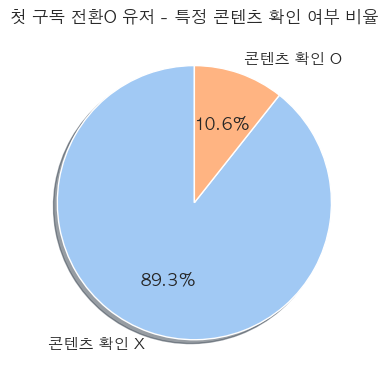

In [ ]:
# 그래프 그리기
colors = sns.color_palette("pastel")[:len(sub_o_df['content_check'].values)]

plt.pie(
    list(sub_o_df['ratio'].values),
    labels = sub_o_df['content_check'], autopct='%1.1f%%', startangle=90,
    colors = colors, shadow = True
)

plt.title('첫 구독 전환O 유저 - 특정 콘텐츠 확인 여부 비율')
sns.despine()

plt.tight_layout()
plt.show()

#### 추가 분석 결론

- 전체 회원가입 유저가 진입한 콘텐츠 TOP10과 첫 유료 구독 전환 유저들이 진입한 콘텐츠 TOP10을 비교했을 때 하나의 콘텐츠(**445fac33232adcb3d1cdab7d8a579430**)가 다르다.

- 해당 콘텐츠 확인 여부를 독립변수로, 첫 유료 구독 완료를 종속변수로 로지스틱 회귀분석을 진행했을 때, 해당 콘텐츠를 확인하면 첫 구독 전환 확률이 약 24.2% 증가한다는 인사이트가 도출되었다. 해당 결론은 카이제곱 검정을 통해 추가로 검증되었으며, 통계적으로 유의미하다.